In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [168]:
N = 2048*4
FOV = 10e-3
dx = FOV/N

E0 = 9000

beam_params = {
    'photonEnergy': E0+0.,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 159.9,
    'z0y': 159.9,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

In [210]:
b1 = beam.Beam(beam_params=beam_params)

alphaAsym = 7.7*np.pi/180
im0 = optics.PPM('im0', z=789.9, FOV=2e-3, N=256)

crystal1 = optics.Crystal('c1', hkl=[1,1,1], length=1e-2, width=20e-3, z=790, E0=E0,
                          alphaAsym=0, orientation=0,pol='p')

crystal2 = optics.Crystal('c2', hkl=[1,1,1], length=1e-2, width=20e-3, z=790.1, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='p')
print(crystal2.alpha*180/np.pi)
print(crystal2.beta0*180/np.pi)

f1 = .88
f2 = 1.1

m1 = optics.CurvedMirror('m1', z=790.2, p=10, q=0.3, alpha=3e-3, length=.1, orientation=0)
crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=2.45e-6*3.44, diameter=5e-3)


im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

focus = optics.PPM('focus', z=crl1.z+f2, FOV=40e-6, N=256)
slit = optics.Slit('slit', z=790.4999+f2, x_width=300e-9, y_width=2e-3)
m2 = optics.CurvedMirror('m2', z=790.8+f, p=0.3000, q=1e4, alpha=3e-3, length=.1, orientation=2)
crl2 = optics.CRL('crl2', z=focus.z+f2, roc=2.45e-6*3.44, diameter=5e-3)

crystal3 = optics.Crystal('c3', hkl=[1,1,1], length=.5e-2, width=10e-3, z=crl2.z+.15, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[1,1,1], length=.5e-2, width=10e-3, z=crl2.z+f1, E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='p')

im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [im0,crystal1,crystal2,im1, crl1, focus, crl2, crystal3, crystal4, im2]
# devices = [crystal1,crystal2,im1, m1, focus, m2,crystal3, crystal4, im2]
# devices = devices + crl_list

mono_beamline = beamline.Beamline(devices)

FWHM in x: 551.8831284282244 microns
FWHM in y: 551.8831284282244 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130953610821153
5.130953610821153
b 1.00
b 4.00
20.391319986069636
4.995667149144264
b 1.00
b 0.25
after c1: 0.44
after c2: -0.00
after c3: -0.44
after c4: -0.00


FWHM in x: 551.8831284282244 microns
FWHM in y: 551.8831284282244 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130953610821153
5.130953610821153
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.016672
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.01
zx: 10.896672
zy: 160.990686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103309
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003309
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003309
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003309
zy: 162.090686
azimuth -0.06 mrad
focus
Some 

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2899: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2900: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2907: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2913: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.

<IPython.core.display.Javascript object>


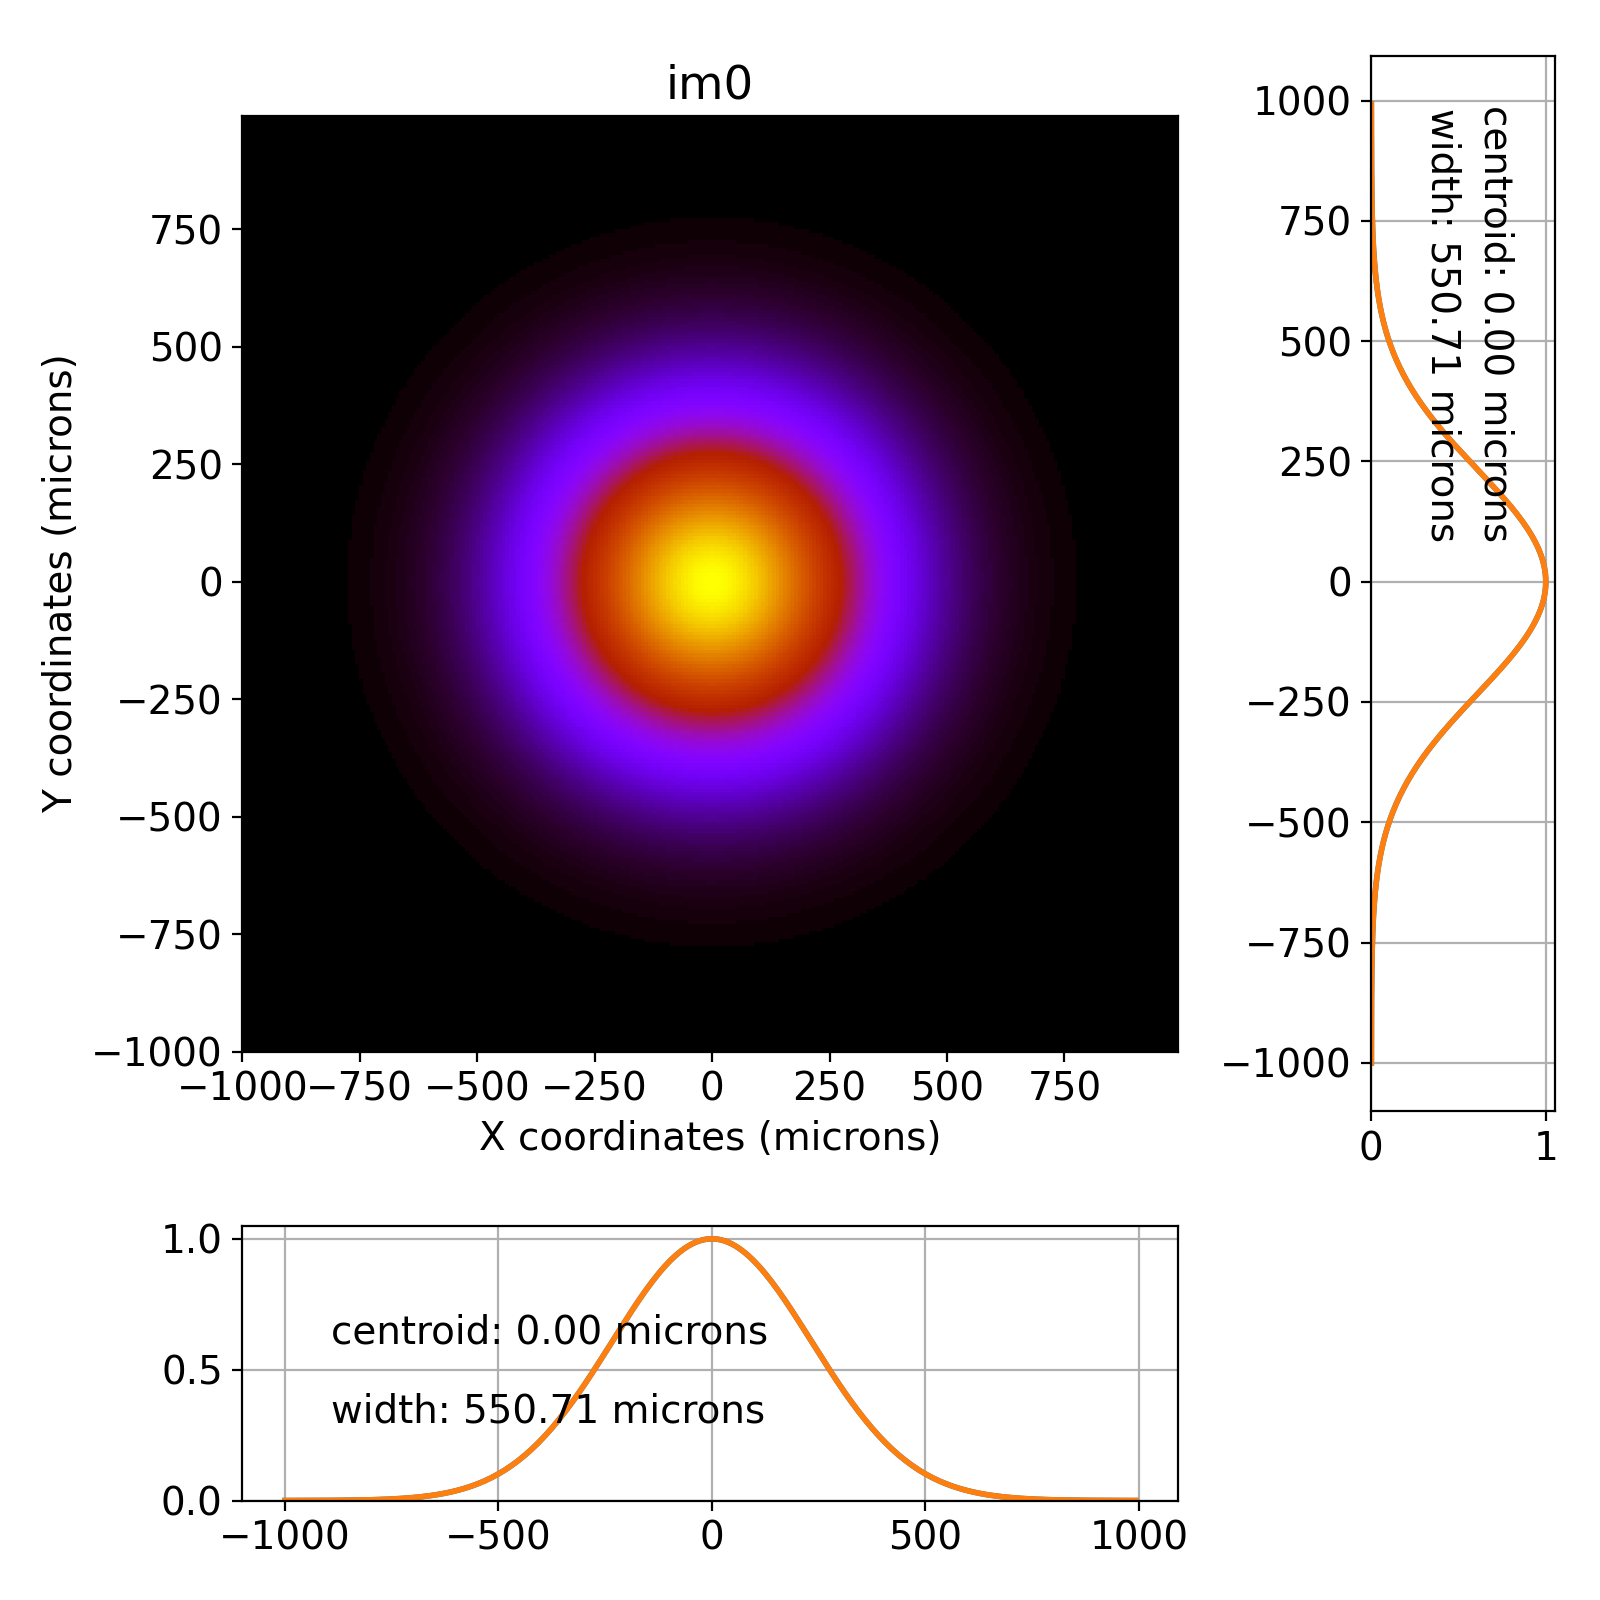

<IPython.core.display.Javascript object>


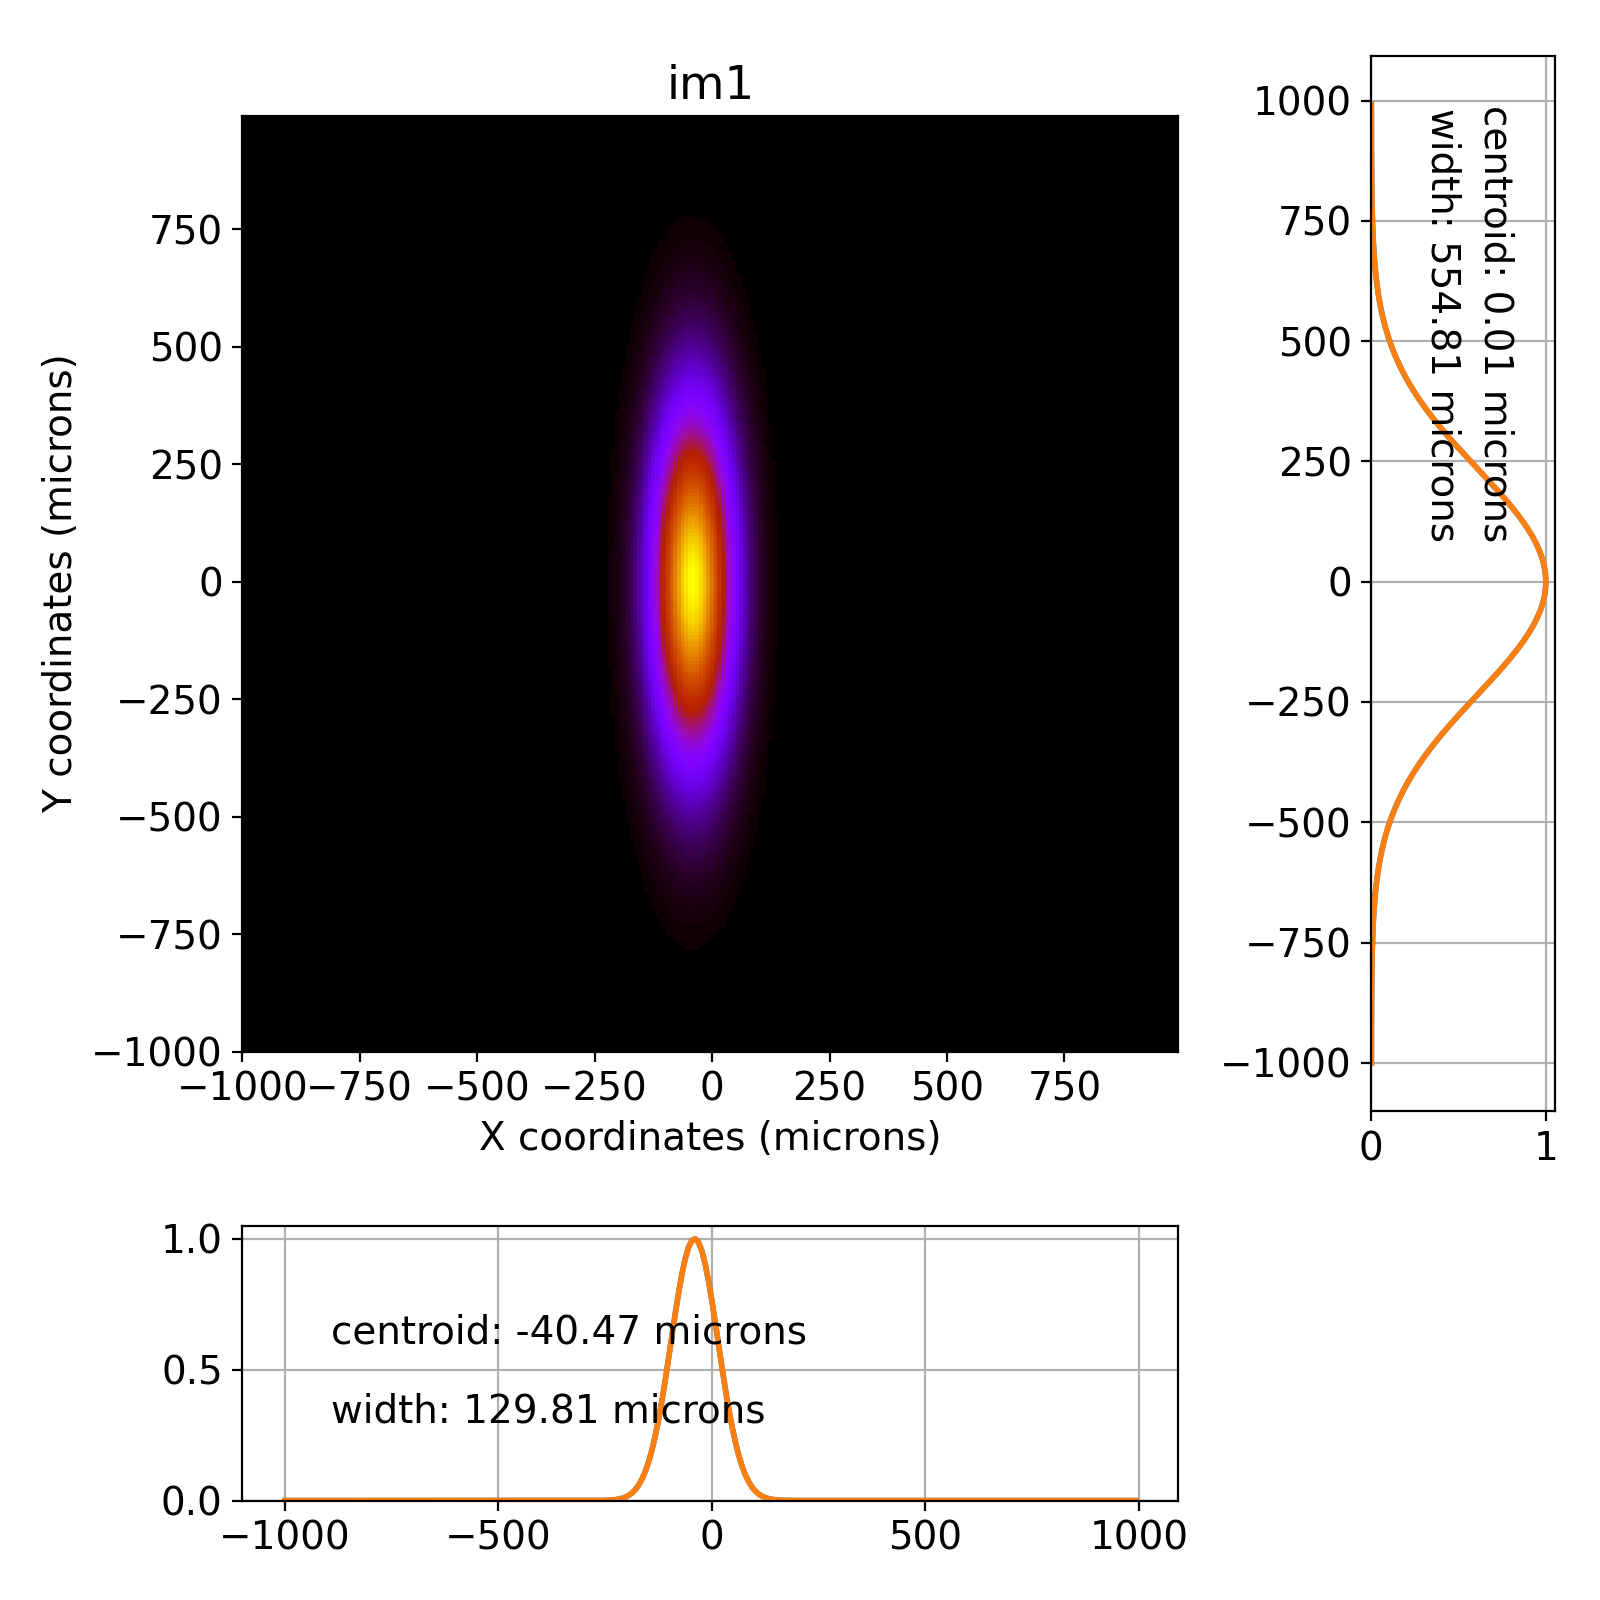

<IPython.core.display.Javascript object>


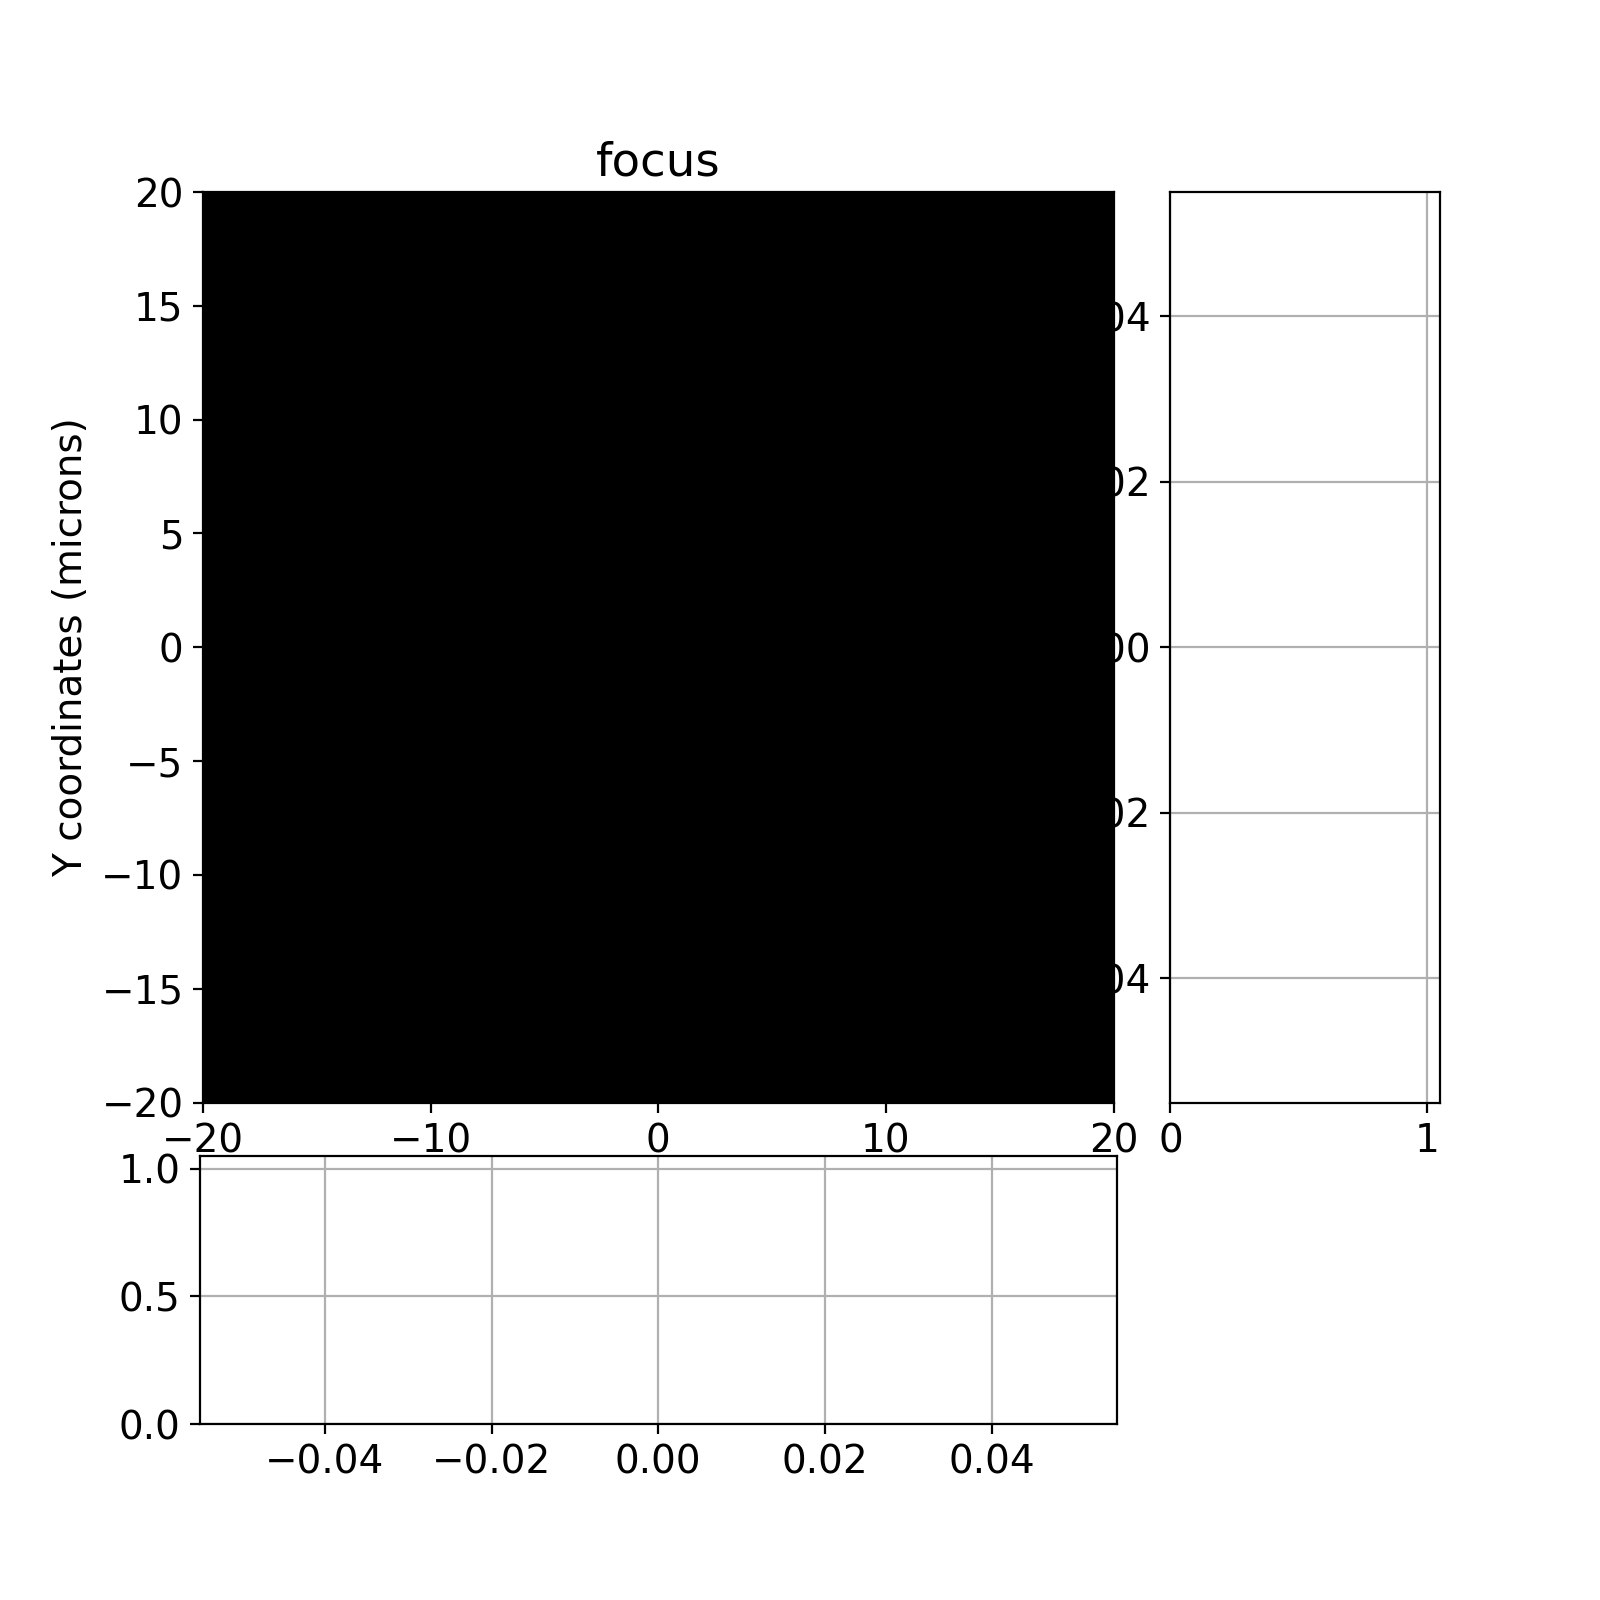

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3101: RuntimeWarning: invalid value encountered in true_divide
  ax_y.plot(self.y_lineout/np.max(self.y_lineout), self.y * 1e6)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3110: RuntimeWarning: invalid value encountered in true_divide
  ax_x.plot(self.x * 1e6, self.x_lineout/np.max(self.x_lineout))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<IPython.core.display.Javascript object>


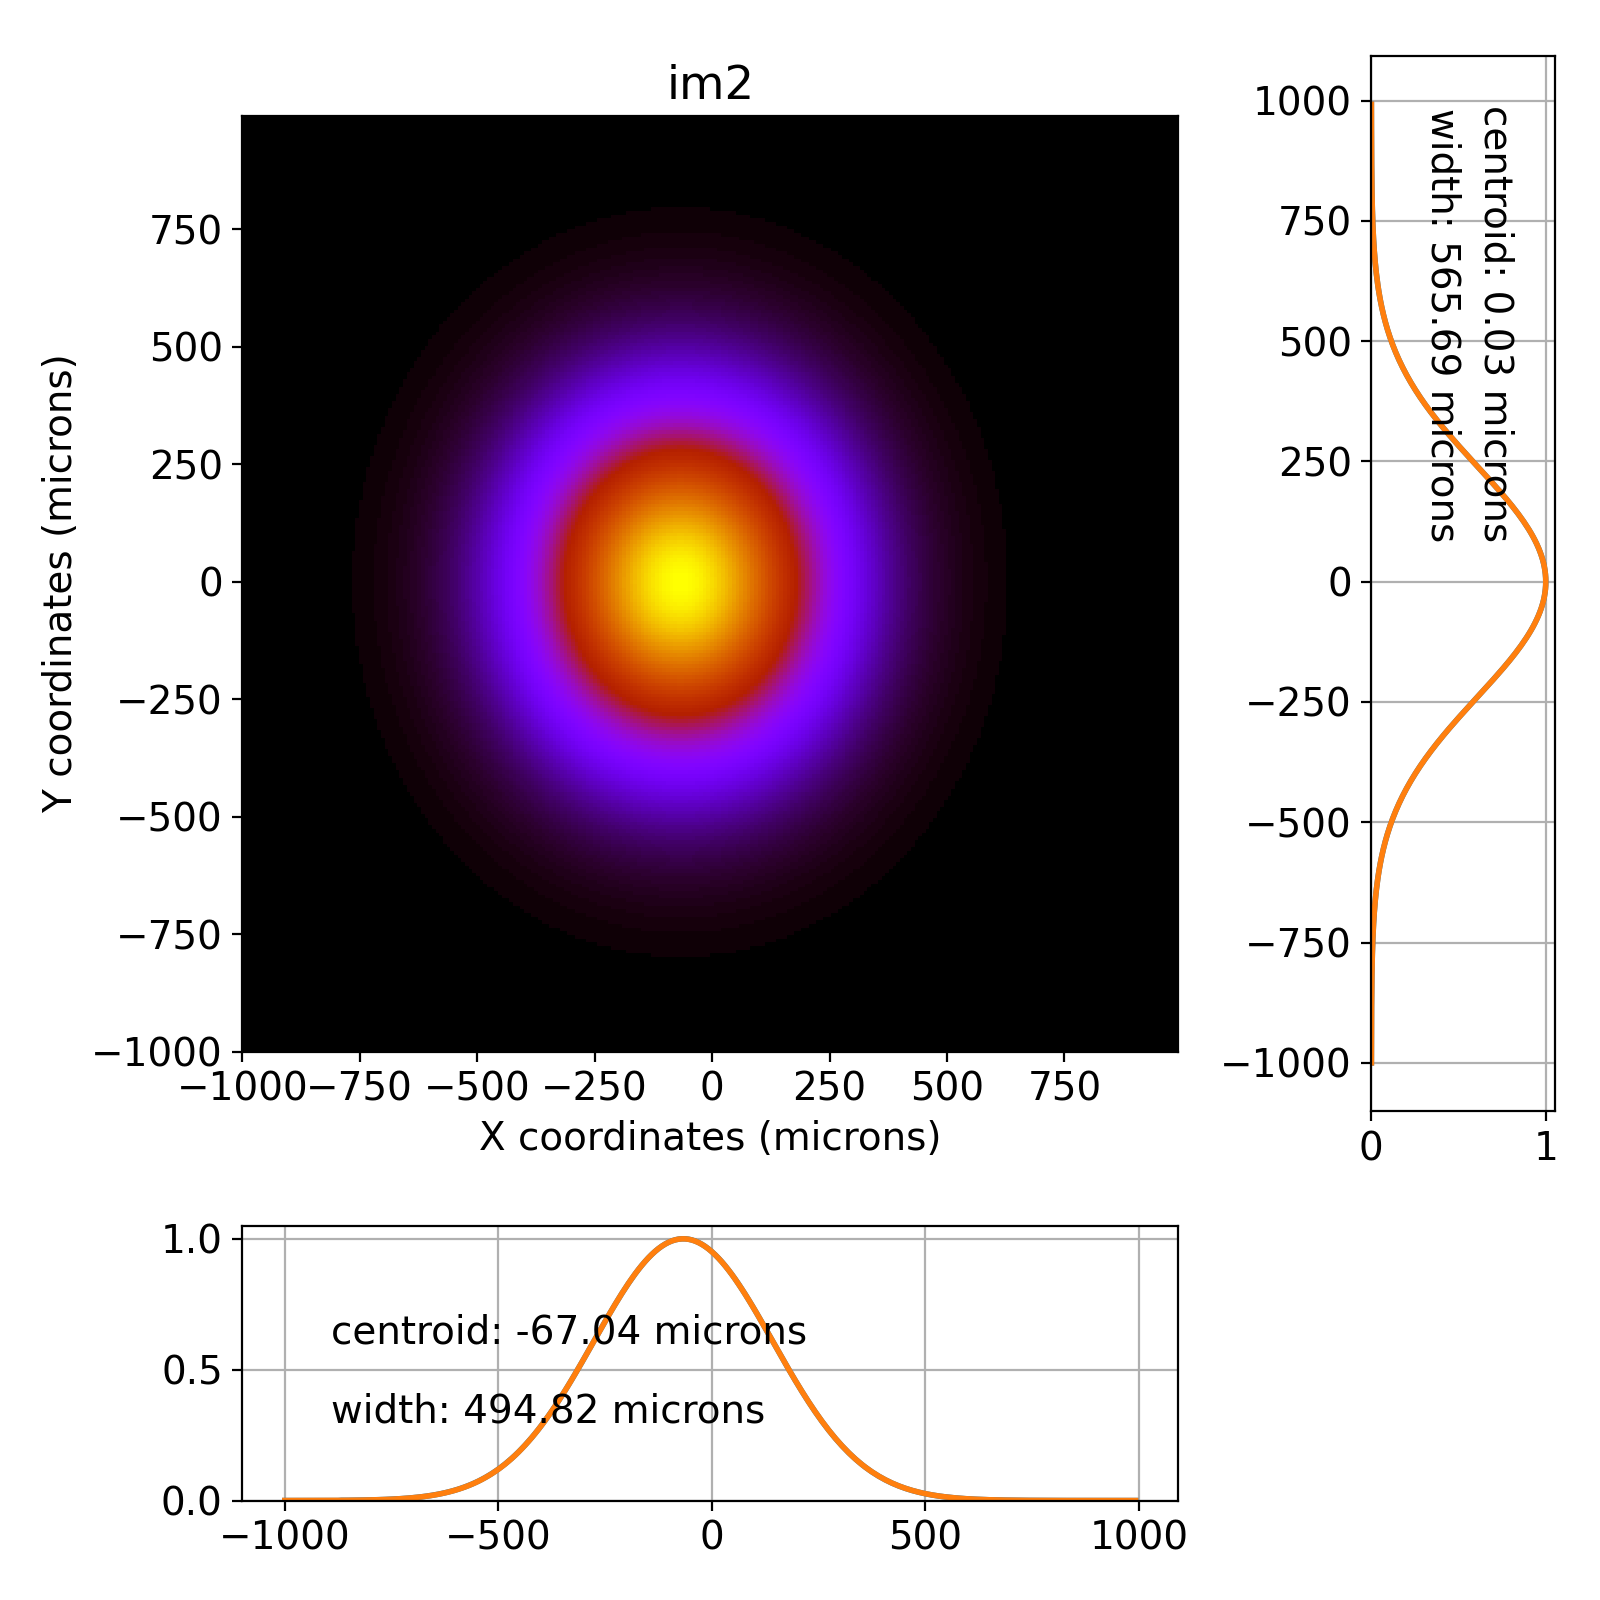

In [211]:
b2 = mono_beamline.propagate_beamline(b1)
mono_beamline.im0.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

<IPython.core.display.Javascript object>


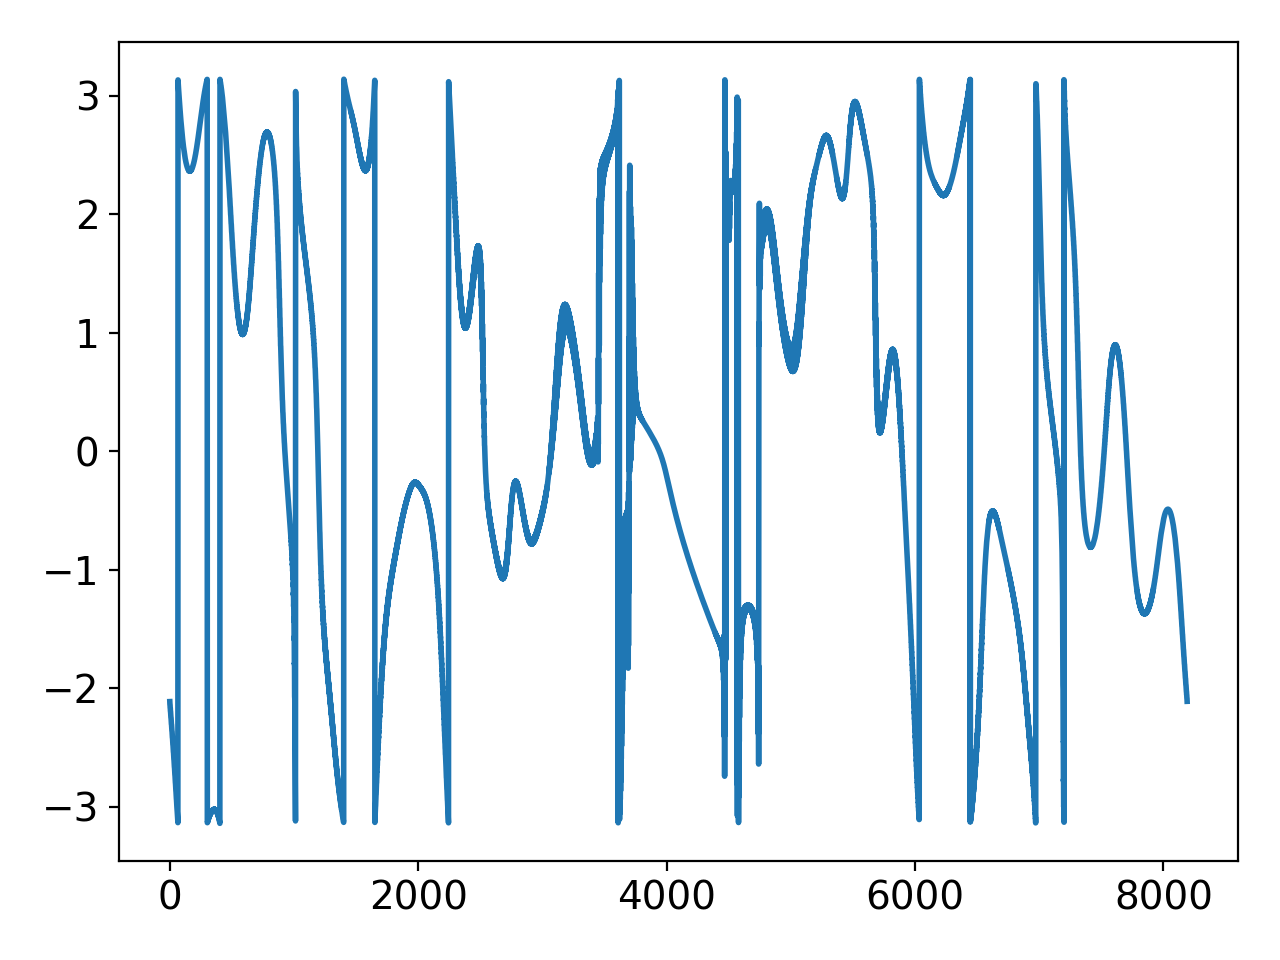

In [141]:
plt.figure()
plt.plot(np.angle(b2.wavex))

In [212]:
beam_params['photonEnergy'] = 9000

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=1000)

In [213]:
pulse_test.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

FWHM in x: 551.9970745186541 microns
FWHM in y: 551.9970745186541 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129893362597122
5.129893362597122
FWHM in x: 551.9970745186539 microns
FWHM in y: 551.9970745186539 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129893362597122
5.129893362597122
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.984706
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.01
zx: 10.864706
zy: 160.990686
azimuth 0.02 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103166
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: -0.00
zx: -1.003166
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003166
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: -0.

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2899: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2900: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2907: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2913: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.

FWHM in x: 551.9968201222246 microns
FWHM in y: 551.9968201222246 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129895729222622
5.129895729222622
FWHM in x: 551.9968201222246 microns
FWHM in y: 551.9968201222246 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129895729222622
5.129895729222622
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.984777
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.864777
zy: 160.990686
azimuth 0.01 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103166
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003166
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003166
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00

zx: 1.096832
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.34e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.520441
zy: 163.190686
azimuth -0.12 mrad
drift7
delta z: 1.38
zx: -11.370743
zy: 163.340385
azimuth -0.12 mrad
c3
zRx: 3.34e+00
zRy: 4.71e+01
zx: -11.370743
zy: 163.340385
azimuth -443.02 mrad
drift8
delta z: -0.53
zx: -10.562597
zy: 164.148530
azimuth -443.02 mrad
c4
zRx: 5.36e+01
zRy: 4.71e+01
zx: -169.439106
zy: 164.148530
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.338932
zy: 164.248704
azimuth -0.03 mrad
im2
zx: -169.338932
zy: 164.248704
azimuth -0.03 mrad
FWHM in x: 551.9955481436007 microns
FWHM in y: 551.9955481436007 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129907562350122
5.129907562350122
FWHM in x: 551.9955481436006 microns
FWHM in y: 551.9955481436006 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129907562350122
5.129907562350122
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160

FWHM in x: 551.9945305649287 microns
FWHM in y: 551.9945305649287 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129917028852121
5.129917028852121
FWHM in x: 551.9945305649286 microns
FWHM in y: 551.9945305649286 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129917028852121
5.129917028852121
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.985420
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.865420
zy: 160.990686
azimuth 0.01 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103169
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003169
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003169
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00

zx: 1.096829
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.34e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.521787
zy: 163.190686
azimuth -0.12 mrad
drift7
delta z: 1.38
zx: -11.372076
zy: 163.340397
azimuth -0.12 mrad
c3
zRx: 3.34e+00
zRy: 4.71e+01
zx: -11.372076
zy: 163.340397
azimuth -443.03 mrad
drift8
delta z: -0.53
zx: -10.563936
zy: 164.148538
azimuth -443.03 mrad
c4
zRx: 5.36e+01
zRy: 4.71e+01
zx: -169.450329
zy: 164.148538
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.350162
zy: 164.248705
azimuth -0.03 mrad
im2
zx: -169.350162
zy: 164.248705
azimuth -0.03 mrad
FWHM in x: 551.9932585968724 microns
FWHM in y: 551.9932585968724 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129928861979623
5.129928861979623
FWHM in x: 551.9932585968724 microns
FWHM in y: 551.9932585968724 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129928861979623
5.129928861979623
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160

zx: -169.355155
zy: 164.248705
azimuth -0.03 mrad
im2
zx: -169.355155
zy: 164.248705
azimuth -0.03 mrad
FWHM in x: 551.9922410266547 microns
FWHM in y: 551.9922410266547 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129938328481623
5.129938328481623
FWHM in x: 551.9922410266546 microns
FWHM in y: 551.9922410266546 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129938328481623
5.129938328481623
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.986062
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.866062
zy: 160.990686
azimuth 0.01 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103172
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003172
zy

zx: -0.003173
zy: 162.090686
azimuth -0.05 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003173
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096827
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.34e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.523134
zy: 163.190686
azimuth -0.12 mrad
drift7
delta z: 1.38
zx: -11.373411
zy: 163.340409
azimuth -0.12 mrad
c3
zRx: 3.34e+00
zRy: 4.71e+01
zx: -11.373411
zy: 163.340409
azimuth -443.03 mrad
drift8
delta z: -0.53
zx: -10.565275
zy: 164.148545
azimuth -443.03 mrad
c4
zRx: 5.36e+01
zRy: 4.71e+01
zx: -169.461557
zy: 164.148545
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.361397
zy: 164.248705
azimuth -0.03 mrad
im2
zx: -169.361397
zy: 164.248705
azimuth -0.03 mrad
FWHM in x: 551.9909690691666 microns
FWHM in y: 551.9909690691666 microns

FWHM in x: 551.989951507403 microns
FWHM in y: 551.989951507403 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129959628111124
5.129959628111124
FWHM in x: 551.989951507403 microns
FWHM in y: 551.989951507403 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129959628111124
5.129959628111124
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.986704
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.866704
zy: 160.990686
azimuth 0.01 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103175
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003175
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003175
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x s

x remains focused
y stays unfocused
zx: -0.003176
zy: 162.090686
azimuth -0.05 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003176
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096824
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.34e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.524481
zy: 163.190686
azimuth -0.12 mrad
drift7
delta z: 1.38
zx: -11.374745
zy: 163.340422
azimuth -0.12 mrad
c3
zRx: 3.34e+00
zRy: 4.71e+01
zx: -11.374745
zy: 163.340422
azimuth -443.03 mrad
drift8
delta z: -0.53
zx: -10.566614
zy: 164.148553
azimuth -443.03 mrad
c4
zRx: 5.36e+01
zRy: 4.71e+01
zx: -169.472790
zy: 164.148553
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.372637
zy: 164.248706
azimuth -0.03 mrad
im2
zx: -169.372637
zy: 164.248706
azimuth -0.03 mrad
FWHM in x: 551.9886795604828 microns


zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.987346
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.867346
zy: 160.990686
azimuth 0.00 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103178
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003178
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003178
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003178
zy: 162.090686
azimuth -0.05 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003178
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.09

zRx: 3.34e+00
zRy: 4.71e+01
zx: -11.376080
zy: 163.340434
azimuth -443.03 mrad
drift8
delta z: -0.53
zx: -10.567954
zy: 164.148561
azimuth -443.03 mrad
c4
zRx: 5.36e+01
zRy: 4.71e+01
zx: -169.484028
zy: 164.148561
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.383883
zy: 164.248706
azimuth -0.03 mrad
im2
zx: -169.383883
zy: 164.248706
azimuth -0.03 mrad
FWHM in x: 551.9863900708206 microns
FWHM in y: 551.9863900708206 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129992760868125
5.129992760868125
FWHM in x: 551.9863900708204 microns
FWHM in y: 551.9863900708204 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129992760868125
5.129992760868125
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+

zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.987989
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.867989
zy: 160.990686
azimuth 0.00 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103181
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003181
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003181
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003181
zy: 162.090686
azimuth -0.05 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003181
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096819
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.526577
zy: 163.190686
azimuth -0.11 mrad
drift7
delta

zx: -169.495272
zy: 164.148568
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.395133
zy: 164.248707
azimuth -0.03 mrad
im2
zx: -169.395133
zy: 164.248707
azimuth -0.03 mrad
FWHM in x: 551.98410060018 microns
FWHM in y: 551.98410060018 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130014060497625
5.130014060497625
FWHM in x: 551.9841006001799 microns
FWHM in y: 551.9841006001799 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130014060497625
5.130014060497625
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.988346
zy: 160.110686
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 10.868346
zy: 160.990686
azimuth -0.00 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103182
zy

zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103184
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003184
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003184
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003183
zy: 162.090686
azimuth -0.05 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003183
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096817
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.527925
zy: 163.190686
azimuth -0.11 mrad
drift7
delta z: 1.38
zx: -11.378157
zy: 163.340453
azimuth -0.11 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.378157
zy: 163.340453
azimuth -443.04 mrad
drift8
d

zx: -169.406389
zy: 164.248707
azimuth -0.03 mrad
FWHM in x: 551.9818111485605 microns
FWHM in y: 551.9818111485605 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130035360127127
5.130035360127127
FWHM in x: 551.9818111485604 microns
FWHM in y: 551.9818111485604 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130035360127127
5.130035360127127
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.988988
zy: 160.110686
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 10.868988
zy: 160.990686
azimuth -0.00 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103185
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003185
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003185
zy:

zx: -0.003186
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096814
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.529273
zy: 163.190686
azimuth -0.11 mrad
drift7
delta z: 1.38
zx: -11.379493
zy: 163.340466
azimuth -0.11 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.379493
zy: 163.340466
azimuth -443.04 mrad
drift8
delta z: -0.53
zx: -10.571379
zy: 164.148580
azimuth -443.04 mrad
c4
zRx: 5.36e+01
zRy: 4.71e+01
zx: -169.512772
zy: 164.148580
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.412644
zy: 164.248707
azimuth -0.03 mrad
im2
zx: -169.412644
zy: 164.248707
azimuth -0.03 mrad
FWHM in x: 551.9805392392134 microns
FWHM in y: 551.9805392392134 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130047193254626
5.130047193254626
FWHM in x: 551.9805392392133 microns
FWHM in y: 551.9805392392133 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1300471

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.989773
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.869773
zy: 160.990686
azimuth -0.01 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103189
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003189
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003189
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003189
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003189
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096811
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.530322
zy: 163.190686
azimuth -0.10 mrad
drift7
delta z: 1.38
zx: -11.380533
zy: 163.340475
azimuth -0.10 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.380533
zy: 163.340475
azimuth -443.

zx: -11.381127
zy: 163.340481
azimuth -0.10 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.381127
zy: 163.340481
azimuth -443.04 mrad
drift8
delta z: -0.53
zx: -10.573019
zy: 164.148589
azimuth -443.04 mrad
c4
zRx: 5.36e+01
zRy: 4.71e+01
zx: -169.526530
zy: 164.148589
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.426412
zy: 164.248708
azimuth -0.03 mrad
im2
zx: -169.426412
zy: 164.248708
azimuth -0.03 mrad
FWHM in x: 551.977741059314 microns
FWHM in y: 551.977741059314 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130073226135126
5.130073226135126
FWHM in x: 551.9777410593139 microns
FWHM in y: 551.9777410593139 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130073226135126
5.130073226135126
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.11068

zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.990415
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.870415
zy: 160.990686
azimuth -0.01 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103191
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003191
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003191
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003191
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003191
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096809
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.531671
zy: 163.190686
azimuth -0.10 mrad
drift7
delta z: 1.38
zx: -11.381870
zy: 163.340488
azimuth -0.10 mrad
c3
zRx: 3.3

zx: -11.382464
zy: 163.340493
azimuth -0.10 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.382464
zy: 163.340493
azimuth -443.05 mrad
drift8
delta z: -0.53
zx: -10.574360
zy: 164.148597
azimuth -443.05 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.537793
zy: 164.148597
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.437682
zy: 164.248708
azimuth -0.03 mrad
im2
zx: -169.437682
zy: 164.248708
azimuth -0.03 mrad
FWHM in x: 551.9754516605302 microns
FWHM in y: 551.9754516605302 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130094525764628
5.130094525764628
FWHM in x: 551.9754516605301 microns
FWHM in y: 551.9754516605301 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130094525764628
5.130094525764628
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.991200
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.871200
zy: 160.990686
azimuth -0.01 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103195
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003195
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003195
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003195
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003195
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096805
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.53

zx: 1.096803
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.534221
zy: 163.190686
azimuth -0.10 mrad
drift7
delta z: 1.38
zx: -11.384396
zy: 163.340511
azimuth -0.10 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.384396
zy: 163.340511
azimuth -443.05 mrad
drift8
delta z: -0.53
zx: -10.576299
zy: 164.148608
azimuth -443.05 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.554071
zy: 164.148608
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.453970
zy: 164.248709
azimuth -0.03 mrad
im2
zx: -169.453970
zy: 164.248709
azimuth -0.03 mrad
FWHM in x: 551.9721447847552 microns
FWHM in y: 551.9721447847552 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130125291896128
5.130125291896128
FWHM in x: 551.9721447847552 microns
FWHM in y: 551.9721447847552 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130125291896128
5.130125291896128
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160

zx: -0.003199
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096801
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.535121
zy: 163.190686
azimuth -0.09 mrad
drift7
delta z: 1.38
zx: -11.385288
zy: 163.340520
azimuth -0.09 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.385288
zy: 163.340520
azimuth -443.05 mrad
drift8
delta z: -0.53
zx: -10.577194
zy: 164.148613
azimuth -443.05 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.561587
zy: 164.148613
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.461491
zy: 164.248709
azimuth -0.03 mrad
im2
zx: -169.461491
zy: 164.248709
azimuth -0.03 mrad
FWHM in x: 551.9706185477821 microns
FWHM in y: 551.9706185477821 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130139491649129
5.130139491649129
FWHM in x: 551.9706185477819 microns
FWHM in y: 551.9706185477819 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1301394

FWHM in x: 551.9690923192622 microns
FWHM in y: 551.9690923192622 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130153691402129
5.130153691402129
FWHM in x: 551.9690923192621 microns
FWHM in y: 551.9690923192621 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130153691402129
5.130153691402129
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.992556
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.872556
zy: 160.990686
azimuth -0.02 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103201
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003201
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003201
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.0

zx: -0.003203
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096797
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.537072
zy: 163.190686
azimuth -0.09 mrad
drift7
delta z: 1.38
zx: -11.387221
zy: 163.340537
azimuth -0.09 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.387221
zy: 163.340537
azimuth -443.05 mrad
drift8
delta z: -0.53
zx: -10.579134
zy: 164.148624
azimuth -443.05 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.577881
zy: 164.148624
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.477795
zy: 164.248710
azimuth -0.03 mrad
im2
zx: -169.477795
zy: 164.248710
azimuth -0.03 mrad
FWHM in x: 551.9673117300061 microns
FWHM in y: 551.9673117300061 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13017025778063
5.13017025778063
FWHM in x: 551.967311730006 microns
FWHM in y: 551.967311730006 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13017025778

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.993484
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.873484
zy: 160.990686
azimuth -0.02 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103205
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003205
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003205
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003205
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003205
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096795
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.538123
zy: 163.190686
azimuth -0.09 mrad
drift7
delta z: 1.38
zx: -11.3

zx: -11.388857
zy: 163.340553
azimuth -0.09 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.388857
zy: 163.340553
azimuth -443.06 mrad
drift8
delta z: -0.53
zx: -10.580776
zy: 164.148633
azimuth -443.06 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.591676
zy: 164.148633
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.491599
zy: 164.248710
azimuth -0.03 mrad
im2
zx: -169.491599
zy: 164.248710
azimuth -0.03 mrad
FWHM in x: 551.9645136844216 microns
FWHM in y: 551.9645136844216 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130196290661131
5.130196290661131
FWHM in x: 551.9645136844215 microns
FWHM in y: 551.9645136844215 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130196290661131
5.130196290661131
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110

zx: -1.003209
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003209
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003209
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003209
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096791
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.539775
zy: 163.190686
azimuth -0.08 mrad
drift7
delta z: 1.38
zx: -11.389899
zy: 163.340562
azimuth -0.08 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.389899
zy: 163.340562
azimuth -443.06 mrad
drift8
delta z: -0.53
zx: -10.581822
zy: 164.148639
azimuth -443.06 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.600459
zy: 164.148639
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.500387
zy: 164.248711
azimuth -0.03 mrad
im2
zx: -169.500387
zy: 164.248711
azimuth -0.03 mrad
FWHM in x: 551.9627331247515 microns
FWHM in y: 551.9627331247515 

im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.994768
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.874768
zy: 160.990686
azimuth -0.03 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103211
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003211
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003211
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003211
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003211
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096789
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy

zx: 1.096788
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.541427
zy: 163.190686
azimuth -0.08 mrad
drift7
delta z: 1.38
zx: -11.391536
zy: 163.340577
azimuth -0.08 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.391536
zy: 163.340577
azimuth -443.06 mrad
drift8
delta z: -0.53
zx: -10.583465
zy: 164.148649
azimuth -443.06 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.614267
zy: 164.148649
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.514204
zy: 164.248711
azimuth -0.03 mrad
im2
zx: -169.514204
zy: 164.248711
azimuth -0.03 mrad
FWHM in x: 551.9599351256581 microns
FWHM in y: 551.9599351256581 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130238889920132
5.130238889920132
FWHM in x: 551.959935125658 microns
FWHM in y: 551.959935125658 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130238889920132
5.130238889920132
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.0

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.995410
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.875410
zy: 160.990686
azimuth -0.03 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103214
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003214
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003214
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003214
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003214
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096786
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.542179
zy: 163.190686
azimuth -0.08 mrad
drift7
delta z: 1.38
zx: -11.3

zx: -10.585109
zy: 164.148658
azimuth -443.07 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.628082
zy: 164.148658
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.528028
zy: 164.248712
azimuth -0.03 mrad
im2
zx: -169.528028
zy: 164.248712
azimuth -0.03 mrad
FWHM in x: 551.9571371549755 microns
FWHM in y: 551.9571371549755 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130264922800633
5.130264922800633
FWHM in x: 551.9571371549754 microns
FWHM in y: 551.9571371549754 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130264922800633
5.130264922800633
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.995910
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.875910
zy: 160.990686
a

zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103217
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003217
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003217
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003217
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003217
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096783
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.543832
zy: 163.190686
azimuth -0.07 mrad
drift7
delta z: 1.38
zx: -11.393919
zy: 163.340599
azimuth -0.07 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.393919
zy: 163.340599
azimuth -443.07 mrad
drift8
delta z: -0.53
zx: -10.585856
zy: 164.148662
azimuth -443.07 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.634365
zy: 164.148662
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.534314
zy: 164.248712
azimuth -0.03 mrad
im2


zx: -169.539345
zy: 164.248712
azimuth -0.03 mrad
FWHM in x: 551.9548479273668 microns
FWHM in y: 551.9548479273668 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130286222430134
5.130286222430134
FWHM in x: 551.9548479273667 microns
FWHM in y: 551.9548479273667 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130286222430134
5.130286222430134
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.996552
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.876552
zy: 160.990686
azimuth -0.04 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103219
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003219
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003219
zy:

zx: 1.096779
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.545486
zy: 163.190686
azimuth -0.07 mrad
drift7
delta z: 1.38
zx: -11.395558
zy: 163.340615
azimuth -0.07 mrad
c3
zRx: 3.35e+00
zRy: 4.71e+01
zx: -11.395558
zy: 163.340615
azimuth -443.07 mrad
drift8
delta z: -0.53
zx: -10.587501
zy: 164.148671
azimuth -443.07 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.648191
zy: 164.148671
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.548150
zy: 164.248713
azimuth -0.03 mrad
im2
zx: -169.548150
zy: 164.248713
azimuth -0.03 mrad
FWHM in x: 551.9530674301529 microns
FWHM in y: 551.9530674301529 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130302788808635
5.130302788808635
FWHM in x: 551.9530674301528 microns
FWHM in y: 551.9530674301528 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130302788808635
5.130302788808635
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160

zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.997337
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.877337
zy: 160.990686
azimuth -0.04 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103222
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003222
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003222
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003222
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003222
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096778
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.35e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.546238
zy: 163.190686
azimuth -0.07 mrad
drift7
delta z: 1.38
zx: -11.396303
zy: 163.340621
azimuth -0.07 mrad
c3
zRx: 3.3

zx: -11.396899
zy: 163.340627
azimuth -0.07 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.396899
zy: 163.340627
azimuth -443.07 mrad
drift8
delta z: -0.53
zx: -10.588847
zy: 164.148679
azimuth -443.07 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.659510
zy: 164.148679
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.559476
zy: 164.248713
azimuth -0.03 mrad
im2
zx: -169.559476
zy: 164.248713
azimuth -0.03 mrad
FWHM in x: 551.9507782363545 microns
FWHM in y: 551.9507782363545 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130324088438134
5.130324088438134
FWHM in x: 551.9507782363545 microns
FWHM in y: 551.9507782363545 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130324088438134
5.130324088438134
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110

zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.998122
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.878122
zy: 160.990686
azimuth -0.04 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103226
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003226
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003226
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003226
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003226
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096774
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.547893
zy: 163.190686
azimuth -0.07 mrad
drift7
delta z: 1.38
zx: -11.397943
zy: 163.340637
azimuth -0.07 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.397943
zy: 163.340637
azimuth -443.08 mrad
drift8
delta z: -0.53
zx: -10.589894
zy: 164.148685
azimuth -443.08 mrad
c4
zRx: 

zx: -10.590493
zy: 164.148688
azimuth -443.08 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.673351
zy: 164.148688
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -169.573325
zy: 164.248714
azimuth -0.03 mrad
im2
zx: -169.573325
zy: 164.248714
azimuth -0.03 mrad
FWHM in x: 551.9479803586496 microns
FWHM in y: 551.9479803586496 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130350121318635
5.130350121318635
FWHM in x: 551.9479803586496 microns
FWHM in y: 551.9479803586496 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130350121318635
5.130350121318635
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.998479
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.878479
zy: 160.990686
a

zx: 10.878764
zy: 160.990686
azimuth -0.05 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103229
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003229
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003229
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003229
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003229
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096771
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.549248
zy: 163.190686
azimuth -0.06 mrad
drift7
delta z: 1.38
zx: -11.399285
zy: 163.340649
azimuth -0.06 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.399285
zy: 163.340649
azimuth -443.08 mrad
drift8
delta z: -0.53
zx: -10.591241
zy: 164.148692
azimuth -443.08 mrad
c4
zRx: 5.37e+01
zRy: 4.71e+01
zx: -169.679645
zy: 164.148692
azimuth -0.03 mrad
drift9
delta z: -0.80
z

zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.999263
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.879263
zy: 160.990686
azimuth -0.05 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103231
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003231
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003231
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003231
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003231
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096769
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.550301
zy: 163.190686
azimuth -0.06 mrad
drift7
delta z: 1.38
zx: -11.400329
zy: 163.340659
azimuth -0.06 mrad
c3
zRx: 3.3

zx: -169.596005
zy: 164.248715
azimuth -0.03 mrad
im2
zx: -169.596005
zy: 164.248715
azimuth -0.03 mrad
FWHM in x: 551.943402074593 microns
FWHM in y: 551.943402074593 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130392720577636
5.130392720577636
FWHM in x: 551.9434020745929 microns
FWHM in y: 551.9434020745929 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130392720577636
5.130392720577636
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 9.999763
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.879763
zy: 160.990686
azimuth -0.05 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103233
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003233
zy:

zx: -1.003235
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003235
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003235
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003235
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096765
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.552259
zy: 163.190686
azimuth -0.06 mrad
drift7
delta z: 1.38
zx: -11.402269
zy: 163.340676
azimuth -0.06 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.402269
zy: 163.340676
azimuth -443.08 mrad
drift8
delta z: -0.53
zx: -10.594236
zy: 164.148709
azimuth -443.08 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.704836
zy: 164.148709
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.604831
zy: 164.248715
azimuth -0.03 mrad
im2
zx: -169.604831
zy: 164.248715
azimuth -0.03 mrad
FWHM in x: 551.9416216513363 m

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.000548
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.880548
zy: 160.990686
azimuth -0.05 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103236
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003236
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003236
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003236
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003236
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096764
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.5

zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.403911
zy: 163.340692
azimuth -443.09 mrad
drift8
delta z: -0.53
zx: -10.595884
zy: 164.148719
azimuth -443.09 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.718703
zy: 164.148719
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.618706
zy: 164.248715
azimuth -0.03 mrad
im2
zx: -169.618706
zy: 164.248715
azimuth -0.03 mrad
FWHM in x: 551.9388238666046 microns
FWHM in y: 551.9388238666046 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130435319836638
5.130435319836638
FWHM in x: 551.9388238666046 microns
FWHM in y: 551.9388238666046 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130435319836638
5.130435319836638
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+

zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.001333
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.881333
zy: 160.990686
azimuth -0.06 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103240
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003240
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003240
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003240
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003240
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096760
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.554670
zy: 163.190686
azimuth -0.05 mrad
drift7
delta z: 1.38
zx: -11.404657
zy: 163.340698
azimuth -0.05 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.404657
zy: 163.340698
azimuth -443.09 mrad
drift8
delta z: -0.53
zx: -10.596633
zy: 164

zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.730053
zy: 164.148726
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.630064
zy: 164.248716
azimuth -0.03 mrad
im2
zx: -169.630064
zy: 164.248716
azimuth -0.03 mrad
FWHM in x: 551.9365347911357 microns
FWHM in y: 551.9365347911357 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130456619466138
5.130456619466138
FWHM in x: 551.9365347911356 microns
FWHM in y: 551.9365347911356 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130456619466138
5.130456619466138
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.001689
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.881689
zy: 160.990686
azimuth -0.06 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
fo

zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.001975
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.881975
zy: 160.990686
azimuth -0.06 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103243
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003243
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003243
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003243
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003243
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096757
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.556026
zy: 163.190686
azimuth -0.05 mrad
drift7
delta z: 1.38
zx: -11.406001
zy: 163.340711
azimuth -0.05 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.406001
zy: 163.340711
azimuth -443.09 mrad
drift8
delta z: -0.53
zx: -10.597982
zy: 164.148730
azimuth -443.09 mrad
c4
zRx:

zx: -169.641427
zy: 164.248716
azimuth -0.03 mrad
im2
zx: -169.641427
zy: 164.248716
azimuth -0.03 mrad
FWHM in x: 551.9342457346827 microns
FWHM in y: 551.9342457346827 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130477919095639
5.130477919095639
FWHM in x: 551.9342457346827 microns
FWHM in y: 551.9342457346827 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130477919095639
5.130477919095639
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.002332
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.882332
zy: 160.990686
azimuth -0.06 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103244
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003244


zx: -1.003246
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003246
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003246
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003246
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096754
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.557383
zy: 163.190686
azimuth -0.05 mrad
drift7
delta z: 1.38
zx: -11.407346
zy: 163.340723
azimuth -0.05 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.407346
zy: 163.340723
azimuth -443.09 mrad
drift8
delta z: -0.53
zx: -10.599331
zy: 164.148738
azimuth -443.09 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.747721
zy: 164.148738
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.647742
zy: 164.248717
azimuth -0.03 mrad
im2
zx: -169.647742
zy: 164.248717
azimuth -0.03 mrad
FWHM in x: 551.9329740448704 microns
FWHM in y: 551.9329740448704 

zx: -169.655322
zy: 164.248717
azimuth -0.03 mrad
FWHM in x: 551.9314480248426 microns
FWHM in y: 551.9314480248426 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13050395197614
5.13050395197614
FWHM in x: 551.9314480248424 microns
FWHM in y: 551.9314480248424 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13050395197614
5.13050395197614
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.003117
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.883117
zy: 160.990686
azimuth -0.07 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103248
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003248
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003248
zy: 16

zx: -0.003250
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003250
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096750
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.559344
zy: 163.190686
azimuth -0.04 mrad
drift7
delta z: 1.38
zx: -11.409289
zy: 163.340741
azimuth -0.04 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.409289
zy: 163.340741
azimuth -443.10 mrad
drift8
delta z: -0.53
zx: -10.601281
zy: 164.148749
azimuth -443.10 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.764137
zy: 164.148749
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.664169
zy: 164.248717
azimuth -0.03 mrad
im2
zx: -169.664169
zy: 164.248717
azimuth -0.03 mrad
FWHM in x: 551.9296676788255 microns
FWHM in y: 551.9296676788255 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13052051835464
5.13052051835464
FWHM in x: 551.9296676788254 microns
FWHM in y: 551.9296676788254 microns
FWHM Divergence (

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.004044
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.884044
zy: 160.990686
azimuth -0.07 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103252
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003252
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003252
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003252
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003252
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096748
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4

x remains focused
y stays unfocused
zx: -0.003254
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003254
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096746
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.561306
zy: 163.190686
azimuth -0.04 mrad
drift7
delta z: 1.38
zx: -11.411233
zy: 163.340759
azimuth -0.04 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.411233
zy: 163.340759
azimuth -443.10 mrad
drift8
delta z: -0.53
zx: -10.603232
zy: 164.148760
azimuth -443.10 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.780565
zy: 164.148760
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.680607
zy: 164.248718
azimuth -0.03 mrad
im2
zx: -169.680607
zy: 164.248718
azimuth -0.03 mrad
FWHM in x: 551.9263613524552 microns
FWHM in y: 551.9263613524552 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130551284486142
5.130551284486142
FWHM in x: 551.9263613524549 microns
FWHM in y: 551.9

zx: -1.003256
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003256
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003256
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096744
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.562211
zy: 163.190686
azimuth -0.04 mrad
drift7
delta z: 1.38
zx: -11.412130
zy: 163.340767
azimuth -0.04 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.412130
zy: 163.340767
azimuth -443.10 mrad
drift8
delta z: -0.53
zx: -10.604132
zy: 164.148765
azimuth -443.10 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.788150
zy: 164.148765
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.688197
zy: 164.248718
azimuth -0.03 mrad
im2
zx: -169.688197
zy: 164.248718
azimuth -0.03 mrad
FWHM in x: 551.9248353690499 microns
FWHM in y: 551.9248353690499 microns
FWHM Div

zx: -0.003258
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003258
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096742
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.563117
zy: 163.190686
azimuth -0.03 mrad
drift7
delta z: 1.38
zx: -11.413028
zy: 163.340775
azimuth -0.03 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.413028
zy: 163.340775
azimuth -443.11 mrad
drift8
delta z: -0.53
zx: -10.605033
zy: 164.148770
azimuth -443.11 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.795738
zy: 164.148770
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.695790
zy: 164.248719
azimuth -0.03 mrad
im2
zx: -169.695790
zy: 164.248719
azimuth -0.03 mrad
FWHM in x: 551.9233093940961 microns
FWHM in y: 551.9233093940961 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130579683992142
5.130579683992142
FWHM in x: 551.923309394096 microns
FWHM in y: 551.923309394096 microns
FWHM Divergence (

zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.005828
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.885828
zy: 160.990686
azimuth -0.08 mrad
crl1
zRx: 3.03e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103260
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003260
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003260
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003260
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003260
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096740
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.564174
zy: 163.190686
azimuth -0.03 mrad
drift7
delta z: 1.38
zx: -11.414075
zy: 163.

zx: -10.606986
zy: 164.148781
azimuth -443.11 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.812186
zy: 164.148781
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.712248
zy: 164.248719
azimuth -0.03 mrad
im2
zx: -169.712248
zy: 164.248719
azimuth -0.03 mrad
FWHM in x: 551.9200031440212 microns
FWHM in y: 551.9200031440212 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130610450123643
5.130610450123643
FWHM in x: 551.920003144021 microns
FWHM in y: 551.920003144021 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130610450123643
5.130610450123643
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.006327
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.886327
zy: 160.990686
az

zx: -1.003264
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003264
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003264
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003264
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096736
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.36e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.566138
zy: 163.190686
azimuth -0.03 mrad
drift7
delta z: 1.38
zx: -11.416021
zy: 163.340803
azimuth -0.03 mrad
c3
zRx: 3.36e+00
zRy: 4.71e+01
zx: -11.416021
zy: 163.340803
azimuth -443.11 mrad
drift8
delta z: -0.53
zx: -10.608037
zy: 164.148787
azimuth -443.11 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.821048
zy: 164.148787
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.721115
zy: 164.248720
azimuth -0.03 mrad
im2
zx: -169.721115
zy: 164.248720
azimuth -0.03 mrad
FWHM in x: 551.9182228719519 m

zx: -10.608939
zy: 164.148792
azimuth -443.11 mrad
c4
zRx: 5.38e+01
zRy: 4.71e+01
zx: -169.828645
zy: 164.148792
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.728718
zy: 164.248720
azimuth -0.03 mrad
im2
zx: -169.728718
zy: 164.248720
azimuth -0.03 mrad
FWHM in x: 551.9166969336188 microns
FWHM in y: 551.9166969336188 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130641216255144
5.130641216255144
FWHM in x: 551.9166969336187 microns
FWHM in y: 551.9166969336187 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130641216255144
5.130641216255144
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.007255
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.887255
zy: 160.990686


zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.007683
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.887683
zy: 160.990686
azimuth -0.09 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103268
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003268
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003268
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003268
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003268
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096732
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.568103
zy: 163.190686
azimuth -0.02 mrad
drift7
delta z: 1.38
zx: -11.417968
zy: 163.340821
azimuth -0.02 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.417968
zy: 163.340821
azimuth -443

zx: 1.096730
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.569010
zy: 163.190686
azimuth -0.02 mrad
drift7
delta z: 1.38
zx: -11.418867
zy: 163.340829
azimuth -0.02 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.418867
zy: 163.340829
azimuth -443.12 mrad
drift8
delta z: -0.53
zx: -10.610893
zy: 164.148803
azimuth -443.12 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.845115
zy: 164.148803
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.745198
zy: 164.248720
azimuth -0.03 mrad
im2
zx: -169.745198
zy: 164.248720
azimuth -0.03 mrad
FWHM in x: 551.9133907628885 microns
FWHM in y: 551.9133907628885 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1306719823866445
5.1306719823866445
FWHM in x: 551.9133907628883 microns
FWHM in y: 551.9133907628883 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1306719823866445
5.1306719823866445
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx:

zx: -169.752808
zy: 164.248721
azimuth -0.03 mrad
im2
zx: -169.752808
zy: 164.248721
azimuth -0.03 mrad
FWHM in x: 551.9118648513161 microns
FWHM in y: 551.9118648513161 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1306861821396454
5.1306861821396454
FWHM in x: 551.911864851316 microns
FWHM in y: 551.911864851316 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1306861821396454
5.1306861821396454
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.71e+01
zx: 10.008610
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.888610
zy: 160.990686
azimuth -0.09 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103273
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.00327

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003274
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003274
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096726
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.570976
zy: 163.190686
azimuth -0.02 mrad
drift7
delta z: 1.38
zx: -11.420815
zy: 163.340847
azimuth -0.02 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.420815
zy: 163.340847
azimuth -443.12 mrad
drift8
delta z: -0.53
zx: -10.612848
zy: 164.148814
azimuth -443.12 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.861596
zy: 164.148814
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.761689
zy: 164.248721
azimuth -0.03 mrad
im2
zx: -169.761689
zy: 164.248721
azimuth -0.03 mrad
FWHM in x: 551.9100846318291 microns
FWHM in y: 551.9100846318291 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130702748518146
5.130702748518146
FWHM in x: 551.91

zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.009538
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.889538
zy: 160.990686
azimuth -0.09 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103277
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003277
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003277
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003277
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003277
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096723
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.572035
zy: 163.190686
azimuth -0.02 mrad
drift7
delta z: 1.38
zx: -11.421864
zy: 163.340857
azimuth -0.02 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.421864
zy: 163.340857
azimuth -443.12 mrad
drift8
delta z: -0.53
zx: -10.613901
zy: 164.148820
azimuth -443.12 mrad
c4
zRx:

zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.875550
zy: 164.148823
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.775652
zy: 164.248722
azimuth -0.03 mrad
im2
zx: -169.775652
zy: 164.248722
azimuth -0.03 mrad
FWHM in x: 551.9072871673025 microns
FWHM in y: 551.9072871673025 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130728781398647
5.130728781398647
FWHM in x: 551.9072871673023 microns
FWHM in y: 551.9072871673023 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130728781398647
5.130728781398647
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.009894
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.889894
zy: 160.990686
azimuth -0.09 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
fo

zx: -1.003280
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003280
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003280
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003280
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096720
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.573397
zy: 163.190686
azimuth -0.01 mrad
drift7
delta z: 1.38
zx: -11.423214
zy: 163.340869
azimuth -0.01 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.423214
zy: 163.340869
azimuth -443.13 mrad
drift8
delta z: -0.53
zx: -10.615255
zy: 164.148828
azimuth -443.13 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.881895
zy: 164.148828
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.782001
zy: 164.248722
azimuth -0.03 mrad
im2
zx: -169.782001
zy: 164.248722
azimuth -0.03 mrad
FWHM in x: 551.9060156019069 m

zx: -169.787082
zy: 164.248722
azimuth -0.03 mrad
FWHM in x: 551.9049983538158 microns
FWHM in y: 551.9049983538158 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130750081028148
5.130750081028148
FWHM in x: 551.9049983538157 microns
FWHM in y: 551.9049983538157 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130750081028148
5.130750081028148
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.010537
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.890537
zy: 160.990686
azimuth -0.10 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103281
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003281
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003281
zy

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003282
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003282
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096718
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.574759
zy: 163.190686
azimuth -0.01 mrad
drift7
delta z: 1.38
zx: -11.424564
zy: 163.340881
azimuth -0.01 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.424564
zy: 163.340881
azimuth -443.13 mrad
drift8
delta z: -0.53
zx: -10.616610
zy: 164.148835
azimuth -443.13 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.893321
zy: 164.148835
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.793434
zy: 164.248722
azimuth -0.03 mrad
im2
zx: -169.793434
zy: 164.248722
azimuth -0.03 mrad
FWHM in x: 551.9037267989831 microns
FWHM in y: 551.9037267989831 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130761914155649
5.130761914155649
FWHM in x: 551.90

zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.011321
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.891321
zy: 160.990686
azimuth -0.10 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103285
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003285
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003285
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003285
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003285
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096715
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.575819
zy: 163.190686
azimuth -0.01 mrad
drift7
delta z: 1.38
zx: -11.425614
zy: 163.

zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.426214
zy: 163.340897
azimuth -443.13 mrad
drift8
delta z: -0.53
zx: -10.618266
zy: 164.148844
azimuth -443.13 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.907292
zy: 164.148844
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.807414
zy: 164.248723
azimuth -0.03 mrad
im2
zx: -169.807414
zy: 164.248723
azimuth -0.03 mrad
FWHM in x: 551.9009293990075 microns
FWHM in y: 551.9009293990075 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130787947036149
5.130787947036149
FWHM in x: 551.9009293990073 microns
FWHM in y: 551.9009293990073 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130787947036149
5.130787947036149
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+

zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103288
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003288
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003288
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003288
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003288
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096712
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.577485
zy: 163.190686
azimuth -0.00 mrad
drift7
delta z: 1.37
zx: -11.427265
zy: 163.340906
azimuth -0.00 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.427265
zy: 163.340906
azimuth -443.13 mrad
drift8
delta z: -0.53
zx: -10.619320
zy: 164.148850
azimuth -443.13 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.916187
zy: 164.148850
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.816315
zy

zx: -169.821402
zy: 164.248723
azimuth -0.03 mrad
im2
zx: -169.821402
zy: 164.248723
azimuth -0.03 mrad
FWHM in x: 551.8981320274335 microns
FWHM in y: 551.8981320274335 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130813979916649
5.130813979916649
FWHM in x: 551.8981320274335 microns
FWHM in y: 551.8981320274335 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130813979916649
5.130813979916649
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.012463
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.892463
zy: 160.990686
azimuth -0.11 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103290
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003290


Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003291
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096709
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.578848
zy: 163.190686
azimuth -0.00 mrad
drift7
delta z: 1.37
zx: -11.428616
zy: 163.340919
azimuth -0.00 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.428616
zy: 163.340919
azimuth -443.14 mrad
drift8
delta z: -0.53
zx: -10.620676
zy: 164.148858
azimuth -443.14 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.927629
zy: 164.148858
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.827763
zy: 164.248724
azimuth -0.03 mrad
im2
zx: -169.827763
zy: 164.248724
azimuth -0.03 mrad
FWHM in x: 551.8968605042888 microns
FWHM in y: 551.8968605042888 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.013105
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.893105
zy: 160.990686
azimuth -0.11 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103293
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003293
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003293
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003293
zy: 162.090686
azimuth -0.06 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003293
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z

zx: 1.096706
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.580212
zy: 163.190686
azimuth 0.00 mrad
drift7
delta z: 1.37
zx: -11.429967
zy: 163.340931
azimuth 0.00 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.429967
zy: 163.340931
azimuth -443.14 mrad
drift8
delta z: -0.53
zx: -10.622033
zy: 164.148866
azimuth -443.14 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.939075
zy: 164.148866
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.839216
zy: 164.248724
azimuth -0.03 mrad
im2
zx: -169.839216
zy: 164.248724
azimuth -0.03 mrad
FWHM in x: 551.8945717774153 microns
FWHM in y: 551.8945717774153 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13084711267365
5.13084711267365
FWHM in x: 551.8945717774153 microns
FWHM in y: 551.8945717774153 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13084711267365
5.13084711267365
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.00000

zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.013747
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.893747
zy: 160.990686
azimuth -0.11 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103296
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003296
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003296
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003296
zy: 162.090686
azimuth -0.06 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003296
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096704
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.580970
zy: 163.190686
azimuth 0.00 mrad
drift7
delta z: 1.37
zx: -11.430719
zy: 163.340

FWHM in x: 551.8922830695541 microns
FWHM in y: 551.8922830695541 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13086841230315
5.13086841230315
FWHM in x: 551.892283069554 microns
FWHM in y: 551.892283069554 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13086841230315
5.13086841230315
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.014104
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.894104
zy: 160.990686
azimuth -0.11 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103297
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003297
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003297
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x b

zx: -0.003298
zy: 162.090686
azimuth -0.06 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003298
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096702
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.582335
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.37
zx: -11.432071
zy: 163.340950
azimuth 0.01 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.432071
zy: 163.340950
azimuth -443.14 mrad
drift8
delta z: -0.53
zx: -10.624143
zy: 164.148877
azimuth -443.14 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.956891
zy: 164.148877
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.857043
zy: 164.248725
azimuth -0.03 mrad
im2
zx: -169.857043
zy: 164.248725
azimuth -0.03 mrad
FWHM in x: 551.8910115734016 microns
FWHM in y: 551.8910115734016 microns
F

FWHM in x: 551.8899943807046 microns
FWHM in y: 551.8899943807046 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130889711932651
5.130889711932651
FWHM in x: 551.8899943807044 microns
FWHM in y: 551.8899943807044 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130889711932651
5.130889711932651
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.014746
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.894746
zy: 160.990686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103300
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003300
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003300
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.

Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003301
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096699
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.583700
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.37
zx: -11.433423
zy: 163.340963
azimuth 0.01 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.433423
zy: 163.340963
azimuth -443.15 mrad
drift8
delta z: -0.53
zx: -10.625501
zy: 164.148885
azimuth -443.15 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.968350
zy: 164.148885
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.868510
zy: 164.248725
azimuth -0.03 mrad
im2
zx: -169.868510
zy: 164.248725
azimuth -0.03 mrad
FWHM in x: 551.8887228951141 microns
FWHM in y: 551.8887228951141 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.015388
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.895388
zy: 160.990686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103303
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003303
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003303
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003303
zy: 162.090686
azimuth -0.06 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003303
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays u

zx: -1.003304
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003304
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003304
zy: 162.090686
azimuth -0.06 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003304
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096696
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.585065
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.37
zx: -11.434777
zy: 163.340975
azimuth 0.01 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.434777
zy: 163.340975
azimuth -443.15 mrad
drift8
delta z: -0.53
zx: -10.626859
zy: 164.148893
azimuth -443.15 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.979815
zy: 16

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.016030
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.896030
zy: 160.990686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103306
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003306
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003306
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003306
zy: 162.090686
azimuth -0.06 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.003306
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z

zx: 1.096693
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.37e+00
zRy: 4.71e+01
focal length: 1.00
zx: -11.586431
zy: 163.190686
azimuth 0.02 mrad
drift7
delta z: 1.37
zx: -11.436130
zy: 163.340987
azimuth 0.02 mrad
c3
zRx: 3.37e+00
zRy: 4.71e+01
zx: -11.436130
zy: 163.340987
azimuth -443.15 mrad
drift8
delta z: -0.53
zx: -10.628217
zy: 164.148900
azimuth -443.15 mrad
c4
zRx: 5.39e+01
zRy: 4.71e+01
zx: -169.991286
zy: 164.148900
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -169.891460
zy: 164.248726
azimuth -0.03 mrad
im2
zx: -169.891460
zy: 164.248726
azimuth -0.03 mrad
FWHM in x: 551.884145595573 microns
FWHM in y: 551.884145595573 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130944144319154
5.130944144319154
FWHM in x: 551.8841455955729 microns
FWHM in y: 551.8841455955729 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130944144319154
5.130944144319154
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000

FWHM in x: 551.8831284282244 microns
FWHM in y: 551.8831284282244 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130953610821153
5.130953610821153
FWHM in x: 551.8831284282244 microns
FWHM in y: 551.8831284282244 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130953610821153
5.130953610821153
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.71e+01
zRy: 4.71e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.71e+01
zx: 10.016672
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.896672
zy: 160.990686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.71e+01
focal length: 1.00
zx: -1.103309
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003309
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003309
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.

<IPython.core.display.Javascript object>


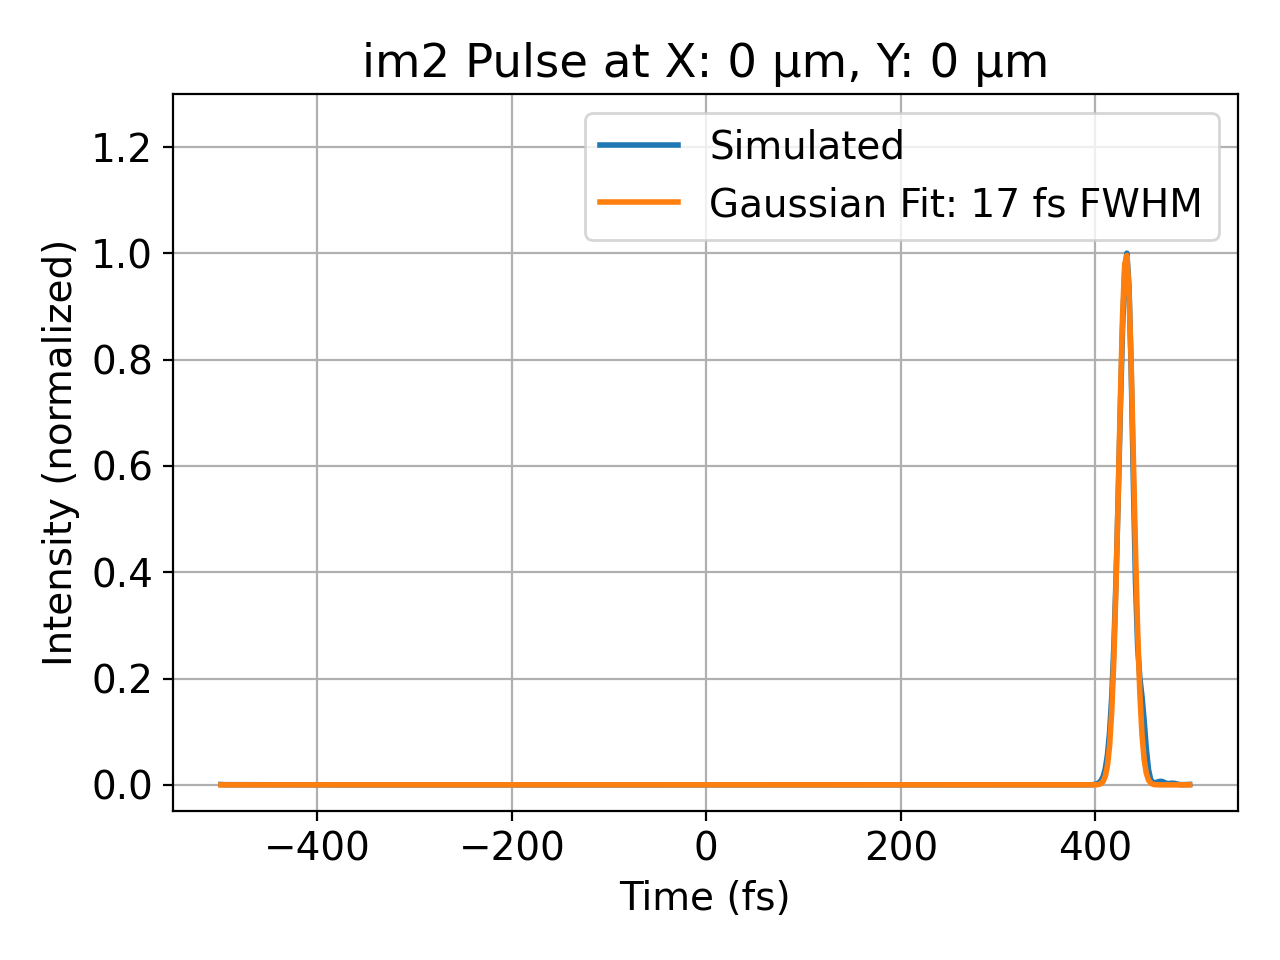

<IPython.core.display.Javascript object>


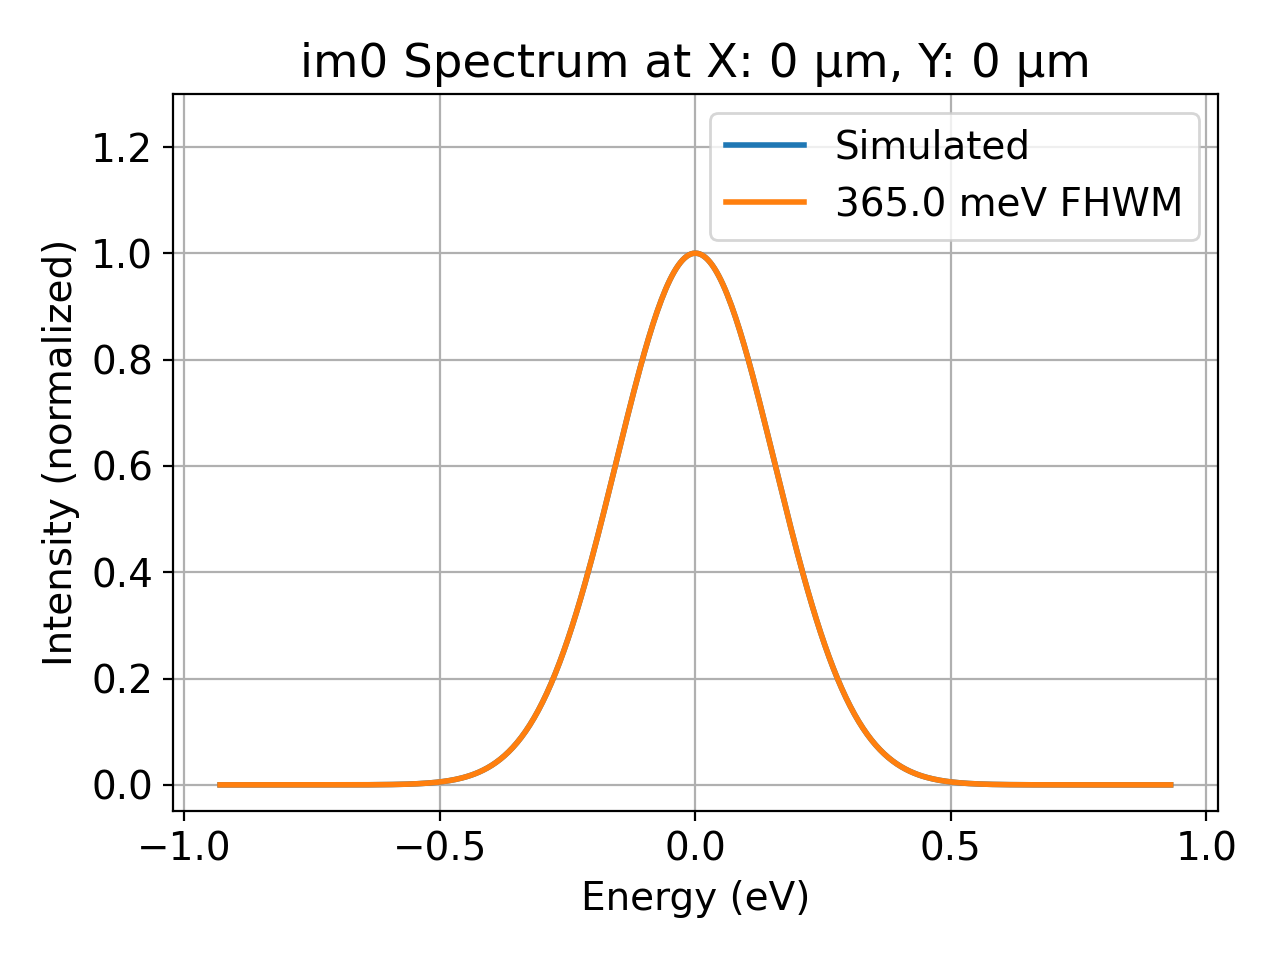

<IPython.core.display.Javascript object>


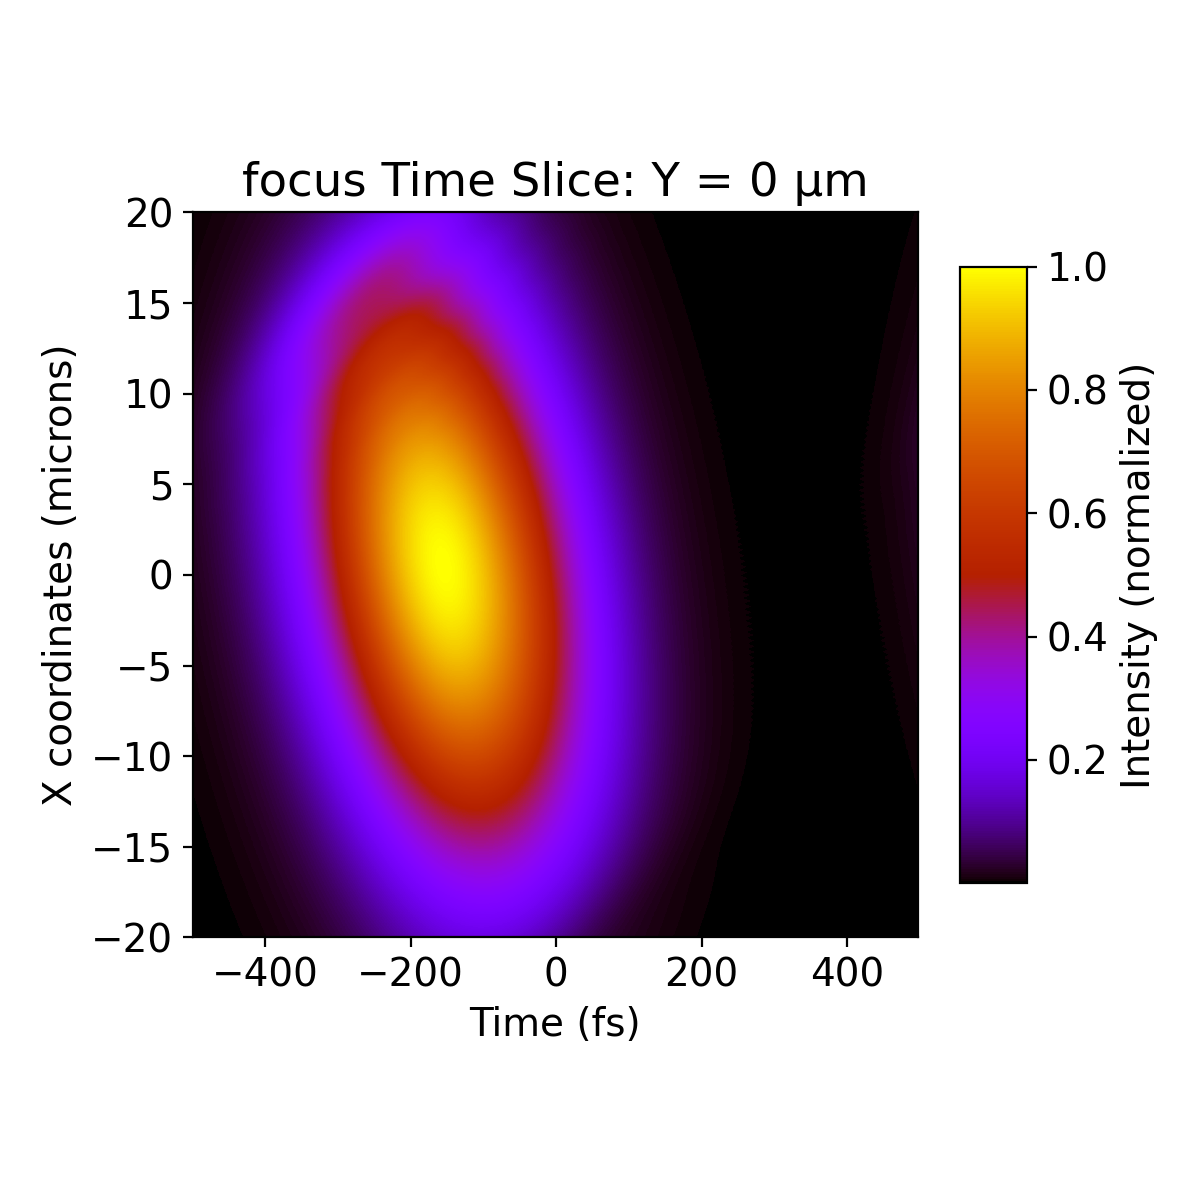

128


<IPython.core.display.Javascript object>


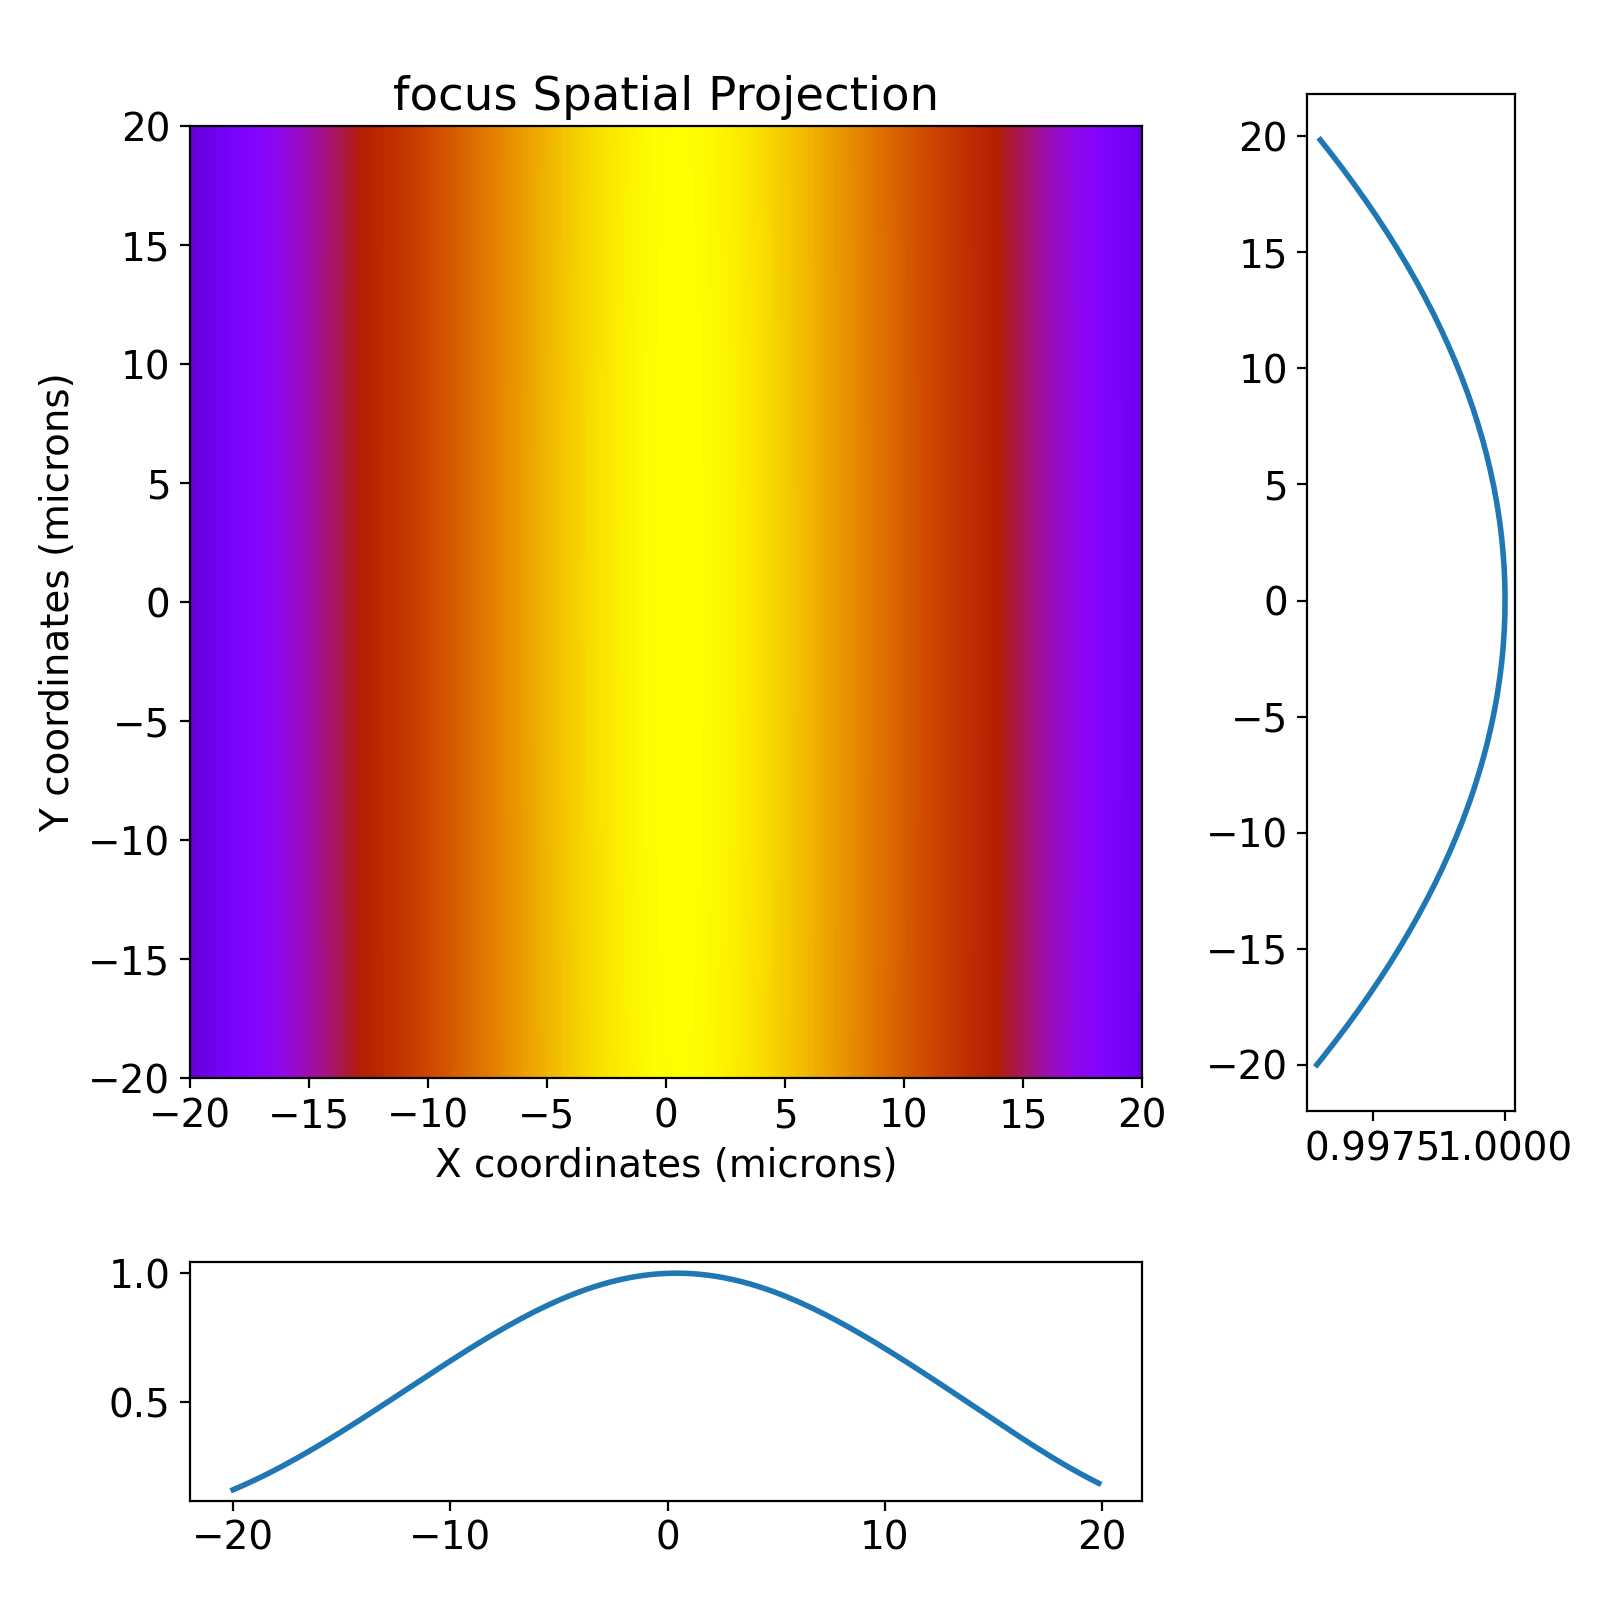

<IPython.core.display.Javascript object>


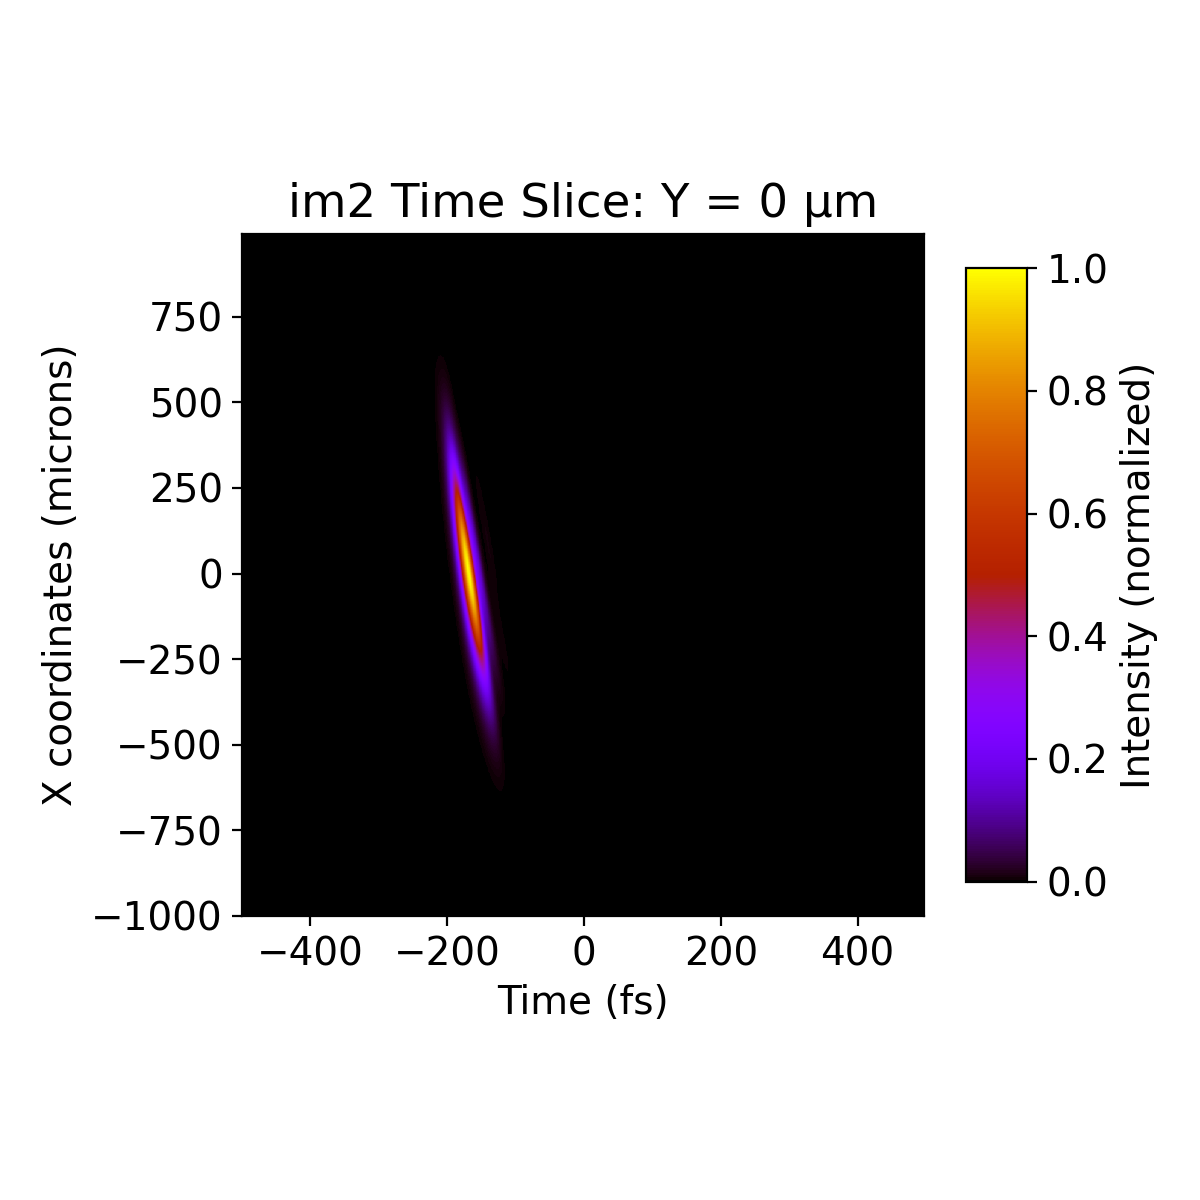

128


<IPython.core.display.Javascript object>


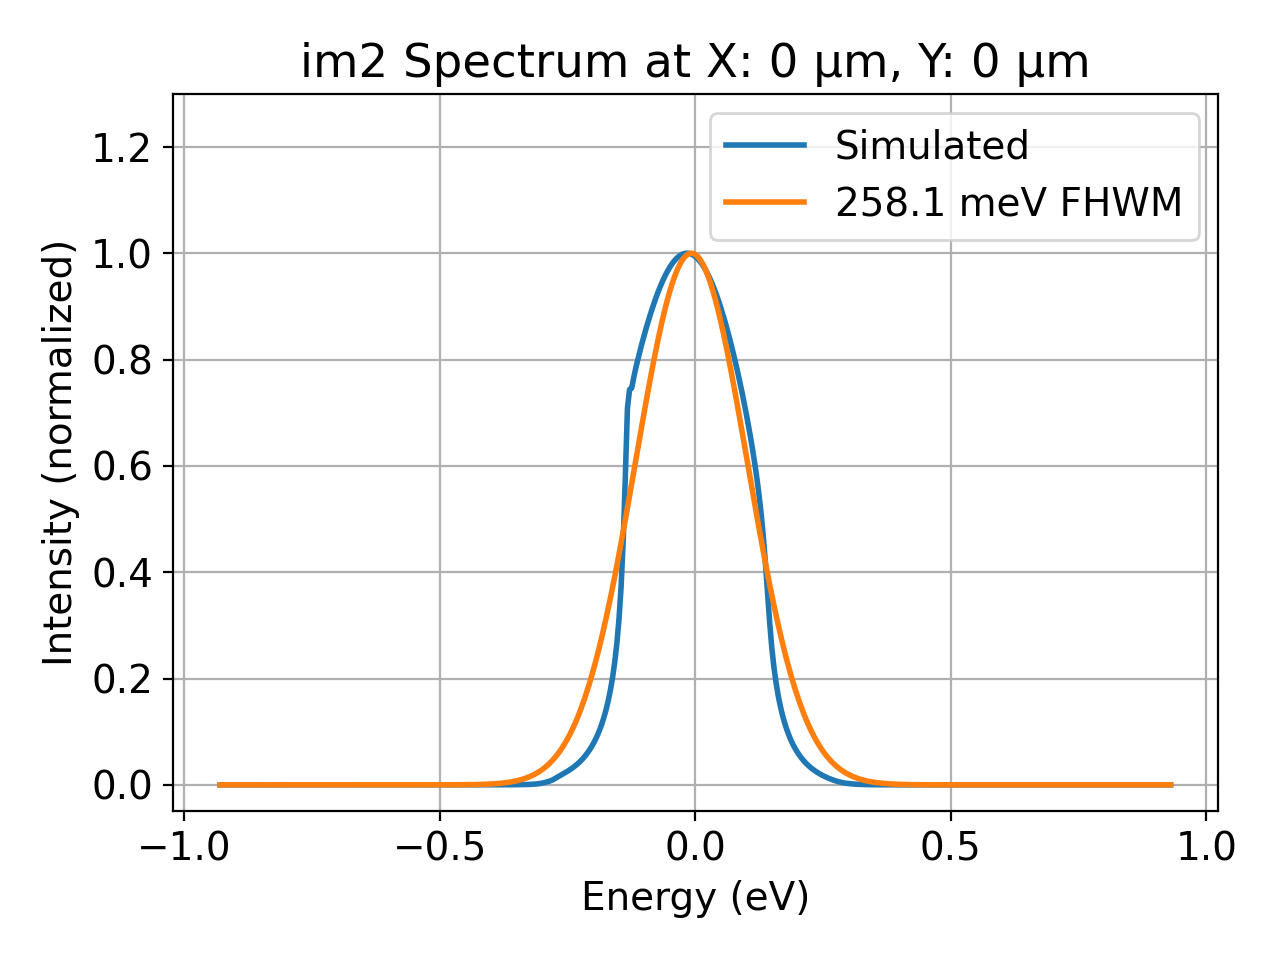

<IPython.core.display.Javascript object>


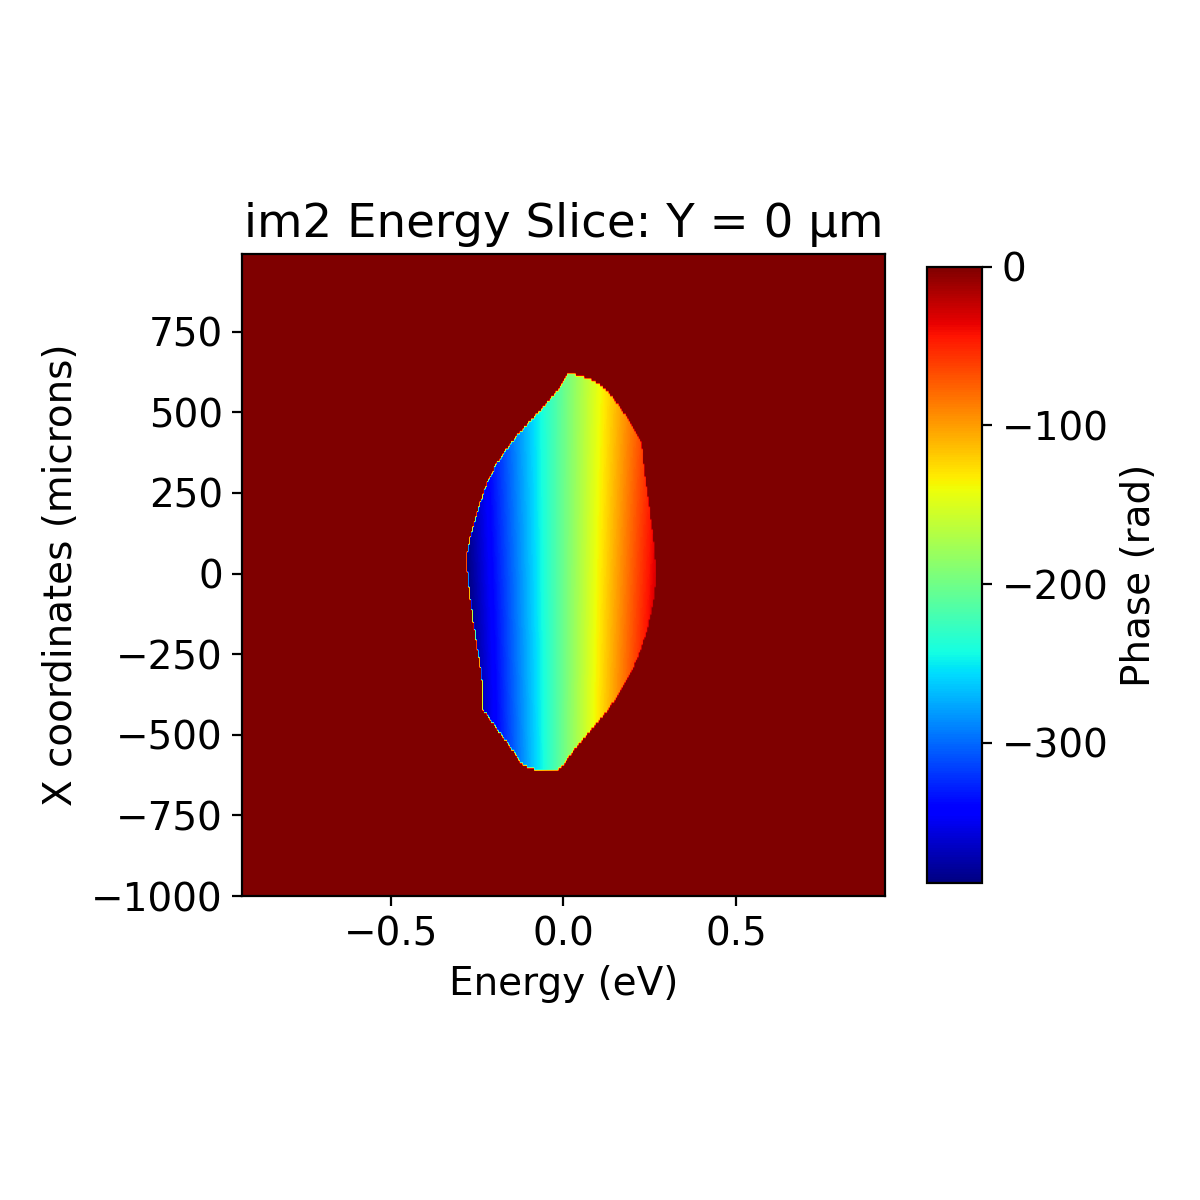

<IPython.core.display.Javascript object>


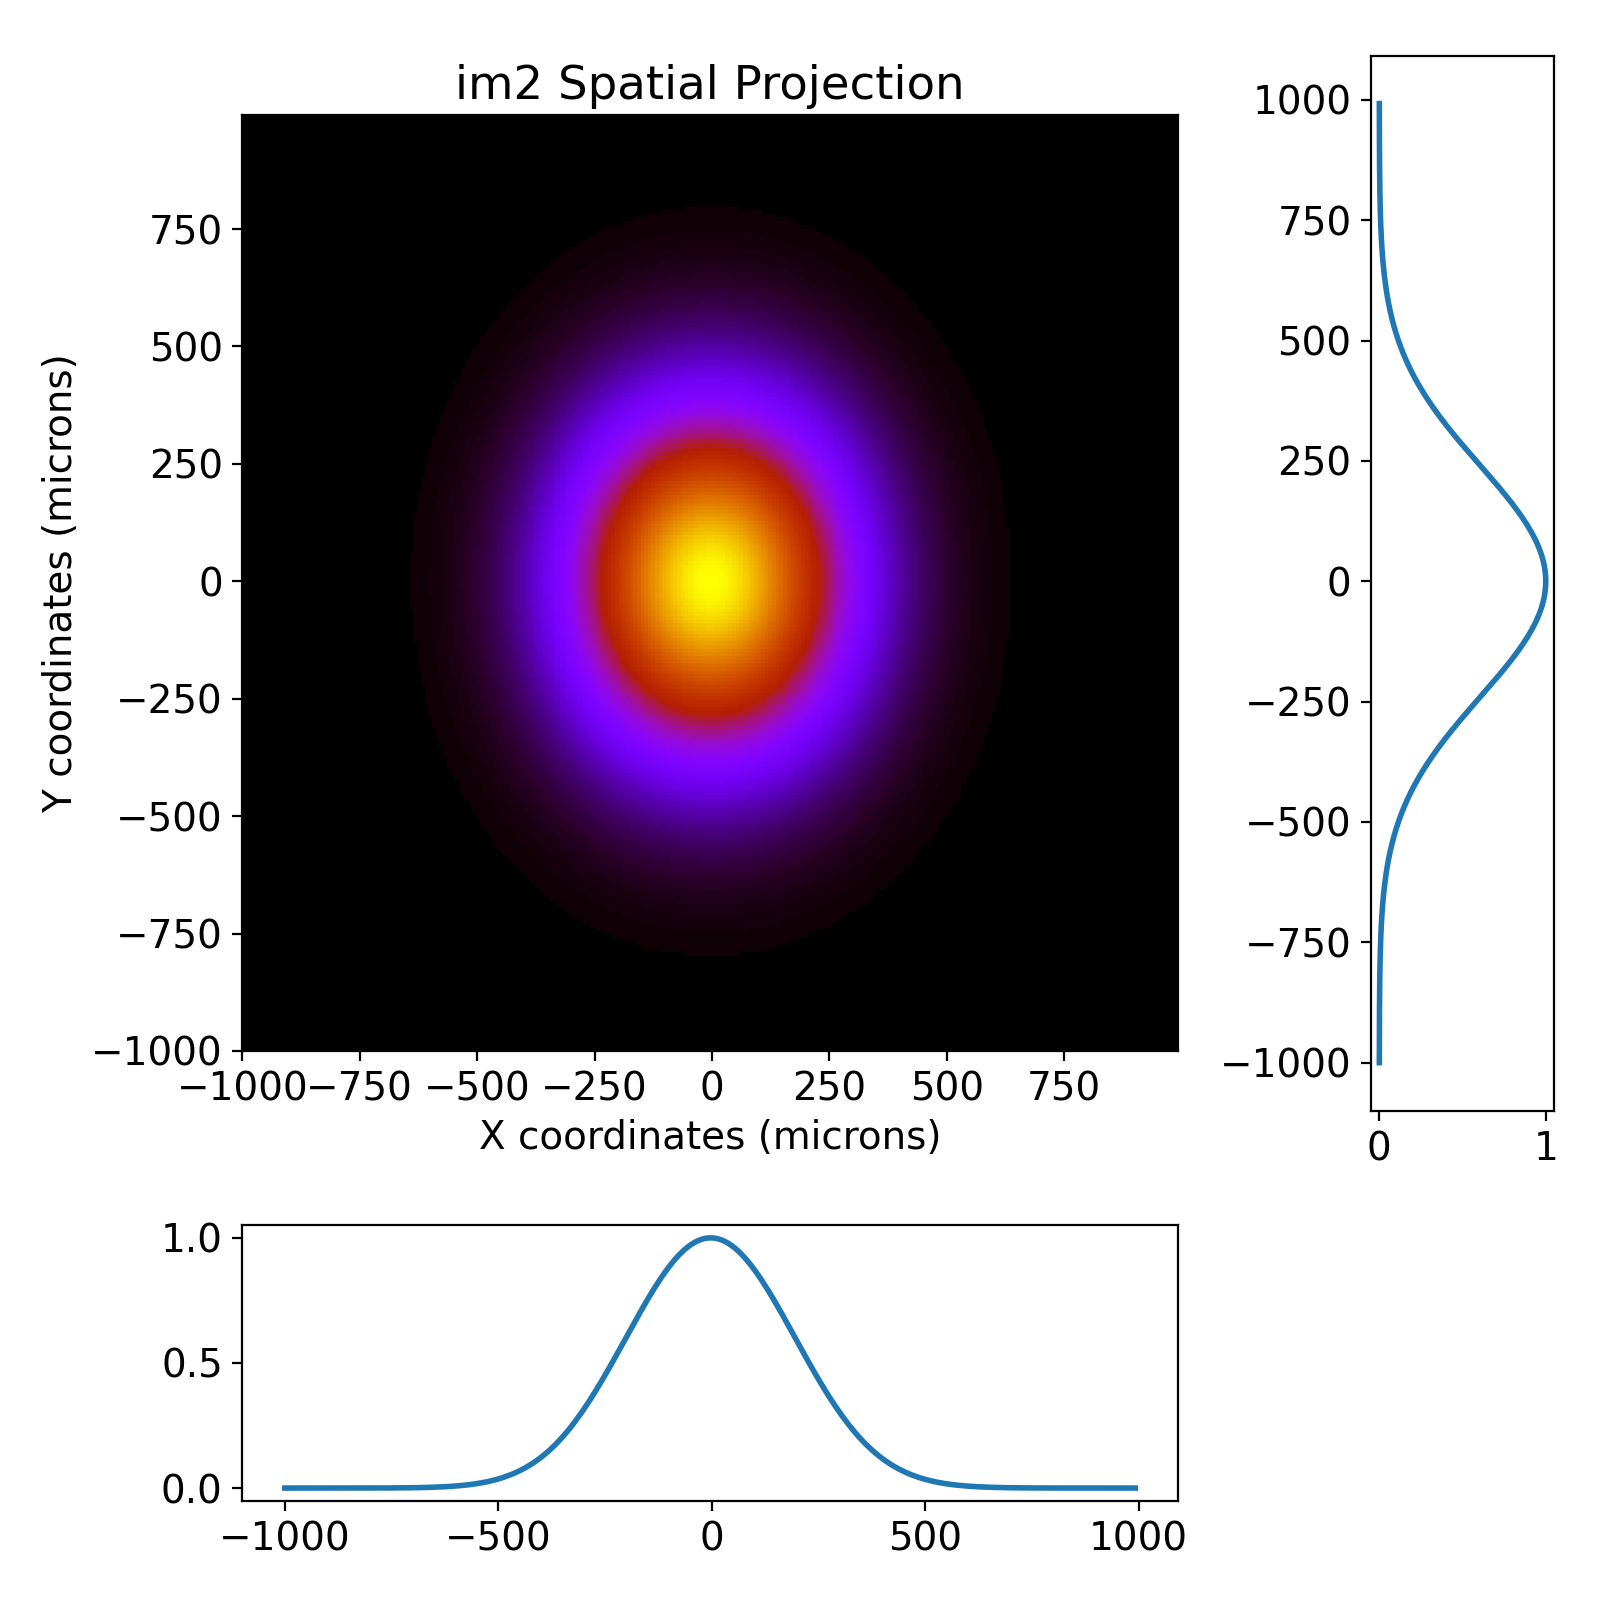

(<matplotlib.axes._subplots.AxesSubplot at 0x1af4036d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1af432d30>)

In [215]:
pulse_test.plot_pulse('im2')
pulse_test.plot_spectrum('im0')
# pulse_test.plot_spectrum('im1')
# pulse_test.imshow_energy_slice('im1')
pulse_test.imshow_time_slice('focus')
pulse_test.imshow_projection('focus')
pulse_test.imshow_time_slice('im2', shift=400)
pulse_test.plot_spectrum('im2')
pulse_test.imshow_energy_slice('im2',image_type='phase')
pulse_test.imshow_projection('im2')

In [13]:
1/20

0.05

In [80]:
devices = [im0,crystal1,crystal2,im1, crl1, focus, crl2, crystal3, crystal4, im2]
# devices = [crystal1,crystal2,im1, m1, focus, m2,crystal3, crystal4, im2]
# devices = devices + crl_list

mono_beamline = beamline.Beamline(devices)

beam_params['photonEnergy'] = 9000

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=1000)

pulse_test.propagate(beamline=mono_beamline, screen_names=['focus','im2'])

after c1: 0.44
after c2: -0.00
after c3: -0.44
after c4: -0.00
FWHM in x: 551.9970745186541 microns
FWHM in y: 551.9970745186541 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129893362597122
5.129893362597122
FWHM in x: 551.9970745186539 microns
FWHM in y: 551.9970745186539 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129893362597122
5.129893362597122
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.984706
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.00
zx: 10.034706
zy: 160.160686
azimuth 0.02 mrad
im1
zx: 10.034706
zy: 160.160686
azimuth 0.02 mrad
drift4
delta z: -0.00
zx: 10.084706
zy: 160.210686
azimuth 0.02 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.2

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zRx: 2.28e+02
zRy: 4.72e+01
zx: -4879.775396
zy: 161.021150
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -4879.575184
zy: 161.221362
azimuth -0.03 mrad
im2
zx: -4879.575184
zy: 161.221362
azimuth -0.03 mrad
FWHM in x: 551.9960569343458 microns
FWHM in y: 551.9960569343458 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.12990282909912
5.12990282909912
FWHM in x: 551.9960569343458 microns
FWHM in y: 551.9960569343458 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.12990282909912
5.12990282909912
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.984991
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.034991
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.034991
zy: 160.160686
azimu

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.985420
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.035420
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.035420
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -0.00
zx: 10.085420
zy: 160.210686
azimuth 0.01 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299784
zy: 160.210686
azimuth -0.01 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000216
zy: 160.510686
azimuth -0.01 mrad
focus
zx: 0.000216
zy: 160.510686
azimuth -0.01 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300216
zy: 160.810686
azimuth -0.01 mrad
c2
zRx: 2.73e+03
zRy: 4.72e+01
focal length: 0.30
zx: -307.758045
zy

zx: 0.000215
zy: 160.510686
azimuth -0.01 mrad
focus
zx: 0.000215
zy: 160.510686
azimuth -0.01 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300215
zy: 160.810686
azimuth -0.01 mrad
c2
zRx: 2.79e+03
zRy: 4.72e+01
focal length: 0.30
zx: -310.712916
zy: 160.810686
azimuth -0.12 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -310.613030
zy: 160.910572
azimuth -0.12 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -310.613030
zy: 160.910572
azimuth -443.02 mrad
drift8
delta z: 0.47
zx: -310.502440
zy: 161.021163
azimuth -443.02 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -4980.899079
zy: 161.021163
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -4980.698880
zy: 161.221362
azimuth -0.03 mrad
im2
zx: -4980.698880
zy: 161.221362
azimuth -0.03 mrad
FWHM in x: 551.9927498112941 microns
FWHM in y: 551.9927498112941 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129933595230622
5.12993359523

zRx: 2.28e+02
zRy: 4.72e+01
zx: -5029.005827
zy: 161.021169
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -5028.805633
zy: 161.221363
azimuth -0.03 mrad
im2
zx: -5028.805633
zy: 161.221363
azimuth -0.03 mrad
FWHM in x: 551.9912234601945 microns
FWHM in y: 551.9912234601945 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129947794983623
5.129947794983623
FWHM in x: 551.9912234601944 microns
FWHM in y: 551.9912234601944 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129947794983623
5.129947794983623
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.986347
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.036347
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.036347
zy: 160.160686
a

zx: 0.000212
zy: 160.510686
azimuth -0.01 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300212
zy: 160.810686
azimuth -0.01 mrad
c2
zRx: 2.90e+03
zRy: 4.72e+01
focal length: 0.30
zx: -316.796392
zy: 160.810686
azimuth -0.12 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -316.696500
zy: 160.910579
azimuth -0.12 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -316.696500
zy: 160.910579
azimuth -443.03 mrad
drift8
delta z: 0.47
zx: -316.585903
zy: 161.021175
azimuth -443.03 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -5078.055423
zy: 161.021175
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -5077.855235
zy: 161.221363
azimuth -0.03 mrad
im2
zx: -5077.855235
zy: 161.221363
azimuth -0.03 mrad
FWHM in x: 551.9896971175496 microns
FWHM in y: 551.9896971175496 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129961994736623
5.129961994736623
FWHM in x: 551.9896971175494 microns
FWHM in y: 

zx: 10.037204
zy: 160.160686
azimuth 0.00 mrad
im1
zx: 10.037204
zy: 160.160686
azimuth 0.00 mrad
drift4
delta z: -0.00
zx: 10.087204
zy: 160.210686
azimuth 0.00 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299789
zy: 160.210686
azimuth -0.02 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000211
zy: 160.510686
azimuth -0.02 mrad
focus
zx: 0.000211
zy: 160.510686
azimuth -0.02 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300211
zy: 160.810686
azimuth -0.02 mrad
c2
zRx: 2.96e+03
zRy: 4.72e+01
focal length: 0.30
zx: -320.456480
zy: 160.810686
azimuth -0.11 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -320.356584
zy: 160.910583
azimuth -0.11 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -320.356584
zy: 160.910583
azimuth -443.03 mrad
drift8
delta z: 0.47
zx: -320.245984
zy: 161.021182
az

FWHM in x: 551.9863900708204 microns
FWHM in y: 551.9863900708204 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129992760868125
5.129992760868125
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.987703
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.037703
zy: 160.160686
azimuth 0.00 mrad
im1
zx: 10.037703
zy: 160.160686
azimuth 0.00 mrad
drift4
delta z: -0.00
zx: 10.087703
zy: 160.210686
azimuth 0.00 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299790
zy: 160.210686
azimuth -0.02 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000210
zy: 160.510686
azimuth -0.02 mrad
focus
zx: 0.00021

zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -327.383410
zy: 160.910590
azimuth -443.03 mrad
drift8
delta z: 0.47
zx: -327.272804
zy: 161.021196
azimuth -443.03 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -5248.731421
zy: 161.021196
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -5248.531252
zy: 161.221364
azimuth -0.03 mrad
im2
zx: -5248.531252
zy: 161.221364
azimuth -0.03 mrad
FWHM in x: 551.9846093697897 microns
FWHM in y: 551.9846093697897 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130009327246625
5.130009327246625
FWHM in x: 551.9846093697896 microns
FWHM in y: 551.9846093697896 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130009327246625
5.130009327246625
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
z

x remains focused
y stays unfocused
zx: -330.731662
zy: 160.910593
azimuth -0.11 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -330.731662
zy: 160.910593
azimuth -443.03 mrad
drift8
delta z: 0.47
zx: -330.621054
zy: 161.021202
azimuth -443.03 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -5302.204948
zy: 161.021202
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -5302.004785
zy: 161.221365
azimuth -0.03 mrad
im2
zx: -5302.004785
zy: 161.221365
azimuth -0.03 mrad
FWHM in x: 551.9830830637785 microns
FWHM in y: 551.9830830637785 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130023526999626
5.130023526999626
FWHM in x: 551.9830830637785 microns
FWHM in y: 551.9830830637785 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130023526999626
5.130023526999626
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimut

zx: 0.000206
zy: 160.510686
azimuth -0.02 mrad
focus
zx: 0.000206
zy: 160.510686
azimuth -0.02 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300206
zy: 160.810686
azimuth -0.02 mrad
c2
zRx: 3.23e+03
zRy: 4.72e+01
focal length: 0.30
zx: -334.825530
zy: 160.810686
azimuth -0.11 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -334.725619
zy: 160.910597
azimuth -0.11 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -334.725619
zy: 160.910597
azimuth -443.04 mrad
drift8
delta z: 0.47
zx: -334.615007
zy: 161.021209
azimuth -443.04 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -5365.990777
zy: 161.021209
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -5365.790621
zy: 161.221365
azimuth -0.03 mrad
im2
zx: -5365.790621
zy: 161.221365
azimuth -0.03 mrad
FWHM in x: 551.9813023841172 microns
FWHM in y: 551.9813023841172 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130040093378126
5.13004009337

zx: 10.039559
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: 0.00
zx: 10.089559
zy: 160.210686
azimuth -0.01 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299796
zy: 160.210686
azimuth -0.02 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000204
zy: 160.510686
azimuth -0.02 mrad
focus
zx: 0.000204
zy: 160.510686
azimuth -0.02 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300204
zy: 160.810686
azimuth -0.02 mrad
c2
zRx: 3.31e+03
zRy: 4.72e+01
focal length: 0.30
zx: -338.917196
zy: 160.810686
azimuth -0.10 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -338.817281
zy: 160.910601
azimuth -0.10 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -338.817281
zy: 160.910601
azimuth -443.04 mrad
drift8
delta z: 0.47
zx: -338.706666
zy: 161.021216
azimuth -443.04 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01


zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.990058
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.040058
zy: 160.160686
azimuth -0.01 mrad
im1
zx: 10.040058
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: 0.00
zx: 10.090058
zy: 160.210686
azimuth -0.01 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299797
zy: 160.210686
azimuth -0.02 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000203
zy: 160.510686
azimuth -0.02 mrad
focus
zx: 0.000203
zy: 160.510686
azimuth -0.02 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300203
zy: 160.810686
azimuth -0.02 mrad
c2
zRx: 3.40e+03
zRy: 4.72e+01

zx: 0.300202
zy: 160.810686
azimuth -0.03 mrad
c2
zRx: 3.47e+03
zRy: 4.72e+01
focal length: 0.30
zx: -346.787735
zy: 160.810686
azimuth -0.10 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -346.687814
zy: 160.910608
azimuth -0.10 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -346.687814
zy: 160.910608
azimuth -443.04 mrad
drift8
delta z: 0.47
zx: -346.577192
zy: 161.021229
azimuth -443.04 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -5557.034182
zy: 161.021229
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -5556.834045
zy: 161.221366
azimuth -0.03 mrad
im2
zx: -5556.834045
zy: 161.221366
azimuth -0.03 mrad
FWHM in x: 551.9762147913448 microns
FWHM in y: 551.9762147913448 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130087425888127
5.130087425888127
FWHM in x: 551.9762147913447 microns
FWHM in y: 551.9762147913447 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130087425888127
5.

zx: -5616.840363
zy: 161.221367
azimuth -0.03 mrad
FWHM in x: 551.9746885318291 microns
FWHM in y: 551.9746885318291 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130101625641128
5.130101625641128
FWHM in x: 551.9746885318291 microns
FWHM in y: 551.9746885318291 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130101625641128
5.130101625641128
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.990986
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.040986
zy: 160.160686
azimuth -0.01 mrad
im1
zx: 10.040986
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: 0.00
zx: 10.090986
zy: 160.210686
azimuth -0.01 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299800
zy: 

zx: 0.300199
zy: 160.810686
azimuth -0.03 mrad
c2
zRx: 3.64e+03
zRy: 4.72e+01
focal length: 0.30
zx: -355.032865
zy: 160.810686
azimuth -0.09 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -354.932936
zy: 160.910615
azimuth -0.09 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -354.932936
zy: 160.910615
azimuth -443.05 mrad
drift8
delta z: 0.47
zx: -354.822308
zy: 161.021242
azimuth -443.05 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -5688.713850
zy: 161.021242
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -5688.513725
zy: 161.221367
azimuth -0.03 mrad
im2
zx: -5688.513725
zy: 161.221367
azimuth -0.03 mrad
FWHM in x: 551.9729079064118 microns
FWHM in y: 551.9729079064118 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130118192019629
5.130118192019629
FWHM in x: 551.9729079064117 microns
FWHM in y: 551.9729079064117 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130118192019629
5.

zx: 10.041914
zy: 160.160686
azimuth -0.02 mrad
drift4
delta z: 0.00
zx: 10.091914
zy: 160.210686
azimuth -0.02 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299802
zy: 160.210686
azimuth -0.03 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000198
zy: 160.510686
azimuth -0.03 mrad
focus
zx: 0.000198
zy: 160.510686
azimuth -0.03 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300198
zy: 160.810686
azimuth -0.03 mrad
c2
zRx: 3.73e+03
zRy: 4.72e+01
focal length: 0.30
zx: -359.637200
zy: 160.810686
azimuth -0.09 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -359.537267
zy: 160.910619
azimuth -0.09 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -359.537267
zy: 160.910619
azimuth -443.05 mrad
drift8
delta z: 0.47
zx: -359.426636
zy: 161.021250
azimuth -443.05 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01


zx: -5826.613445
zy: 161.221368
azimuth -0.03 mrad
im2
zx: -5826.613445
zy: 161.221368
azimuth -0.03 mrad
FWHM in x: 551.969601061163 microns
FWHM in y: 551.969601061163 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130148958151128
5.130148958151128
FWHM in x: 551.9696010611628 microns
FWHM in y: 551.9696010611628 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130148958151128
5.130148958151128
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.992413
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.042413
zy: 160.160686
azimuth -0.02 mrad
im1
zx: 10.042413
zy: 160.160686
azimuth -0.02 mrad
drift4
delta z: 0.00
zx: 10.092413
zy: 160.210686
azimuth -0.02 mrad
c1
zRx: 2.60e-0

zx: 0.000195
zy: 160.510686
azimuth -0.03 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300195
zy: 160.810686
azimuth -0.03 mrad
c2
zRx: 3.92e+03
zRy: 4.72e+01
focal length: 0.30
zx: -368.513059
zy: 160.810686
azimuth -0.09 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -368.413119
zy: 160.910626
azimuth -0.09 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -368.413119
zy: 160.910626
azimuth -443.05 mrad
drift8
delta z: 0.47
zx: -368.302482
zy: 161.021263
azimuth -443.05 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -5904.000862
zy: 161.021263
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -5903.800756
zy: 161.221368
azimuth -0.03 mrad
im2
zx: -5903.800756
zy: 161.221368
azimuth -0.03 mrad
FWHM in x: 551.9678204686197 microns
FWHM in y: 551.9678204686197 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130165524529629
5.130165524529629
FWHM in x: 551.9678204686197 microns
FWHM in y: 

zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.993341
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.043341
zy: 160.160686
azimuth -0.02 mrad
im1
zx: 10.043341
zy: 160.160686
azimuth -0.02 mrad
drift4
delta z: 0.00
zx: 10.093341
zy: 160.210686
azimuth -0.02 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299807
zy: 160.210686
azimuth -0.03 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000193
zy: 160.510686
azimuth -0.03 mrad
focus
zx: 0.000193
zy: 160.510686
azimuth -0.03 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300193
zy: 160.810686
azimuth -0.03 mrad
c2
zRx: 4.02e+03
zRy: 4.72e+01
focal length: 0.30
zx: -373.476439
zy: 160.810686
azimuth -0.09 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -373.376495
zy: 160.910630
azimuth -0.09 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -373.376495
zy: 160.910630
azimuth -443.

zx: 0.300192
zy: 160.810686
azimuth -0.03 mrad
c2
zRx: 4.12e+03
zRy: 4.72e+01
focal length: 0.30
zx: -377.838513
zy: 160.810686
azimuth -0.08 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -377.738566
zy: 160.910633
azimuth -0.08 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -377.738566
zy: 160.910633
azimuth -443.06 mrad
drift8
delta z: 0.47
zx: -377.627923
zy: 161.021276
azimuth -443.06 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -6052.934275
zy: 161.021276
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -6052.734182
zy: 161.221369
azimuth -0.03 mrad
im2
zx: -6052.734182
zy: 161.221369
azimuth -0.03 mrad
FWHM in x: 551.9645136844216 microns
FWHM in y: 551.9645136844216 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130196290661131
5.130196290661131
FWHM in x: 551.9645136844215 microns
FWHM in y: 551.9645136844215 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130196290661131
5.

zx: 10.094197
zy: 160.210686
azimuth -0.03 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299809
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000191
zy: 160.510686
azimuth -0.04 mrad
focus
Some problem with input
zx: 0.000191
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300191
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 4.22e+03
zRy: 4.72e+01
focal length: 0.30
zx: -382.303774
zy: 160.810686
azimuth -0.08 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -382.203823
zy: 160.910636
azimuth -0.08 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -382.203823
zy: 160.910636
azimuth -443.06 mrad
drift8
delta z: 0.47
zx: -382.093177
zy: 161.021282
azimuth -443.06 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -6124.247347
zy: 161.021282
azimuth -0.03

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.994697
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.044697
zy: 160.160686
azimuth -0.03 mrad
im1
zx: 10.044697
zy: 160.160686
azimuth -0.03 mrad
drift4
delta z: 0.00
zx: 10.094697
zy: 160.210686
azimuth -0.03 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299810
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000190
zy: 160.510686
azimuth -0.04 mrad
focus
zx: 0.000190
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300190
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 4.33e+03
zRy: 4.72e+01
focal length: 0.30
zx: -387.648612
zy: 160.810686
azimuth -0.08 mrad

zx: -6284.498304
zy: 161.221370
azimuth -0.03 mrad
im2
zx: -6284.498304
zy: 161.221370
azimuth -0.03 mrad
FWHM in x: 551.9596807635128 microns
FWHM in y: 551.9596807635128 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130241256545633
5.130241256545633
FWHM in x: 551.9596807635127 microns
FWHM in y: 551.9596807635127 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130241256545633
5.130241256545633
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.995196
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.045196
zy: 160.160686
azimuth -0.03 mrad
im1
zx: 10.045196
zy: 160.160686
azimuth -0.03 mrad
drift4
delta z: 0.00
zx: 10.095196
zy: 160.210686
azimuth -0.03 mrad
c1
zRx: 2.60e

zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -397.882182
zy: 160.910647
azimuth -443.06 mrad
drift8
delta z: 0.47
zx: -397.771527
zy: 161.021303
azimuth -443.06 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -6374.641156
zy: 161.021303
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -6374.441088
zy: 161.221371
azimuth -0.03 mrad
im2
zx: -6374.441088
zy: 161.221371
azimuth -0.03 mrad
FWHM in x: 551.9579002350712 microns
FWHM in y: 551.9579002350712 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130257822924133
5.130257822924133
FWHM in x: 551.9579002350712 microns
FWHM in y: 551.9579002350712 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130257822924133
5.130257822924133
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
z

zx: 10.096124
zy: 160.210686
azimuth -0.03 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299815
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000185
zy: 160.510686
azimuth -0.04 mrad
focus
zx: 0.000185
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300185
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 4.70e+03
zRy: 4.72e+01
focal length: 0.30
zx: -403.778055
zy: 160.810686
azimuth -0.07 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -403.678090
zy: 160.910651
azimuth -0.07 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -403.678090
zy: 160.910651
azimuth -443.07 mrad
drift8
delta z: 0.47
zx: -403.567431
zy: 161.021310
azimuth -443.07 mrad
c4
zRx: 2.28e+02
zRy: 4.72e+01
zx: -6467.205724
zy: 161.021310
azimuth -0.03 mrad
drift9
delta z: -0

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.996623
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.046623
zy: 160.160686
azimuth -0.04 mrad
im1
zx: 10.046623
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: 0.00
zx: 10.096623
zy: 160.210686
azimuth -0.04 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299816
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000184
zy: 160.510686
azimuth -0.04 mrad
focus
zx: 0.000184
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300184
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 4.84e+03
zRy: 4.72e+01
focal length: 0.30
zx: -409.745411
zy: 160.810686
azimuth -0.07 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -409.645442
zy: 160.910655
azimuth -0.07 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes u

im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.997051
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.047051
zy: 160.160686
azimuth -0.04 mrad
im1
zx: 10.047051
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: 0.00
zx: 10.097051
zy: 160.210686
azimuth -0.04 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299817
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000183
zy: 160.510686
azimuth -0.04 mrad
focus
zx: 0.000183
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300183
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 4.97e+03
zRy: 4.72

zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -420.296542
zy: 160.910661
azimuth -443.07 mrad
drift8
delta z: 0.47
zx: -420.185875
zy: 161.021329
azimuth -443.07 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -6732.613824
zy: 161.021329
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -6732.413781
zy: 161.221372
azimuth -0.03 mrad
im2
zx: -6732.413781
zy: 161.221372
azimuth -0.03 mrad
FWHM in x: 551.951286944444 microns
FWHM in y: 551.951286944444 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130319355187134
5.130319355187134
FWHM in x: 551.9512869444438 microns
FWHM in y: 551.9512869444438 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130319355187134
5.130319355187134
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx

zx: 10.097979
zy: 160.210686
azimuth -0.04 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299820
zy: 160.210686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000180
zy: 160.510686
azimuth -0.05 mrad
focus
zx: 0.000180
zy: 160.510686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300180
zy: 160.810686
azimuth -0.05 mrad
c2
zRx: 5.25e+03
zRy: 4.72e+01
focal length: 0.30
zx: -426.869520
zy: 160.810686
azimuth -0.07 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -426.769540
zy: 160.910665
azimuth -0.07 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -426.769540
zy: 160.910665
azimuth -443.07 mrad
drift8
delta z: 0.47
zx: -426.658869
zy: 161.021336
azimuth -443.07 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -6835.992114
zy: 161.021336
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -6835.792077
zy: 161.221373


zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998479
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.048479
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.048479
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: 10.098479
zy: 160.210686
azimuth -0.05 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299821
zy: 160.210686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000179
zy: 160.510686
azimuth -0.05 mrad
focus
zx: 0.000179
zy: 160.510686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300179
zy: 160.810686
azimuth -0.05 mrad
c2
zRx: 5.42e+03
zRy: 4.72e+01
focal length: 0.30
zx: -433.545124
zy: 160.810686
azimuth -0.06 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -433.445141
zy: 160.910669
azimuth -0.06 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes u

zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299822
zy: 160.210686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000178
zy: 160.510686
azimuth -0.05 mrad
focus
zx: 0.000178
zy: 160.510686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300178
zy: 160.810686
azimuth -0.05 mrad
c2
zRx: 5.57e+03
zRy: 4.72e+01
focal length: 0.30
zx: -439.435635
zy: 160.810686
azimuth -0.06 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -439.335649
zy: 160.910672
azimuth -0.06 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -439.335649
zy: 160.910672
azimuth -443.08 mrad
drift8
delta z: 0.47
zx: -439.224972
zy: 161.021350
azimuth -443.08 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -7036.681722
zy: 161.021350
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -7036.481698
zy: 161.221373
azimuth -0.03 m

zRx: 2.27e+02
zRy: 4.72e+01
zx: -7133.350788
zy: 161.021356
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -7133.150770
zy: 161.221374
azimuth -0.03 mrad
im2
zx: -7133.150770
zy: 161.221374
azimuth -0.03 mrad
FWHM in x: 551.9446738125338 microns
FWHM in y: 551.9446738125338 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130380887450136
5.130380887450136
FWHM in x: 551.9446738125338 microns
FWHM in y: 551.9446738125338 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130380887450136
5.130380887450136
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.999406
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.049406
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.049406
zy: 160.160686


zx: 10.099834
zy: 160.210686
azimuth -0.05 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299825
zy: 160.210686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000175
zy: 160.510686
azimuth -0.05 mrad
focus
zx: 0.000175
zy: 160.510686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300175
zy: 160.810686
azimuth -0.05 mrad
c2
zRx: 5.91e+03
zRy: 4.72e+01
focal length: 0.30
zx: -452.764598
zy: 160.810686
azimuth -0.06 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -452.664604
zy: 160.910679
azimuth -0.06 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -452.664604
zy: 160.910679
azimuth -443.08 mrad
drift8
delta z: 0.47
zx: -452.553921
zy: 161.021363
azimuth -443.08 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -7249.554673
zy: 161.021363
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -7249.354661
zy: 161.221374


zx: 0.300174
zy: 160.810686
azimuth -0.05 mrad
c2
zRx: 6.05e+03
zRy: 4.72e+01
focal length: 0.30
zx: -458.109123
zy: 160.810686
azimuth -0.06 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -458.009127
zy: 160.910682
azimuth -0.06 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -458.009127
zy: 160.910682
azimuth -443.08 mrad
drift8
delta z: 0.47
zx: -457.898441
zy: 161.021368
azimuth -443.08 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -7334.910551
zy: 161.021368
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -7334.710545
zy: 161.221375
azimuth -0.03 mrad
im2
zx: -7334.710545
zy: 161.221375
azimuth -0.03 mrad
FWHM in x: 551.9416216513363 microns
FWHM in y: 551.9416216513363 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130409286956137
5.130409286956137
FWHM in x: 551.9416216513363 microns
FWHM in y: 551.9416216513363 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130409286956137
5.

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.000691
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: 10.100691
zy: 160.210686
azimuth -0.05 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299828
zy: 160.210686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000172
zy: 160.510686
azimuth -0.05 mrad
focus
zx: 0.000172
zy: 160.510686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300172
zy: 160.810686
azimuth -0.05 mrad
c2
zRx: 6.26e+03
zRy: 4.72e+01
focal length: 0.30
zx: -465.807145
zy: 160.810686
azimuth -0.05 mrad
drift7
delta z: 0.55
x becomes focused
y stays un

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000171
zy: 160.510686
azimuth -0.06 mrad
focus
zx: 0.000171
zy: 160.510686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300171
zy: 160.810686
azimuth -0.06 mrad
c2
zRx: 6.44e+03
zRy: 4.72e+01
focal length: 0.30
zx: -472.614517
zy: 160.810686
azimuth -0.05 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -472.514514
zy: 160.910689
azimuth -0.05 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -472.514514
zy: 160.910689
azimuth -443.09 mrad
drift8
delta z: 0.47
zx: -472.403822
zy: 161.021381
azimuth -443.09 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -7566.572140
zy: 161.021381
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -7566.372146
zy: 161.221375
azimuth -0.03 mrad
im2
zx: -7566.372146
zy: 161.221375
azimuth -0.03 mrad
FWHM in x: 551.9383151815236 microns
FWHM in y: 551.9383151815236 microns
FWHM Divergence (x)

zRx: 2.27e+02
zRy: 4.72e+01
zx: -7678.517781
zy: 161.021387
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -7678.317793
zy: 161.221376
azimuth -0.03 mrad
im2
zx: -7678.317793
zy: 161.221376
azimuth -0.03 mrad
FWHM in x: 551.9367891319151 microns
FWHM in y: 551.9367891319151 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130454252840639
5.130454252840639
FWHM in x: 551.936789131915 microns
FWHM in y: 551.936789131915 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130454252840639
5.130454252840639
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.001618
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.051618
zy: 160.160686
azimuth -0.06 mrad
im1
zx: 10.051618
zy: 160.160686
a

zx: 0.300169
zy: 160.810686
azimuth -0.06 mrad
c2
zRx: 6.87e+03
zRy: 4.72e+01
focal length: 0.30
zx: -488.069196
zy: 160.810686
azimuth -0.05 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -487.969186
zy: 160.910696
azimuth -0.05 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -487.969186
zy: 160.910696
azimuth -443.09 mrad
drift8
delta z: 0.47
zx: -487.858488
zy: 161.021394
azimuth -443.09 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -7813.394640
zy: 161.021394
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -7813.194658
zy: 161.221376
azimuth -0.03 mrad
im2
zx: -7813.194658
zy: 161.221376
azimuth -0.03 mrad
FWHM in x: 551.9350087513875 microns
FWHM in y: 551.9350087513875 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130470819219139
5.130470819219139
FWHM in x: 551.9350087513874 microns
FWHM in y: 551.9350087513874 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130470819219139
5.

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000167
zy: 160.510686
azimuth -0.06 mrad
focus
zx: 0.000167
zy: 160.510686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300167
zy: 160.810686
azimuth -0.06 mrad
c2
zRx: 7.12e+03
zRy: 4.72e+01
focal length: 0.30
zx: -496.817386
zy: 160.810686
azimuth -0.05 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -496.717372
zy: 160.910700
azimuth -0.05 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -496.717372
zy: 160.910700
azimuth -443.09 mrad
drift8
delta z: 0.47
zx: -496.606671
zy: 161.021401
azimuth -443.09 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -7953.109688
zy: 161.021401
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -7952.909713
zy: 161.221377
azimuth -0.03 mrad
im2
zx: -7952.909713
zy: 161.221377
azimuth -0.03 mrad
FWHM in x: 551.9332283823633 microns
FWHM in y: 551.9332283823633 microns
FWHM Divergence (x)

FWHM in x: 551.9317023609269 microns
FWHM in y: 551.9317023609269 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130501585350641
5.130501585350641
FWHM in x: 551.9317023609268 microns
FWHM in y: 551.9317023609268 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130501585350641
5.130501585350641
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.003045
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.053045
zy: 160.160686
azimuth -0.06 mrad
im1
zx: 10.053045
zy: 160.160686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: 10.103045
zy: 160.210686
azimuth -0.06 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299834
zy: 160.210686
azimuth -0.06 mrad
drift5
delta z: 0.00

zx: -513.714528
zy: 161.021415
azimuth -443.10 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -8226.335101
zy: 161.021415
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -8226.135139
zy: 161.221377
azimuth -0.03 mrad
im2
zx: -8226.135139
zy: 161.221377
azimuth -0.03 mrad
FWHM in x: 551.9299220132664 microns
FWHM in y: 551.9299220132664 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130518151729141
5.130518151729141
FWHM in x: 551.9299220132663 microns
FWHM in y: 551.9299220132663 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130518151729141
5.130518151729141
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.003545
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.053545
zy: 160.160

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.003973
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.053973
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.053973
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: 0.00
zx: 10.103973
zy: 160.210686
azimuth -0.07 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299837
zy: 160.210686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000163
zy: 160.510686
azimuth -0.06 mrad
focus
zx: 0.000163
zy: 160.510686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300163
zy: 160.810686
azimuth -0.06 mrad
c2
zRx: 7.90e+03
zRy: 4.72e+01
focal length: 0.30
zx: -523.634740

zx: 10.054401
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.054401
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: 0.00
zx: 10.104401
zy: 160.210686
azimuth -0.07 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299838
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000162
zy: 160.510686
azimuth -0.07 mrad
focus
zx: 0.000162
zy: 160.510686
azimuth -0.07 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300162
zy: 160.810686
azimuth -0.07 mrad
c2
zRx: 8.17e+03
zRy: 4.72e+01
focal length: 0.30
zx: -532.254148
zy: 160.810686
azimuth -0.04 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -532.154119
zy: 160.910714
azimuth -0.04 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -532.154119
zy: 160.910714
azimuth -443.10 mrad
drift8
delta z: 0.47
zx: -532.043406
zy: 161.021428
azimuth -443.10 mrad
c4
zRx: 2.27e+0

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.004900
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.054900
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.054900
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: 0.00
zx: 10.104900
zy: 160.210686
azimuth -0.07 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299840
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000160
zy: 160.510686
azimuth -0.07 mrad
focus
zx: 0.000160
zy: 160.510686
azimuth -0.07 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300160
zy: 160.810686
azimuth -0.07 mrad
c2
zRx: 8.49e+03
zRy: 4.72e+01
focal length: 0.30
zx: -542.676011
zy: 160.810686
azimuth -0.04 mrad
drift7
delta z: 0.55
x becomes foc

zRx: 2.27e+02
zRy: 4.72e+01
zx: -8833.453235
zy: 161.021441
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -8833.253297
zy: 161.221379
azimuth -0.03 mrad
im2
zx: -8833.253297
zy: 161.221379
azimuth -0.03 mrad
FWHM in x: 551.9233093940961 microns
FWHM in y: 551.9233093940961 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130579683992142
5.130579683992142
FWHM in x: 551.923309394096 microns
FWHM in y: 551.923309394096 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130579683992142
5.130579683992142
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.005400
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.055400
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.055400
zy: 160.160686
a

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.005828
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.055828
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.055828
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: 0.00
zx: 10.105828
zy: 160.210686
azimuth -0.08 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299842
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000158
zy: 160.510686
azimuth -0.07 mrad
focus
zx: 0.000158
zy: 160.510686
azimuth -0.07 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300158
zy: 160.810686
azimuth -0.07 mrad
c2
zRx: 9.14e+03
zRy: 4.72e+01
focal length: 0.30
zx: -563.155240
zy: 160.810686
azimuth -0.03 mrad
drift7
delta z: 0.55
x becomes focused
y stays un

zx: 10.056256
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: 0.00
zx: 10.106256
zy: 160.210686
azimuth -0.08 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299844
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000156
zy: 160.510686
azimuth -0.07 mrad
focus
zx: 0.000156
zy: 160.510686
azimuth -0.07 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300156
zy: 160.810686
azimuth -0.07 mrad
c2
zRx: 9.47e+03
zRy: 4.72e+01
focal length: 0.30
zx: -573.138060
zy: 160.810686
azimuth -0.03 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -573.038018
zy: 160.910729
azimuth -0.03 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -573.038018
zy: 160.910729
azimuth -443.11 mrad
drift8
delta z: 0.47
zx: -572.927292
zy: 161.021454
azimuth -443.11 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -9172.008681
zy: 161.021454
azim

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.006755
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.056755
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.056755
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: 0.00
zx: 10.106755
zy: 160.210686
azimuth -0.08 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299845
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000155
zy: 160.510686
azimuth -0.07 mrad
focus
zx: 0.000155
zy: 160.510686
azimuth -0.07 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300155
zy: 160.810686
azimuth -0.07 mrad
c2
zRx: 9.87e+03
zRy: 4.72e+01
focal length: 0.30
zx: -585.241705
zy: 160.810686
azimuth -0.03 mra

zx: -595.820089
zy: 161.021468
azimuth -443.11 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -9537.624667
zy: 161.021468
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -9537.424754
zy: 161.221380
azimuth -0.03 mrad
im2
zx: -9537.424754
zy: 161.221380
azimuth -0.03 mrad
FWHM in x: 551.9166969336188 microns
FWHM in y: 551.9166969336188 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130641216255144
5.130641216255144
FWHM in x: 551.9166969336187 microns
FWHM in y: 551.9166969336187 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130641216255144
5.130641216255144
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.007255
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.057255
zy: 160.160

zx: 10.107683
zy: 160.210686
azimuth -0.09 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299848
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000152
zy: 160.510686
azimuth -0.07 mrad
focus
zx: 0.000152
zy: 160.510686
azimuth -0.07 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300152
zy: 160.810686
azimuth -0.07 mrad
c2
zRx: 1.07e+04
zRy: 4.72e+01
focal length: 0.30
zx: -609.132341
zy: 160.810686
azimuth -0.02 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -609.032288
zy: 160.910740
azimuth -0.02 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -609.032288
zy: 160.910740
azimuth -443.12 mrad
drift8
delta z: 0.47
zx: -608.921552
zy: 161.021475
azimuth -443.12 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -9746.865409
zy: 161.021475
azimuth -0.03 mrad
drift9
delta z: -0

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.008182
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.058182
zy: 160.160686
azimuth -0.09 mrad
im1
zx: 10.058182
zy: 160.160686
azimuth -0.09 mrad
drift4
delta z: 0.00
zx: 10.108182
zy: 160.210686
azimuth -0.09 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299849
zy: 160.210686
azimuth -0.08 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000151
zy: 160.510686
azimuth -0.08 mrad
focus
zx: 0.000151
zy: 160.510686
azimuth -0.08 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300151
zy: 160.810686
azimuth -0.08 mrad
c2
zRx: 1.12e+04
zRy: 4.72e+01
focal length: 0.30
zx: -622.823041
zy: 160.810686
azimuth -0.02 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -622.722983
zy: 160.910743
azimuth -0.02 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes 

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -634.957567
zy: 160.910747
azimuth -0.02 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -634.957567
zy: 160.910747
azimuth -443.12 mrad
drift8
delta z: 0.47
zx: -634.846825
zy: 161.021488
azimuth -443.12 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -10160.912691
zy: 161.021488
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -10160.712797
zy: 161.221382
azimuth -0.03 mrad
im2
zx: -10160.712797
zy: 161.221382
azimuth -0.03 mrad
FWHM in x: 551.9116105335422 microns
FWHM in y: 551.9116105335422 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130688548765146
5.130688548765146
FWHM in x: 551.9116105335421 microns
FWHM in y: 551.9116105335421 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130688548765146
5.130688548765146
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+

x remains focused
y stays unfocused
zx: 0.000148
zy: 160.510686
azimuth -0.08 mrad
focus
zx: 0.000148
zy: 160.510686
azimuth -0.08 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300148
zy: 160.810686
azimuth -0.08 mrad
c2
zRx: 1.22e+04
zRy: 4.72e+01
focal length: 0.30
zx: -649.953386
zy: 160.810686
azimuth -0.02 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -649.853321
zy: 160.910751
azimuth -0.02 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -649.853321
zy: 160.910751
azimuth -443.12 mrad
drift8
delta z: 0.47
zx: -649.742577
zy: 161.021495
azimuth -443.12 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -10398.809793
zy: 161.021495
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -10398.609906
zy: 161.221382
azimuth -0.03 mrad
im2
zx: -10398.609906
zy: 161.221382
azimuth -0.03 mrad
FWHM in x: 551.9098303156984 microns
FWHM in y: 551.9098303156984 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.009609
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.059609
zy: 160.160686
azimuth -0.09 mrad
im1
zx: 10.059609
zy: 160.160686
azimuth -0.09 mrad
drift4
delta z: 0.00
zx: 10.109609
zy: 160.210686
azimuth -0.09 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299853
zy: 160.210686
azimuth -0.08 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000147
zy: 160.510686
azimuth -0.08 mrad
focus
zx: 0.000147
zy: 160.510686
azimuth -0.08 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300147
zy: 160.810686
azimuth -0.08 mrad
c2
zRx: 1.28e+04
zRy: 4.72e+01
focal length: 0.30
zx: -665.565067
zy: 160.810686
azimuth -0.02 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -665.464999
zy: 160.910754
azimuth -0.02 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes 

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.010109
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.060109
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.060109
zy: 160.160686
azimuth -0.10 mrad
drift4
delta z: 0.00
zx: 10.110109
zy: 160.210686
azimuth -0.10 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299855
zy: 160.210686
azimuth -0.08 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000145
zy: 160.510686
azimuth -0.08 mrad
focus
zx: 0.000145
zy: 160.510686
azimuth -0.08 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300145
zy: 160.810686
azimuth -0.08 mrad
c2
zRx: 1.34e+04
zRy: 4.72e+0

zx: -696.541783
zy: 160.910761
azimuth -443.13 mrad
drift8
delta z: 0.47
zx: -696.431029
zy: 161.021515
azimuth -443.13 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -11144.462142
zy: 161.021515
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -11144.262274
zy: 161.221383
azimuth -0.03 mrad
im2
zx: -11144.262274
zy: 161.221383
azimuth -0.03 mrad
FWHM in x: 551.90474404238 microns
FWHM in y: 551.90474404238 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130752447653647
5.130752447653647
FWHM in x: 551.9047440423798 microns
FWHM in y: 551.9047440423798 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130752447653647
5.130752447653647
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.010608
zy: 160.

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.011036
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.061036
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.061036
zy: 160.160686
azimuth -0.10 mrad
drift4
delta z: 0.00
zx: 10.111036
zy: 160.210686
azimuth -0.10 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299857
zy: 160.210686
azimuth -0.08 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000143
zy: 160.510686
azimuth -0.08 mrad
focus
zx: 0.000143
zy: 160.510686
azimuth -0.08 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300143
zy: 160.810686
azimuth -0.08 mrad
c2
zRx: 1.47e+04
zRy: 4.72e+01
focal length: 0.30
zx: -714.609154
zy: 160.810686
azimuth -0.01 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays un

zRx: 2.27e+02
zRy: 4.72e+01
zx: -11645.616860
zy: 161.021528
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -11645.417004
zy: 161.221384
azimuth -0.03 mrad
im2
zx: -11645.417004
zy: 161.221384
azimuth -0.03 mrad
FWHM in x: 551.9016923234568 microns
FWHM in y: 551.9016923234568 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130780847159649
5.130780847159649
FWHM in x: 551.9016923234567 microns
FWHM in y: 551.9016923234567 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130780847159649
5.130780847159649
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.011464
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.061464
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.061464
zy: 160.160

x remains focused
y stays unfocused
zx: -747.567166
zy: 160.910772
azimuth -0.01 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -747.567166
zy: 160.910772
azimuth -443.13 mrad
drift8
delta z: 0.47
zx: -747.456403
zy: 161.021535
azimuth -443.13 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -11959.379093
zy: 161.021535
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -11959.179243
zy: 161.221384
azimuth -0.03 mrad
im2
zx: -11959.179243
zy: 161.221384
azimuth -0.03 mrad
FWHM in x: 551.8999121696944 microns
FWHM in y: 551.8999121696944 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13079741353815
5.13079741353815
FWHM in x: 551.8999121696943 microns
FWHM in y: 551.8999121696943 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13079741353815
5.13079741353815
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth

zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.012391
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.062391
zy: 160.160686
azimuth -0.11 mrad
im1
zx: 10.062391
zy: 160.160686
azimuth -0.11 mrad
drift4
delta z: 0.00
zx: 10.112391
zy: 160.210686
azimuth -0.11 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299861
zy: 160.210686
azimuth -0.09 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000139
zy: 160.510686
azimuth -0.09 mrad
focus
zx: 0.000139
zy: 160.510686
azimuth -0.09 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300139
zy: 160.810686
azimuth -0.09 mrad
c2
zRx: 1.70e+04
zRy: 4.72e+01
focal length: 0.30
zx: -768.403419
zy: 160.810686
azimuth -0.00 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -768.303329
zy: 160.910776
azimuth -0.00 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -76

im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.012891
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.062891
zy: 160.160686
azimuth -0.11 mrad
im1
zx: 10.062891
zy: 160.160686
azimuth -0.11 mrad
drift4
delta z: 0.00
zx: 10.112891
zy: 160.210686
azimuth -0.11 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299863
zy: 160.210686
azimuth -0.09 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000137
zy: 160.510686
azimuth -0.09 mrad
focus
zx: 0.000137
zy: 160.510686
azimuth -0.09 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300137
zy: 160.810686
azimuth -0.09 mrad
c2
zRx: 1.80e+04
zRy: 4.72e+01
focal length: 0.30
zx: -790.32

x remains focused
y stays unfocused
zx: 0.000136
zy: 160.510686
azimuth -0.09 mrad
focus
zx: 0.000136
zy: 160.510686
azimuth -0.09 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300136
zy: 160.810686
azimuth -0.09 mrad
c2
zRx: 1.89e+04
zRy: 4.72e+01
focal length: 0.30
zx: -810.132144
zy: 160.810686
azimuth -0.00 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -810.032047
zy: 160.910783
azimuth -0.00 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -810.032047
zy: 160.910783
azimuth -443.14 mrad
drift8
delta z: 0.47
zx: -809.921275
zy: 161.021555
azimuth -443.14 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -12956.994696
zy: 161.021555
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -12956.794866
zy: 161.221386
azimuth -0.03 mrad
im2
zx: -12956.794866
zy: 161.221386
azimuth -0.03 mrad
FWHM in x: 551.8948260794624 microns
FWHM in y: 551.8948260794624 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.013818
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.063818
zy: 160.160686
azimuth -0.11 mrad
im1
zx: 10.063818
zy: 160.160686
azimuth -0.11 mrad
drift4
delta z: 0.00
zx: 10.113818
zy: 160.210686
azimuth -0.11 mrad
c1
zRx: 2.60e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299865
zy: 160.210686
azimuth -0.09 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000135
zy: 160.510686
azimuth -0.09 mrad
focus
zx: 0.000135
zy: 160.510686
azimuth -0.09 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300135
zy: 160.810686
azimuth -0.09 mrad
c2
zRx: 2.01e+04
zRy: 4.72e+01
focal length: 0.30
zx: -834.536055
zy: 160.810686
azimuth 0.00 mrad
drift7
delta z: 0.55
x becomes focused
y stays unf

x remains focused
y stays unfocused
zx: 0.000134
zy: 160.510686
azimuth -0.09 mrad
focus
zx: 0.000134
zy: 160.510686
azimuth -0.09 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300134
zy: 160.810686
azimuth -0.09 mrad
c2
zRx: 2.11e+04
zRy: 4.72e+01
focal length: 0.30
zx: -856.655382
zy: 160.810686
azimuth 0.00 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -856.555278
zy: 160.910790
azimuth 0.00 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -856.555278
zy: 160.910790
azimuth -443.15 mrad
drift8
delta z: 0.47
zx: -856.444500
zy: 161.021568
azimuth -443.15 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -13700.009324
zy: 161.021568
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -13699.809506
zy: 161.221386
azimuth -0.03 mrad
im2
zx: -13699.809506
zy: 161.221386
azimuth -0.03 mrad
FWHM in x: 551.8915201711584 microns
FWHM in y: 551.8915201711584 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5

zx: 0.300132
zy: 160.810686
azimuth -0.09 mrad
c2
zRx: 2.23e+04
zRy: 4.72e+01
focal length: 0.30
zx: -879.979633
zy: 160.810686
azimuth 0.01 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -879.879526
zy: 160.910793
azimuth 0.01 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -879.879526
zy: 160.910793
azimuth -443.15 mrad
drift8
delta z: 0.47
zx: -879.768745
zy: 161.021574
azimuth -443.15 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -14072.517027
zy: 161.021574
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -14072.317214
zy: 161.221387
azimuth -0.03 mrad
im2
zx: -14072.317214
zy: 161.221387
azimuth -0.03 mrad
FWHM in x: 551.8899943807046 microns
FWHM in y: 551.8899943807046 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130889711932651
5.130889711932651
FWHM in x: 551.8899943807044 microns
FWHM in y: 551.8899943807044 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130889711932651
5

FWHM in x: 551.8887228951139 microns
FWHM in y: 551.8887228951139 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130901545060152
5.130901545060152
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.015102
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.065102
zy: 160.160686
azimuth -0.12 mrad
im1
zx: 10.065102
zy: 160.160686
azimuth -0.12 mrad
drift4
delta z: 0.00
zx: 10.115102
zy: 160.210686
azimuth -0.12 mrad
c1
zRx: 2.59e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299869
zy: 160.210686
azimuth -0.10 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000131
zy: 160.510686
azimuth -0.10 mrad
focus
zx: 0.00

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -930.559304
zy: 160.910800
azimuth 0.01 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -930.559304
zy: 160.910800
azimuth -443.15 mrad
drift8
delta z: 0.47
zx: -930.448517
zy: 161.021587
azimuth -443.15 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -14881.915524
zy: 161.021587
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -14881.715723
zy: 161.221388
azimuth -0.03 mrad
im2
zx: -14881.715723
zy: 161.221388
azimuth -0.03 mrad
FWHM in x: 551.8869428251452 microns
FWHM in y: 551.8869428251452 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130918111438652
5.130918111438652
FWHM in x: 551.8869428251452 microns
FWHM in y: 551.8869428251452 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130918111438652
5.130918111438652
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+0

zx: 0.300129
zy: 160.810686
azimuth -0.10 mrad
c2
zRx: 2.65e+04
zRy: 4.72e+01
focal length: 0.30
zx: -958.254092
zy: 160.810686
azimuth 0.01 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -958.153975
zy: 160.910803
azimuth 0.01 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -958.153975
zy: 160.910803
azimuth -443.15 mrad
drift8
delta z: 0.47
zx: -958.043185
zy: 161.021593
azimuth -443.15 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -15322.625595
zy: 161.021593
azimuth -0.03 mrad
drift9
delta z: -0.96
zx: -15322.425800
zy: 161.221388
azimuth -0.03 mrad
im2
zx: -15322.425800
zy: 161.221388
azimuth -0.03 mrad
FWHM in x: 551.8854170600399 microns
FWHM in y: 551.8854170600399 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1309323111916525
5.1309323111916525
FWHM in x: 551.8854170600398 microns
FWHM in y: 551.8854170600398 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130932311191652

zx: 10.116458
zy: 160.210686
azimuth -0.12 mrad
c1
zRx: 2.59e-03
zRy: 4.72e+01
focal length: 0.29
zx: -0.299873
zy: 160.210686
azimuth -0.10 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000127
zy: 160.510686
azimuth -0.10 mrad
focus
zx: 0.000127
zy: 160.510686
azimuth -0.10 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300127
zy: 160.810686
azimuth -0.10 mrad
c2
zRx: 2.84e+04
zRy: 4.72e+01
focal length: 0.30
zx: -992.590950
zy: 160.810686
azimuth 0.01 mrad
drift7
delta z: 0.55
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -992.490829
zy: 160.910807
azimuth 0.01 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -992.490829
zy: 160.910807
azimuth -443.15 mrad
drift8
delta z: 0.47
zx: -992.380036
zy: 161.021600
azimuth -443.15 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -15871.014102
zy: 161.021600
azimuth -0.03 mrad
drift9
delta z: -0.

<IPython.core.display.Javascript object>


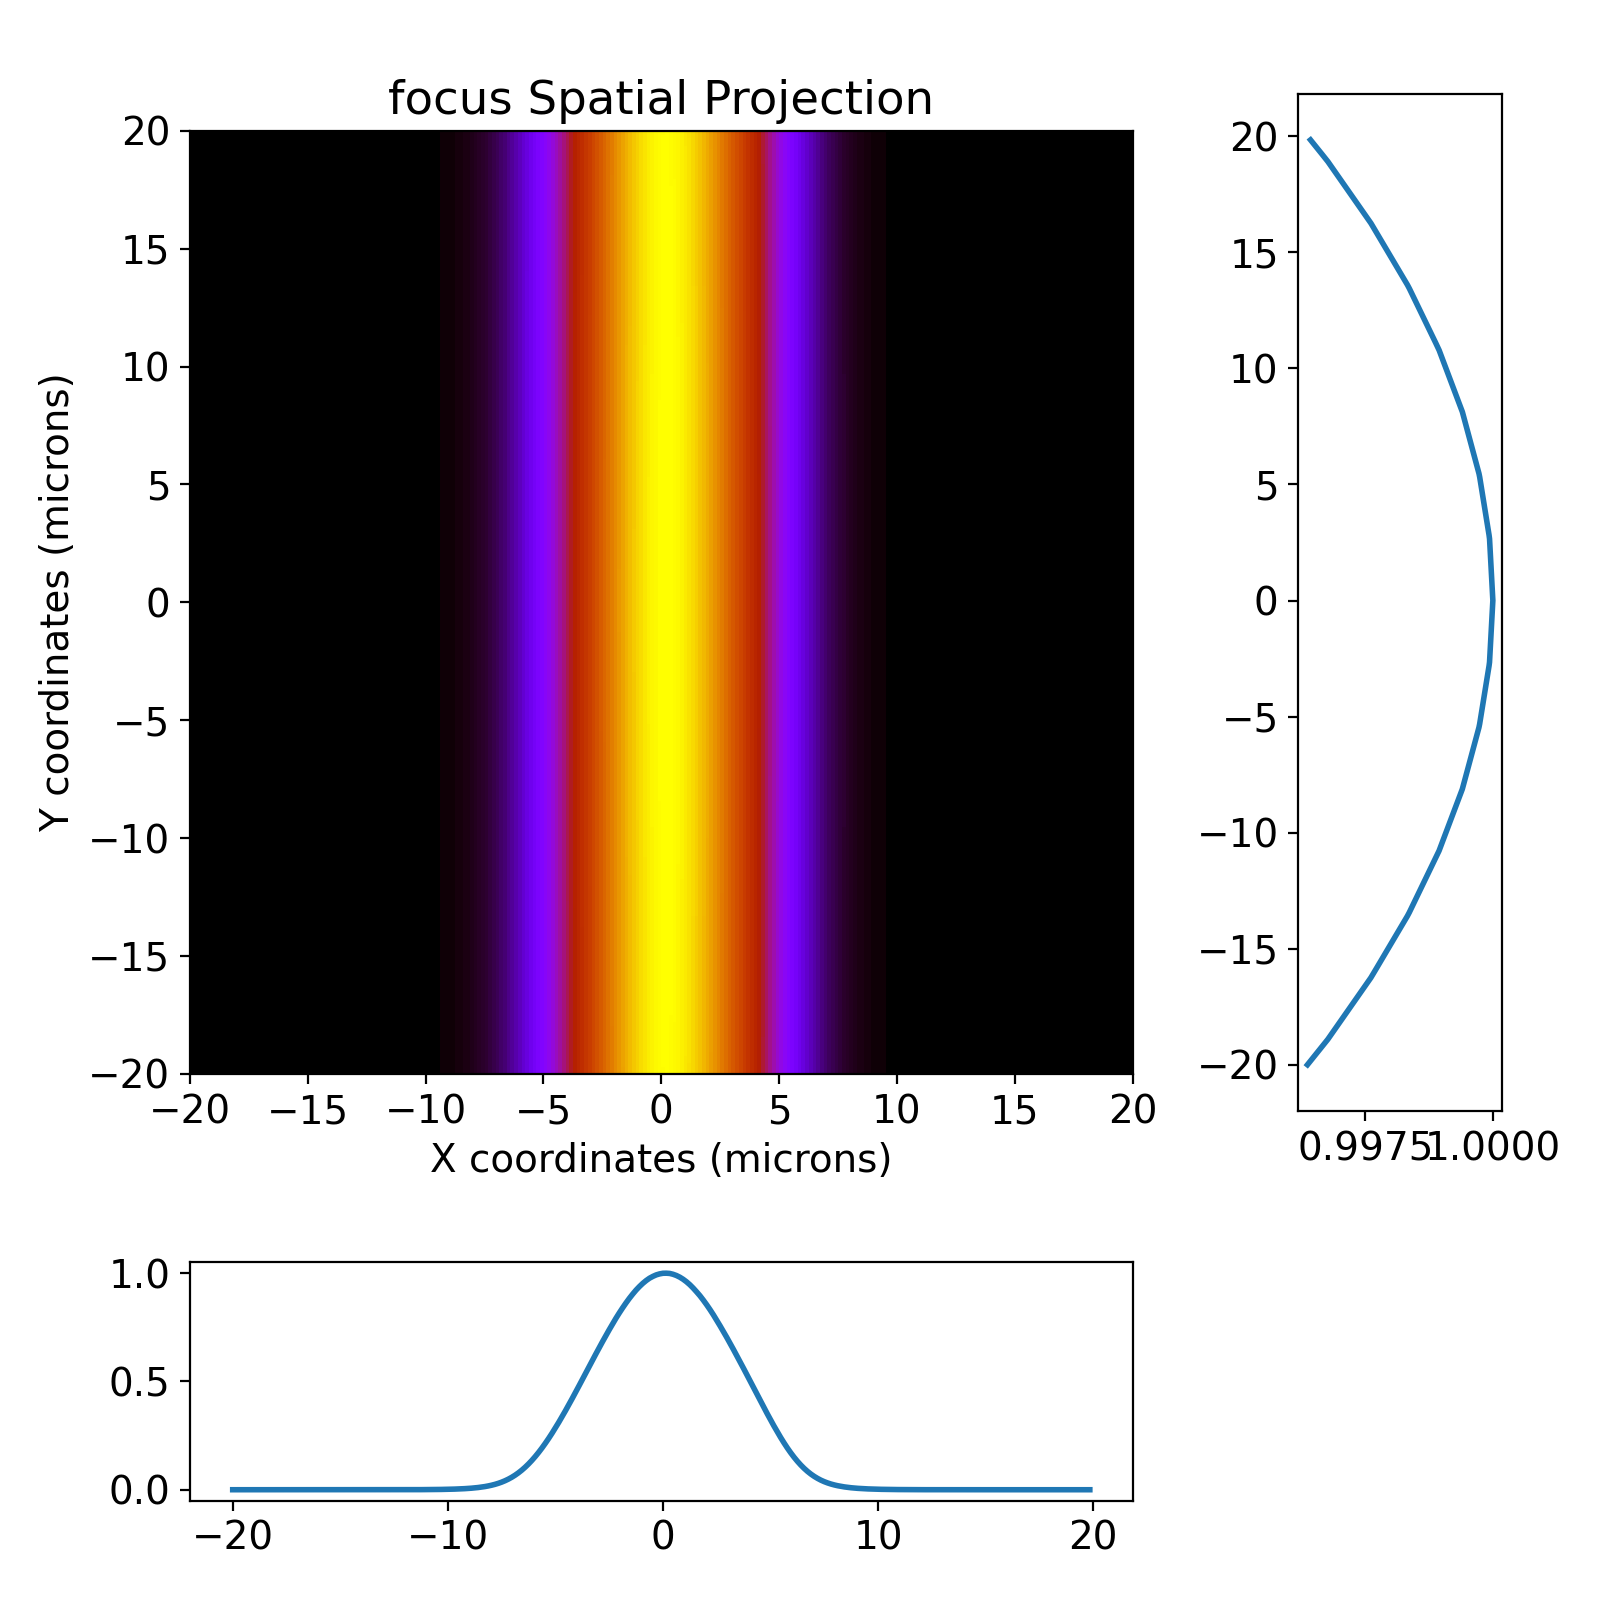

<IPython.core.display.Javascript object>


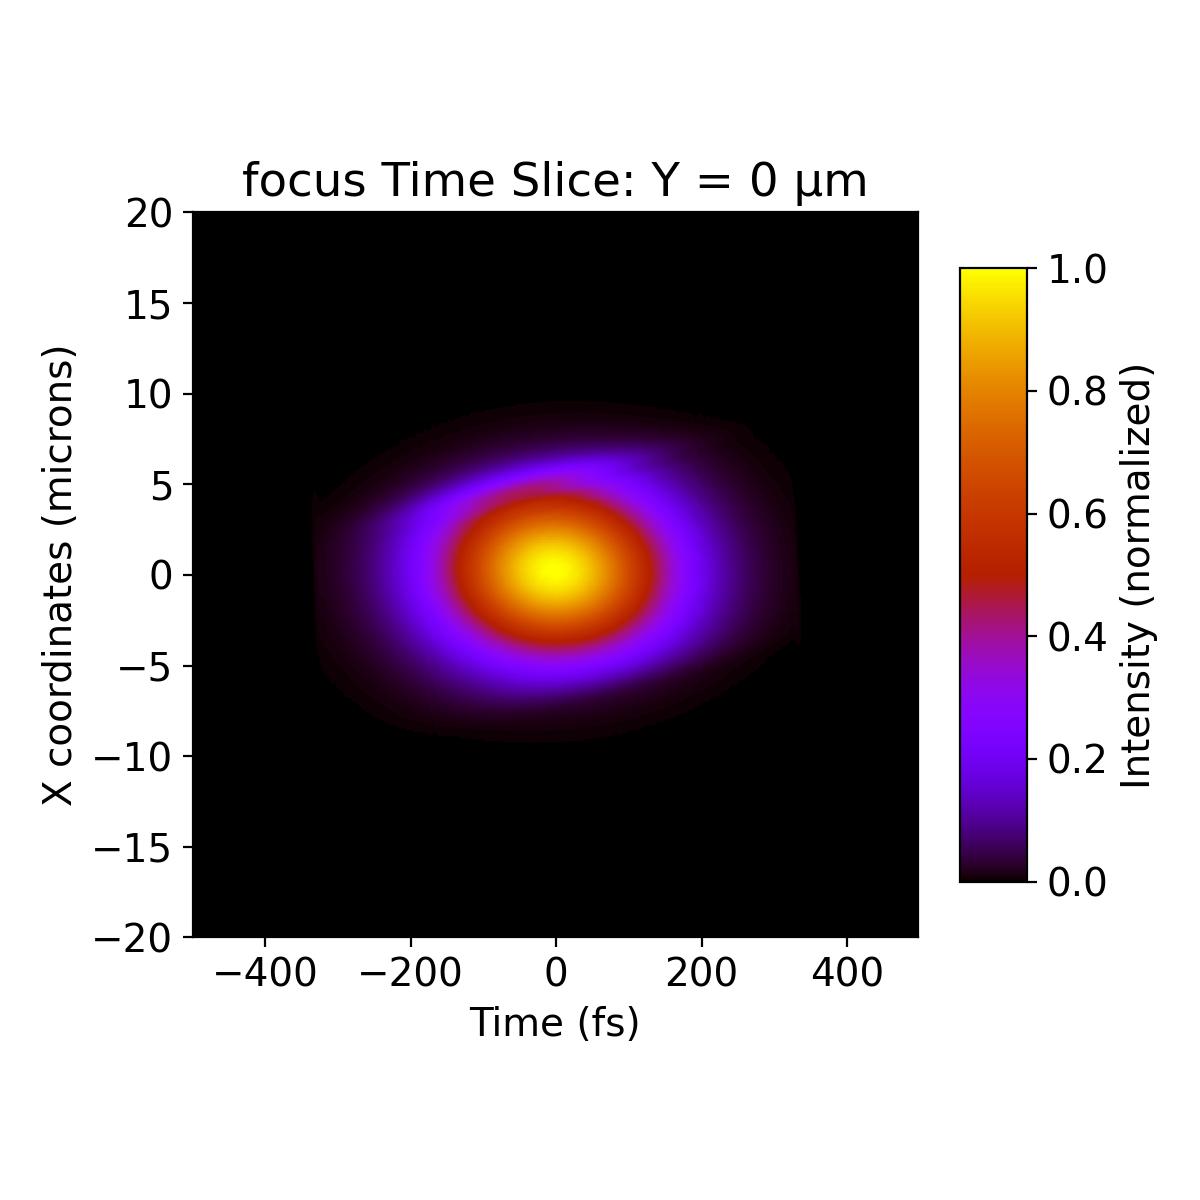

128


<IPython.core.display.Javascript object>


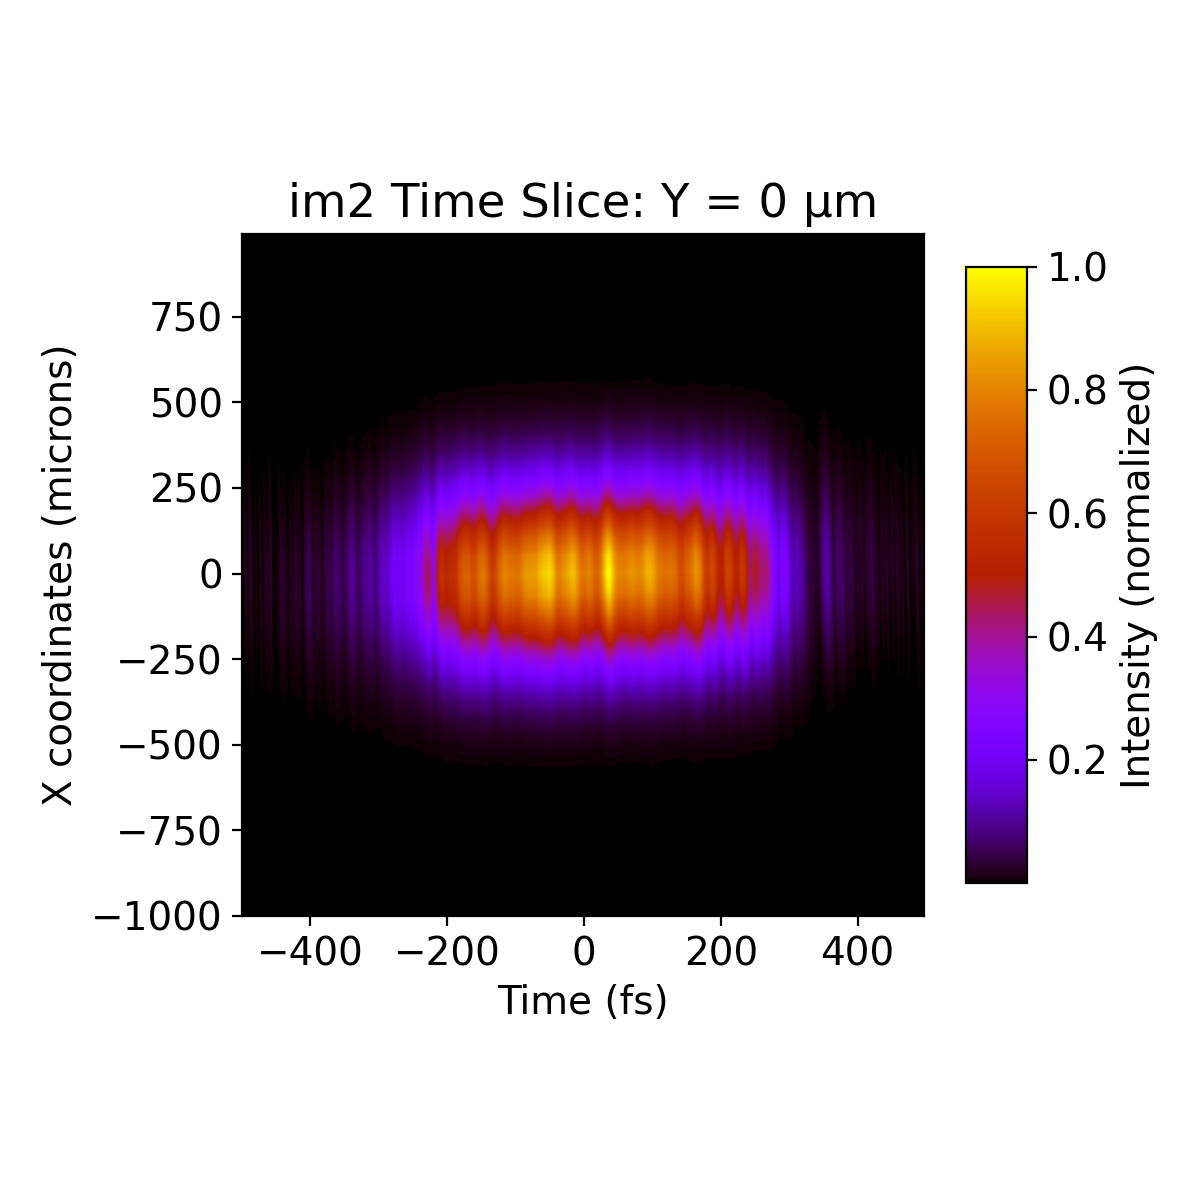

128


<IPython.core.display.Javascript object>


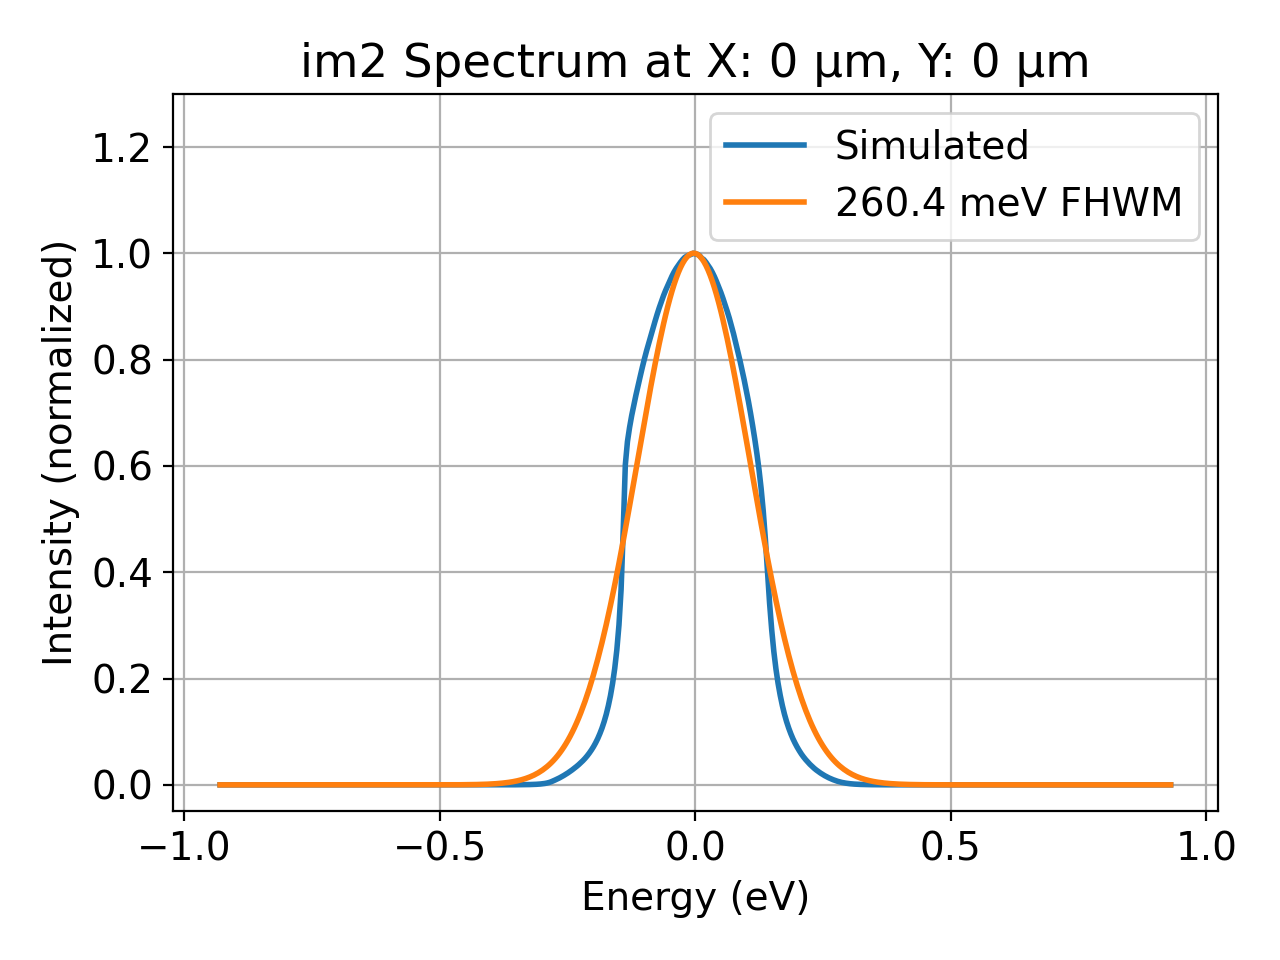

<IPython.core.display.Javascript object>


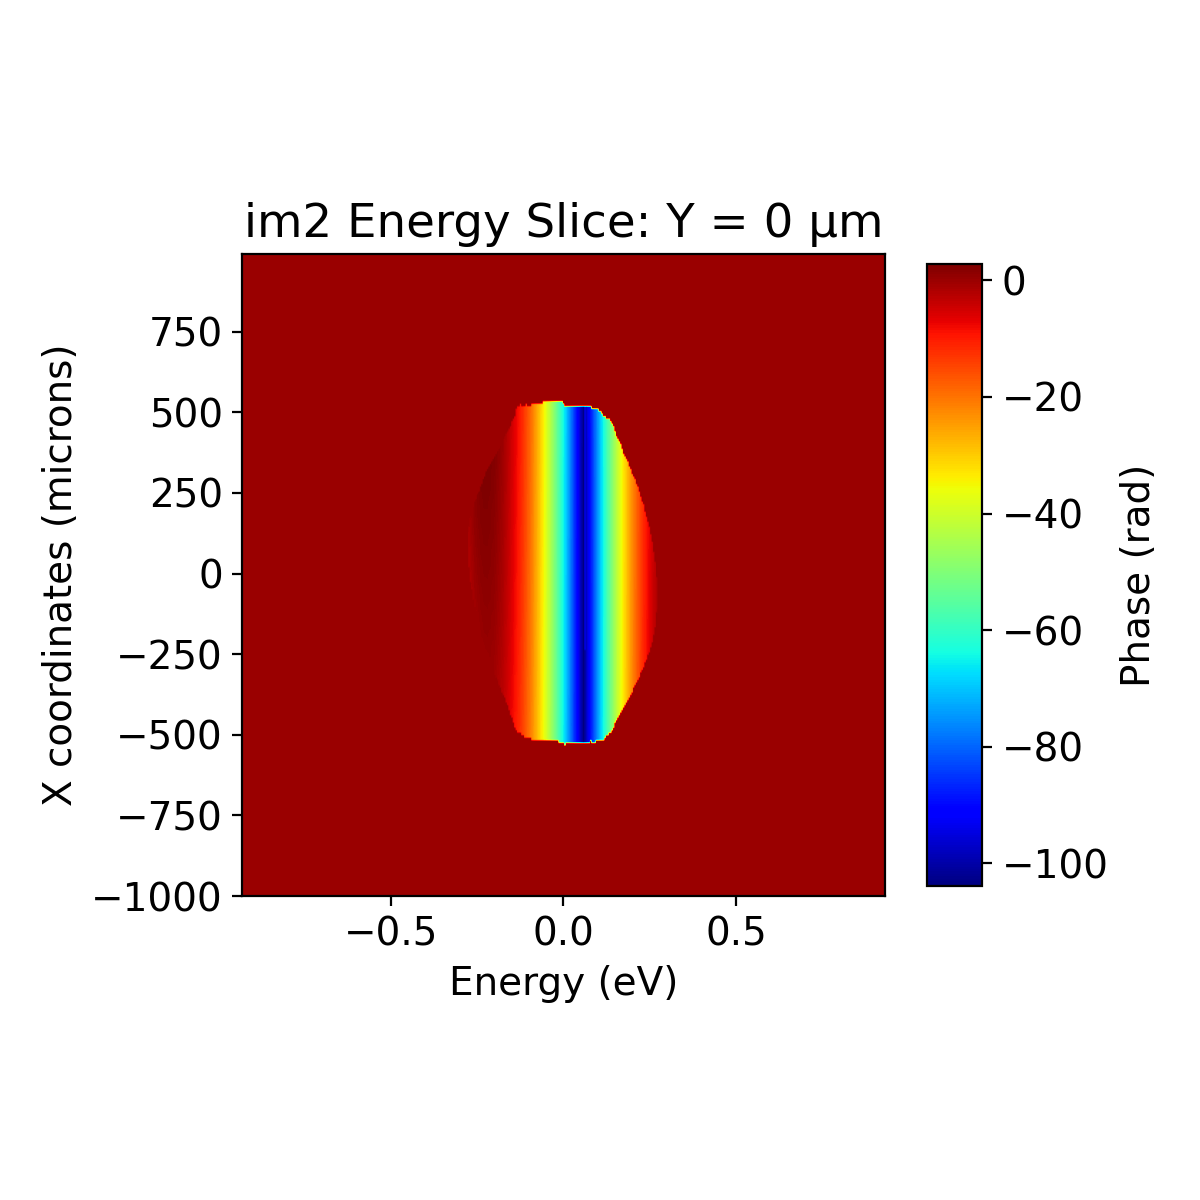

<IPython.core.display.Javascript object>


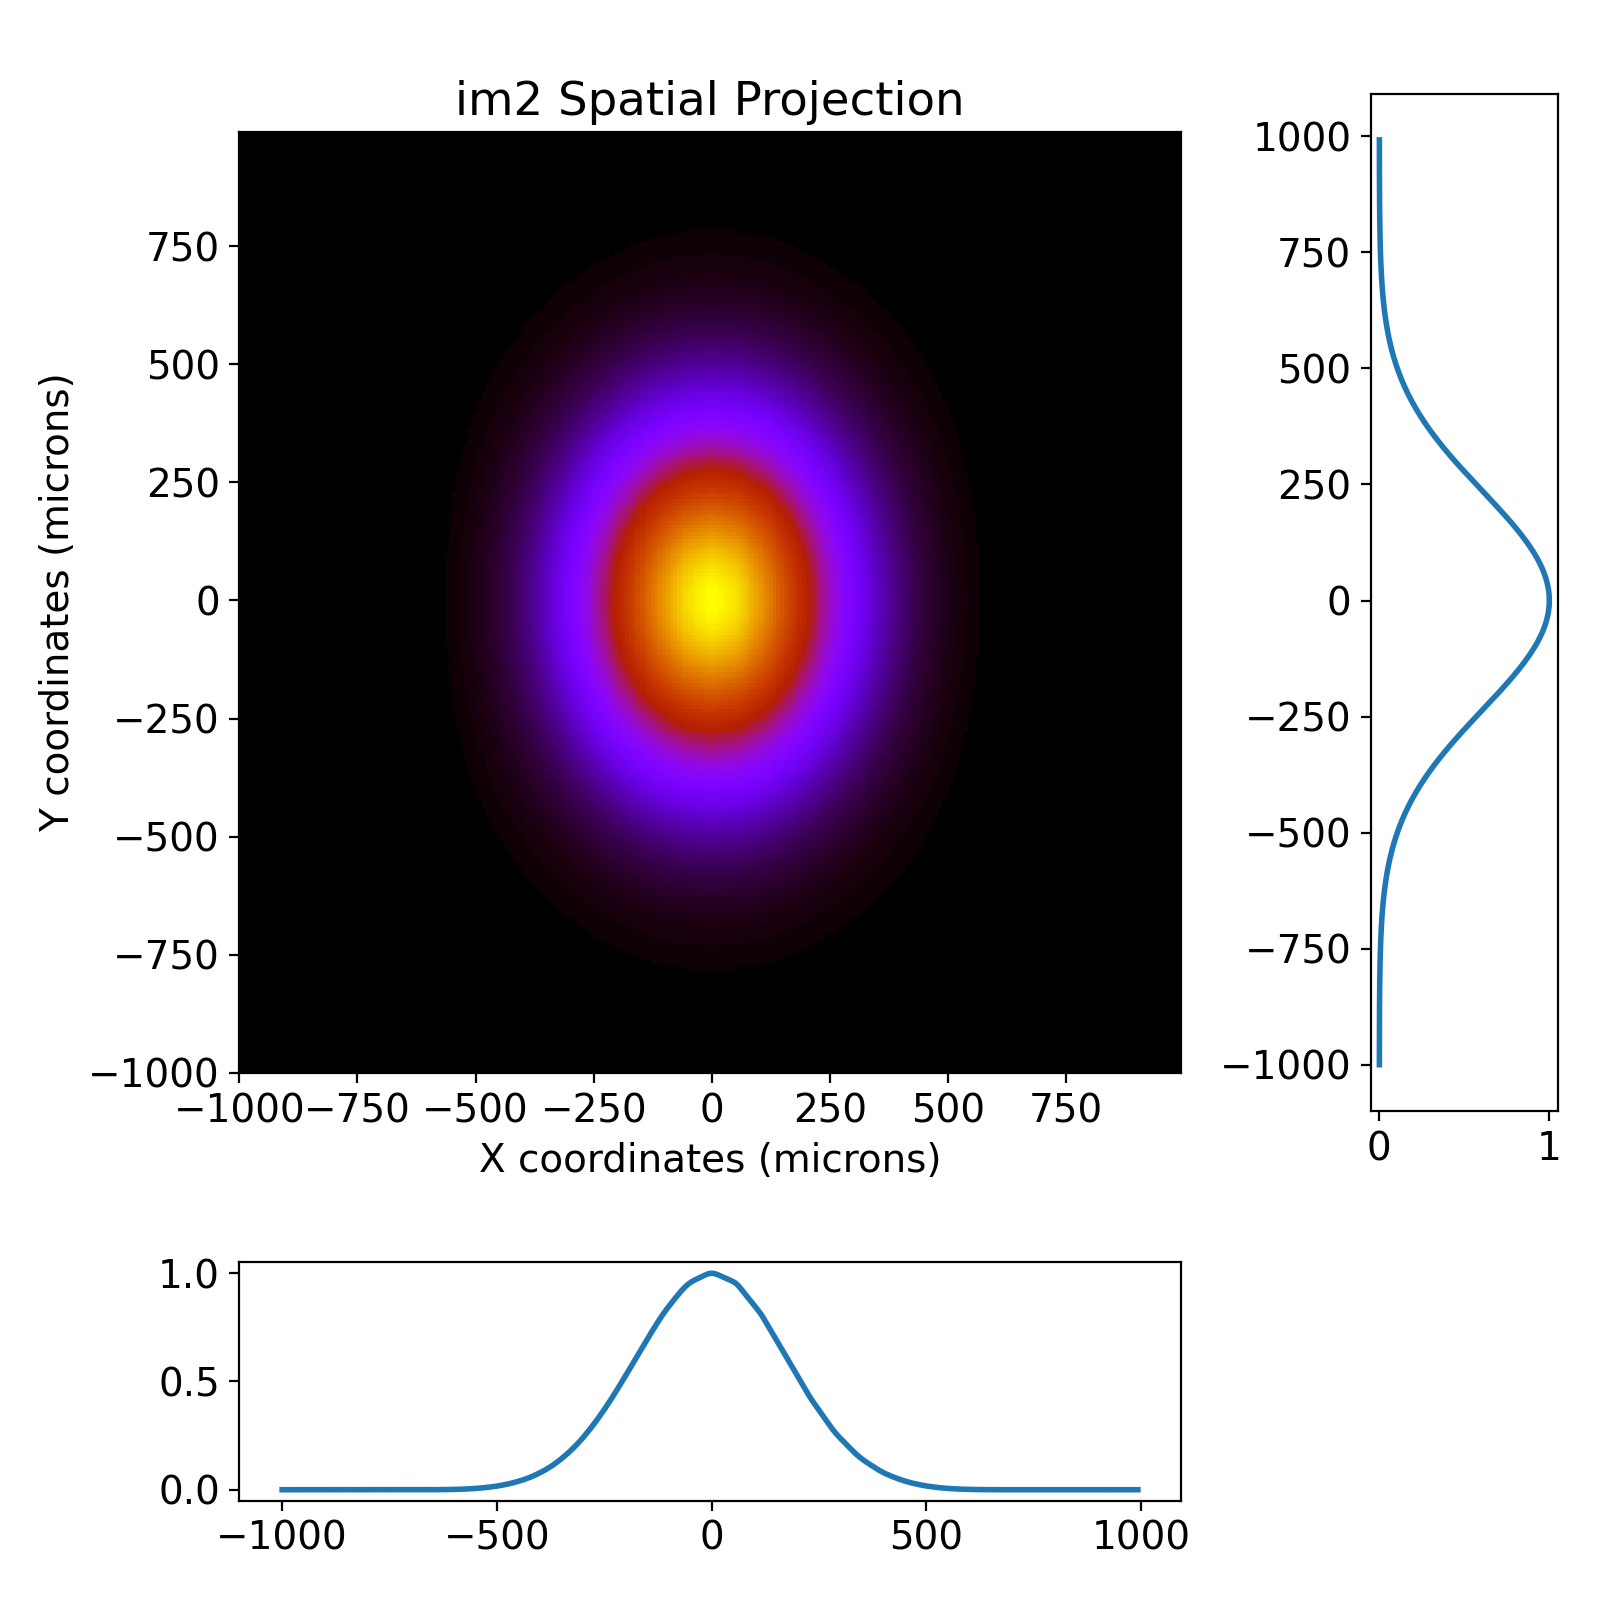

<IPython.core.display.Javascript object>


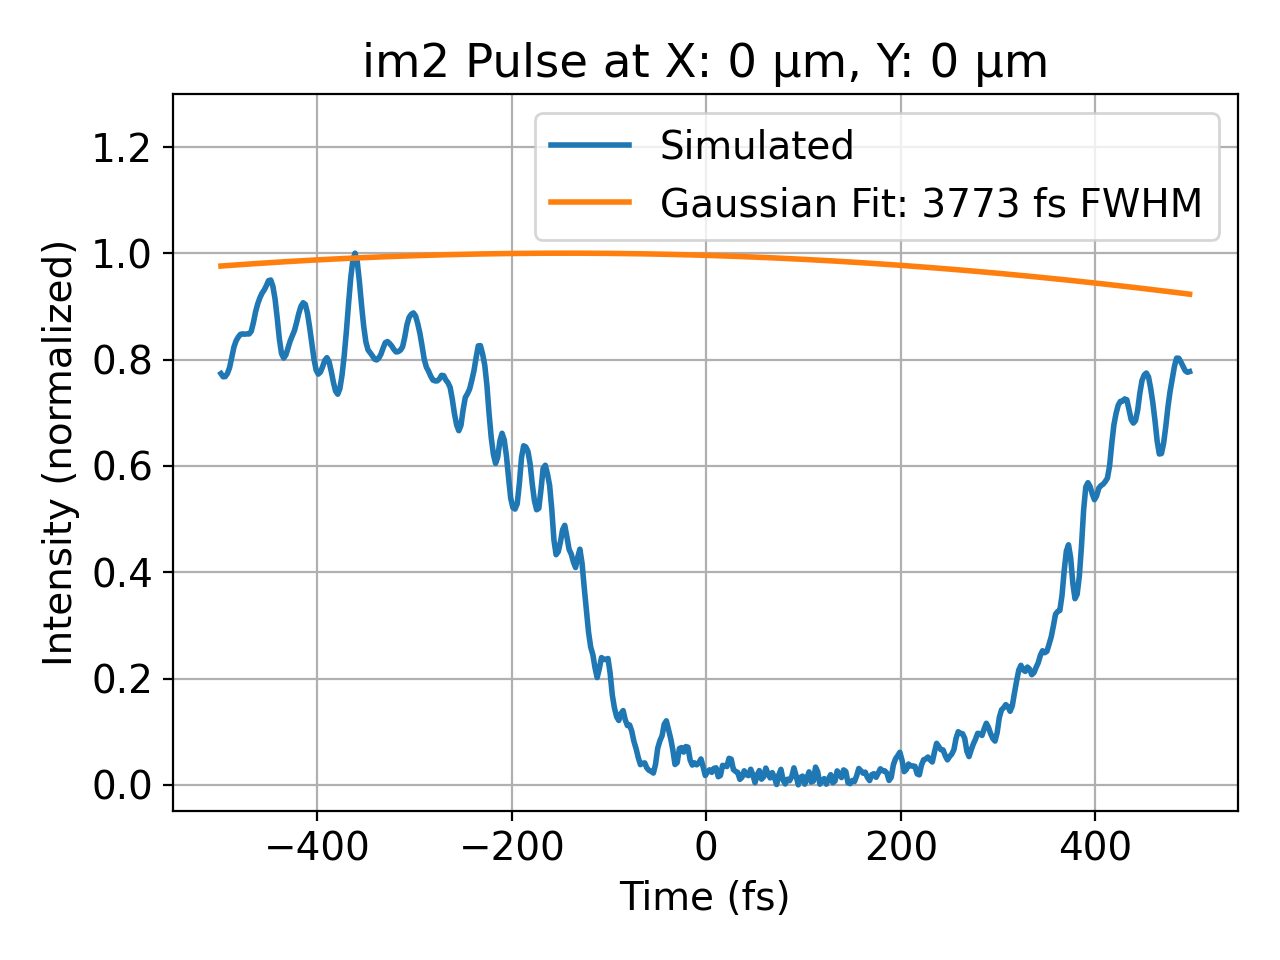

In [85]:
# pulse_test.plot_spectrum('im0')
# pulse_test.plot_spectrum('im1')
# pulse_test.imshow_energy_slice('im1')
pulse_test.imshow_projection('focus')
pulse_test.imshow_time_slice('focus')
pulse_test.imshow_time_slice('im2', shift=400)
pulse_test.plot_spectrum('im2')
pulse_test.imshow_energy_slice('im2',image_type='phase')
pulse_test.imshow_projection('im2')
pulse_test.plot_pulse('im2')

<IPython.core.display.Javascript object>


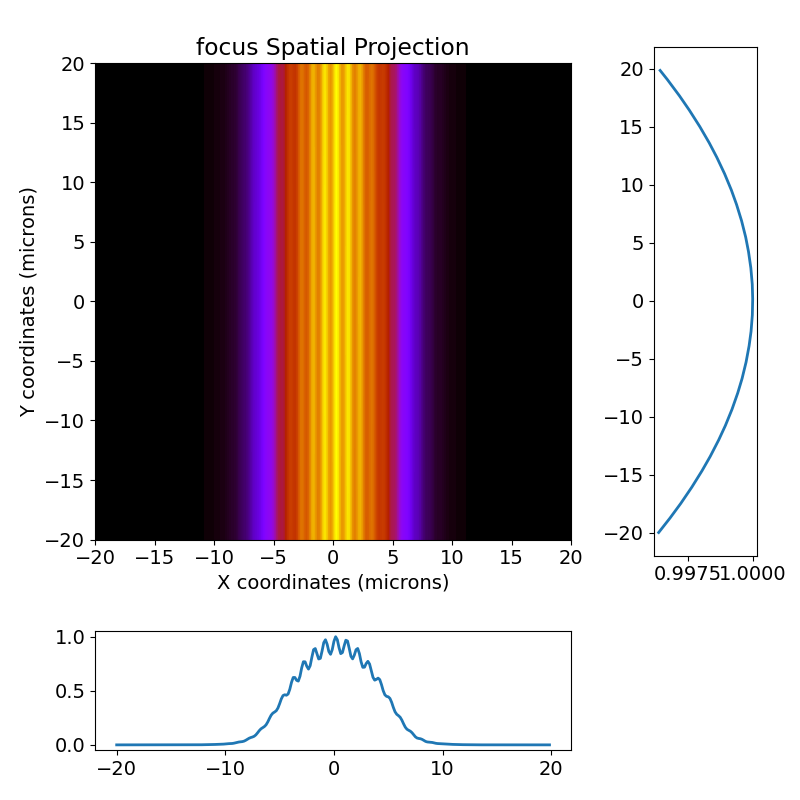

<IPython.core.display.Javascript object>


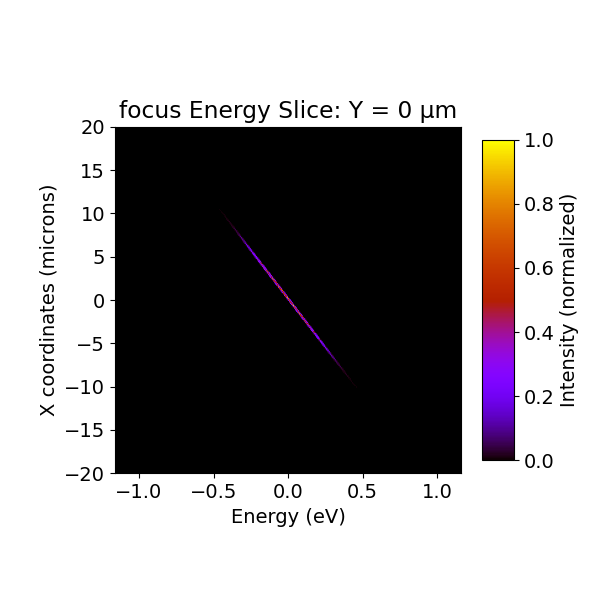

<IPython.core.display.Javascript object>


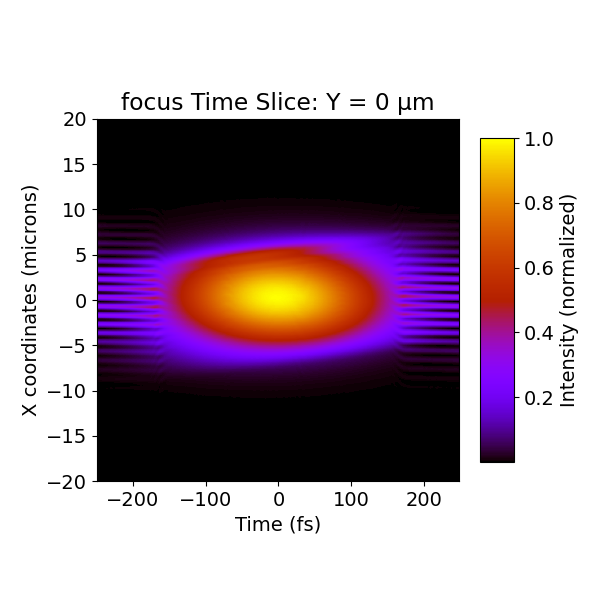

128


/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


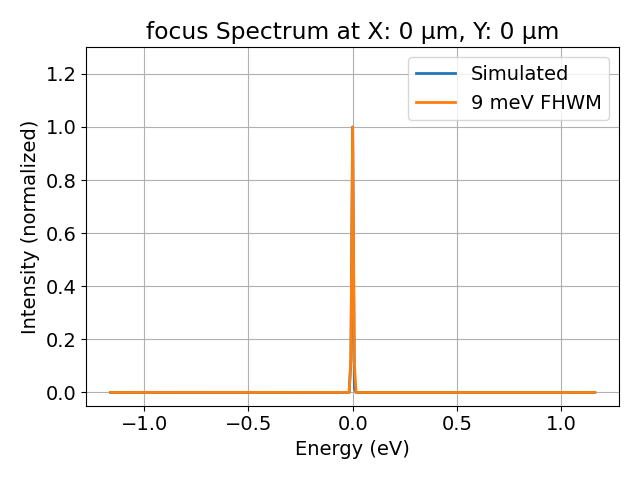

In [22]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Hasan_mono/figures'

pulse_test.imshow_projection('focus')
pulse_test.imshow_energy_slice('focus')
plt.savefig(figure_path+'/lens_focus.png')
pulse_test.imshow_time_slice('focus')
plt.tight_layout()
pulse_test.plot_spectrum('focus', x_pos=0)

In [10]:
84/(86*2)

0.4883720930232558